# import modules

In [1]:
%matplotlib inline

import numpy as np
from h5py import File as h5_file
import matplotlib.pyplot as plt
from matplotlib import ticker
from PIL import Image

from utilities import turbo_w, plot2d

In [2]:
import matplotlib.colors as col
import matplotlib.cm as cm
def gen_cmap(N, cmap = 'hsv'):
    color_norm = col.Normalize(vmin = 0, vmax = N-1)
    scalar_map = cm.ScalarMappable(norm = color_norm, cmap = cmap)
    def map_index_to_rgb(index):
        return scalar_map.to_rgba(index)
    return map_index_to_rgb

In [3]:
from matplotlib import rcParams

rcParams['font.size'] = 7
rcParams['lines.linewidth'] = 1
rcParams['lines.markersize'] = 3
rcParams['axes.labelsize'] = 7
rcParams['axes.labelpad'] = 1
rcParams['axes.linewidth']= 0.7
rcParams['ytick.minor.width']= 0.5
rcParams['figure.titlesize']= 9
rcParams['legend.fontsize']= 7
rcParams['legend.frameon']= False
rcParams['legend.handletextpad']= 0.2
rcParams['legend.markerscale']= 1.2
rcParams['xtick.labelsize']= 6
rcParams['ytick.labelsize']= 6
rcParams['xtick.major.size']= 3
rcParams['ytick.major.size']= 3
rcParams['xtick.major.pad']= 3
rcParams['ytick.major.pad']= 3
rcParams['xtick.major.width']= 0.7
rcParams['ytick.major.width']= 0.7
rcParams['xtick.minor.size']= 1.7
rcParams['ytick.minor.size']= 1.7
rcParams['xtick.minor.pad']= 2.8
rcParams['ytick.minor.pad']= 2.8
rcParams['xtick.minor.width']= 0.6
rcParams['ytick.minor.width']= 0.6

rcParams['xtick.direction']='in'
rcParams['ytick.direction']='in'
rcParams['xtick.top']=True
rcParams['ytick.right']=True

In [4]:
mm = 1/25.4  # centimeters in inches
dpi = 300

colors = ["white", "indigo"]
from matplotlib.colors import LinearSegmentedColormap
mycmap = LinearSegmentedColormap.from_list("mycmap", colors)

marker_m = 'o'
color_m = '#F96815' #'darkorange'

marker_e = 's'
color_e = '#028A0F' # darkgreen'

markersize = 1.5
elinewidth = 0.25
capsize = 0.5
capthick = 0.25

scale_RIXS = 4 # for calculated RIXS intensity
scale_magnon = 1.5 # for calculated magnon intensity

def normalize(y):
    return (y-np.min(y)) / (np.max(y)-np.min(y))

# Figure 1

In [5]:
Emap_data = h5_file('data/RIXS_data/Edep.hdf', 'r')
AIM_rixs_field_sim = h5_file('data/edrixs/AIM_rixs_field_sim.hdf', 'r')
rixs_analysis = h5_file('data/edrixs/rixs_analysis_field.hdf', 'r')

In [6]:
orbImgs = [0]*2
orbImgs[0] = Image.open(r'state0.png')
orbImgs[1] = Image.open(r'state14.png')

Text(0.03, 1.2, 'h')

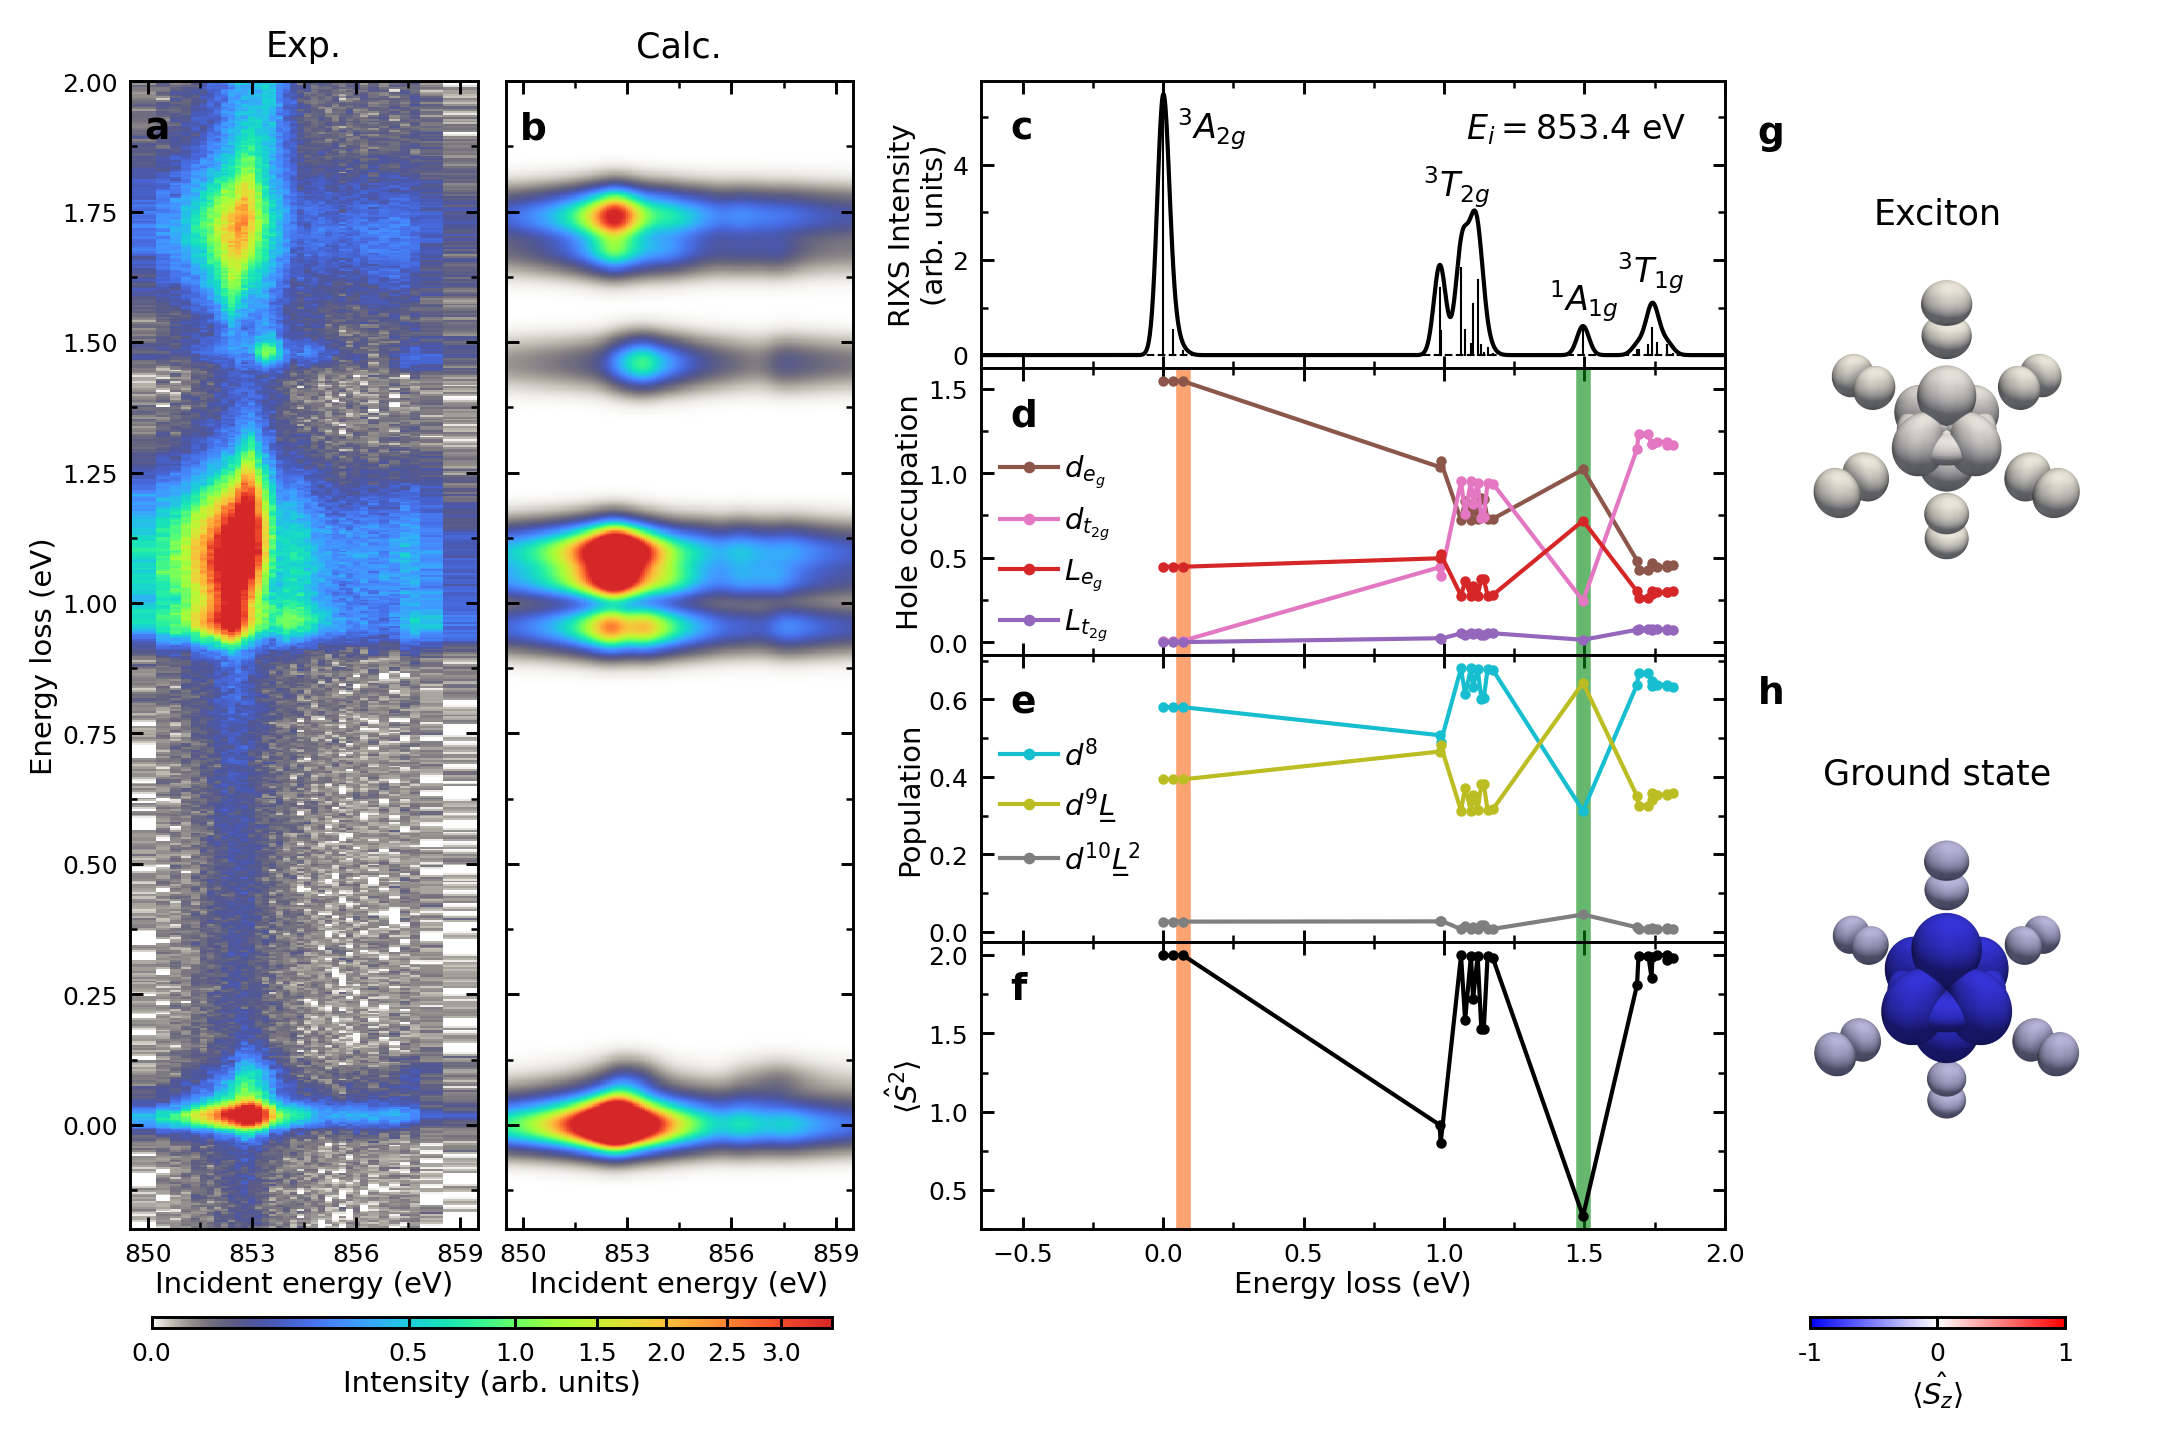

In [7]:
fig = plt.figure(dpi=dpi, figsize=(180*mm,120*mm))
gs1 = fig.add_gridspec(nrows=1, ncols=2, left=0.05, right=0.39, top=0.95, bottom=0.14, wspace=0.08, hspace=0)
gs2 = fig.add_gridspec(nrows=4, ncols=1, left=0.45, right=0.8, top=0.95, bottom=0.14, wspace=0, hspace=0)
gs3 = fig.add_gridspec(nrows=2, ncols=1, left=0.81, right=0.99, top=0.93, bottom=0.14, wspace=0, hspace=0)
axs = [fig.add_subplot(gs) for gs in gs1] + [fig.add_subplot(gs) for gs in gs2] + [fig.add_subplot(gs) for gs in gs3]
cax0 = fig.add_axes([0.05+0.01, 0.07, 0.39-0.01-0.06, 0.008]) # axis for colorbar
cax1 = fig.add_axes([0.81+0.03, 0.07, 0.99-0.81-0.06, 0.008]) # axis for colorbar
colormap=turbo_w()

ims = [0,0,0,0]
ims[0] = plot2d(ax=axs[0], x=Emap_data['Ei'][:], y=Emap_data['eloss'][:], Int=Emap_data['intensity'][:], colormap=colormap, rasterized=True)
ims[1] = plot2d(ax=axs[1], x=AIM_rixs_field_sim['omega'][:], y=AIM_rixs_field_sim['eloss'][:], Int=AIM_rixs_field_sim['LH'][:]*scale_RIXS, colormap=colormap, rasterized=True)

alpha = 0.6
lw = 3.5
axs[3].axvline(x=0.07, linestyle='-', color=color_m, lw=lw, alpha=alpha)
axs[3].axvline(x=1.495, linestyle='-', color=color_e, lw=lw, alpha=alpha)
axs[4].axvline(x=0.07, linestyle='-', color=color_m, lw=lw, alpha=alpha)
axs[4].axvline(x=1.495, linestyle='-', color=color_e, lw=lw, alpha=alpha)
axs[5].axvline(x=0.07, linestyle='-', color=color_m, lw=lw, alpha=alpha)
axs[5].axvline(x=1.495, linestyle='-', color=color_e, lw=lw, alpha=alpha)

axs[2].plot(rixs_analysis['eloss'][:], rixs_analysis['rixs_pol'][:], color='k',)
for E, h, in zip(rixs_analysis['rixs_poles'][:], rixs_analysis['rixs_sticks'][:]):
    axs[2].plot([E, E], [0, h], '-', color='k', lw=0.5)
axs[2].axhline(y=0, ls='--', color='k',lw=0.5)
axs[2].set_ylabel('RIXS Intensity\n(arb. units)')
x = 0.8
y = 0.8
axs[2].text(x=x, y=y, s=r'$E_i = 853.4$ eV', fontsize=8, transform=axs[2].transAxes, ha='center', color='k')

axs[2].text(x=0.31, y=0.8, s=r'$^3A_{2g}$', fontsize=8, transform=axs[2].transAxes, ha='center', color='k')
axs[2].text(x=0.64, y=0.6, s=r'$^3T_{2g}$', fontsize=8, transform=axs[2].transAxes, ha='center', color='k')
axs[2].text(x=0.81, y=0.2, s=r'$^1A_{1g}$', fontsize=8, transform=axs[2].transAxes, ha='center', color='k')
axs[2].text(x=0.9, y=0.3, s=r'$^3T_{1g}$', fontsize=8, transform=axs[2].transAxes, ha='center', color='k')

end = 24
axs[3].plot(rixs_analysis['rixs_poles'][:end], rixs_analysis['d_eg'][:end], '.-', label=r'$d_{e_g}$', color='C5')
axs[3].plot(rixs_analysis['rixs_poles'][:end], rixs_analysis['d_t2g'][:end], '.-', label=r'$d_{t_{2g}}$', color='C6')
axs[3].plot(rixs_analysis['rixs_poles'][:end], rixs_analysis['L_eg'][:end], '.-', label=r'$L_{e_g}$', color='C3')
axs[3].plot(rixs_analysis['rixs_poles'][:end], rixs_analysis['L_t2g'][:end], '.-', label=r'$L_{t_{2g}}$', color='C4')
axs[3].set_ylabel('Hole occupation')


axs[4].plot(rixs_analysis['rixs_poles'][:end], rixs_analysis['alphas_rixs'][:end], '.-', label='$d^8$', color='C9')
axs[4].plot(rixs_analysis['rixs_poles'][:end], rixs_analysis['betas_rixs'][:end], '.-', label='$d^9L\u0332$', color='C8')
axs[4].plot(rixs_analysis['rixs_poles'][:end], rixs_analysis['gammas_rixs'][:end], '.-', label='$d^{10}L\u0332^2$', color='C7')
axs[4].set_ylabel('Population')


axs[5].plot(rixs_analysis['rixs_poles'][:end], rixs_analysis['S2_val'][:end], '.-', color='k')
axs[5].set_xlabel('Energy loss (eV)')
axs[5].set_ylabel(r'$\langle \hat{S}^2 \rangle$')

ims[2] = axs[6].imshow(orbImgs[1],cmap=plt.get_cmap('bwr'), aspect='equal')
ims[3] = axs[7].imshow(orbImgs[0],cmap=plt.get_cmap('bwr'), aspect='equal')

# axis range
for ax in axs[0:2]:
    ax.set_xlim(849.5,859.5)
    ax.set_ylim(-0.2,2)
    ax.set_xticks(np.arange(850,860.1,3))
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(2))
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))
axs[1].set_yticklabels([])
for ax in axs[2:6]:
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(2))
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))
    ax.set_xlim(-0.65, 2)
for ax in axs[2:5]:
    ax.set_xticklabels([])
axs[3].legend(loc=(0.01,0.0))
axs[4].legend(loc=(0.01,0.18))

for ax in axs[6:8]:
    ax.set_xlim(2500,7500)
    ax.set_ylim(5600,1000)
    ax.axis('off')
    

    
# axis label
axs[0].set_ylabel('Energy loss (eV)')
axs[0].set_xlabel('Incident energy (eV)')
axs[1].set_xlabel('Incident energy (eV)')


# title
axs[0].set_title(r'Exp.',)
axs[1].set_title(r'Calc.',)
axs[6].set_title(r'Exciton', y=0.9)
axs[7].set_title(r'Ground state', y=0.9)


# colorbar
for im in ims[0:2]:
    im.set_norm(col.PowerNorm(gamma=0.5))
    im.set_clim(0, 3.5)
cbar0 = plt.colorbar(ims[1], cax=cax0, orientation='horizontal')
cbar0.set_ticks(np.arange(0, 3.1, 0.5))
cbar0.set_label('Intensity (arb. units)')

for im in ims[2:4]:
    im.set_clim(0, 1)
cbar1 = plt.colorbar(ims[2], cax=cax1, orientation='horizontal')
cbar1.set_ticks([0, 0.5, 1])
cbar1.set_ticklabels(['-1', '0', '1'])
cbar1.set_label(r'$\langle \hat{S_z}\rangle$')



# label
x = 0.04
y = 0.95
axs[0].text(x=x, y=y, s='a', fontdict=dict(fontsize=9,fontweight='bold'), transform=axs[0].transAxes, color='k')
axs[1].text(x=x, y=y, s='b', fontdict=dict(fontsize=9,fontweight='bold'), transform=axs[1].transAxes, color='k')
x = 0.04
y = 0.8
axs[2].text(x=x, y=y, s='c', fontdict=dict(fontsize=9,fontweight='bold'), transform=axs[2].transAxes, color='k')
axs[3].text(x=x, y=y, s='d', fontdict=dict(fontsize=9,fontweight='bold'), transform=axs[3].transAxes, color='k')
axs[4].text(x=x, y=y, s='e', fontdict=dict(fontsize=9,fontweight='bold'), transform=axs[4].transAxes, color='k')
axs[5].text(x=x, y=y, s='f', fontdict=dict(fontsize=9,fontweight='bold'), transform=axs[5].transAxes, color='k')
x = 0.03
y = 1.2
axs[6].text(x=x, y=y, s='g', fontdict=dict(fontsize=9,fontweight='bold'), transform=axs[6].transAxes, color='k')
axs[7].text(x=x, y=y, s='h', fontdict=dict(fontsize=9,fontweight='bold'), transform=axs[7].transAxes, color='k')


# fig.savefig('energy_map.pdf', dpi=dpi)

# Figure 2

In [8]:
map_H0L_data = h5_file('data/RIXS_data/H0L_T40K.hdf', 'r')
map_0KL_data = h5_file('data/RIXS_data/0KL_T40K.hdf', 'r')
magnon_calculated_data = h5_file('data/SWT/magnon_calculated.hdf', 'r')

Text(0.06, 0.85, 'f')

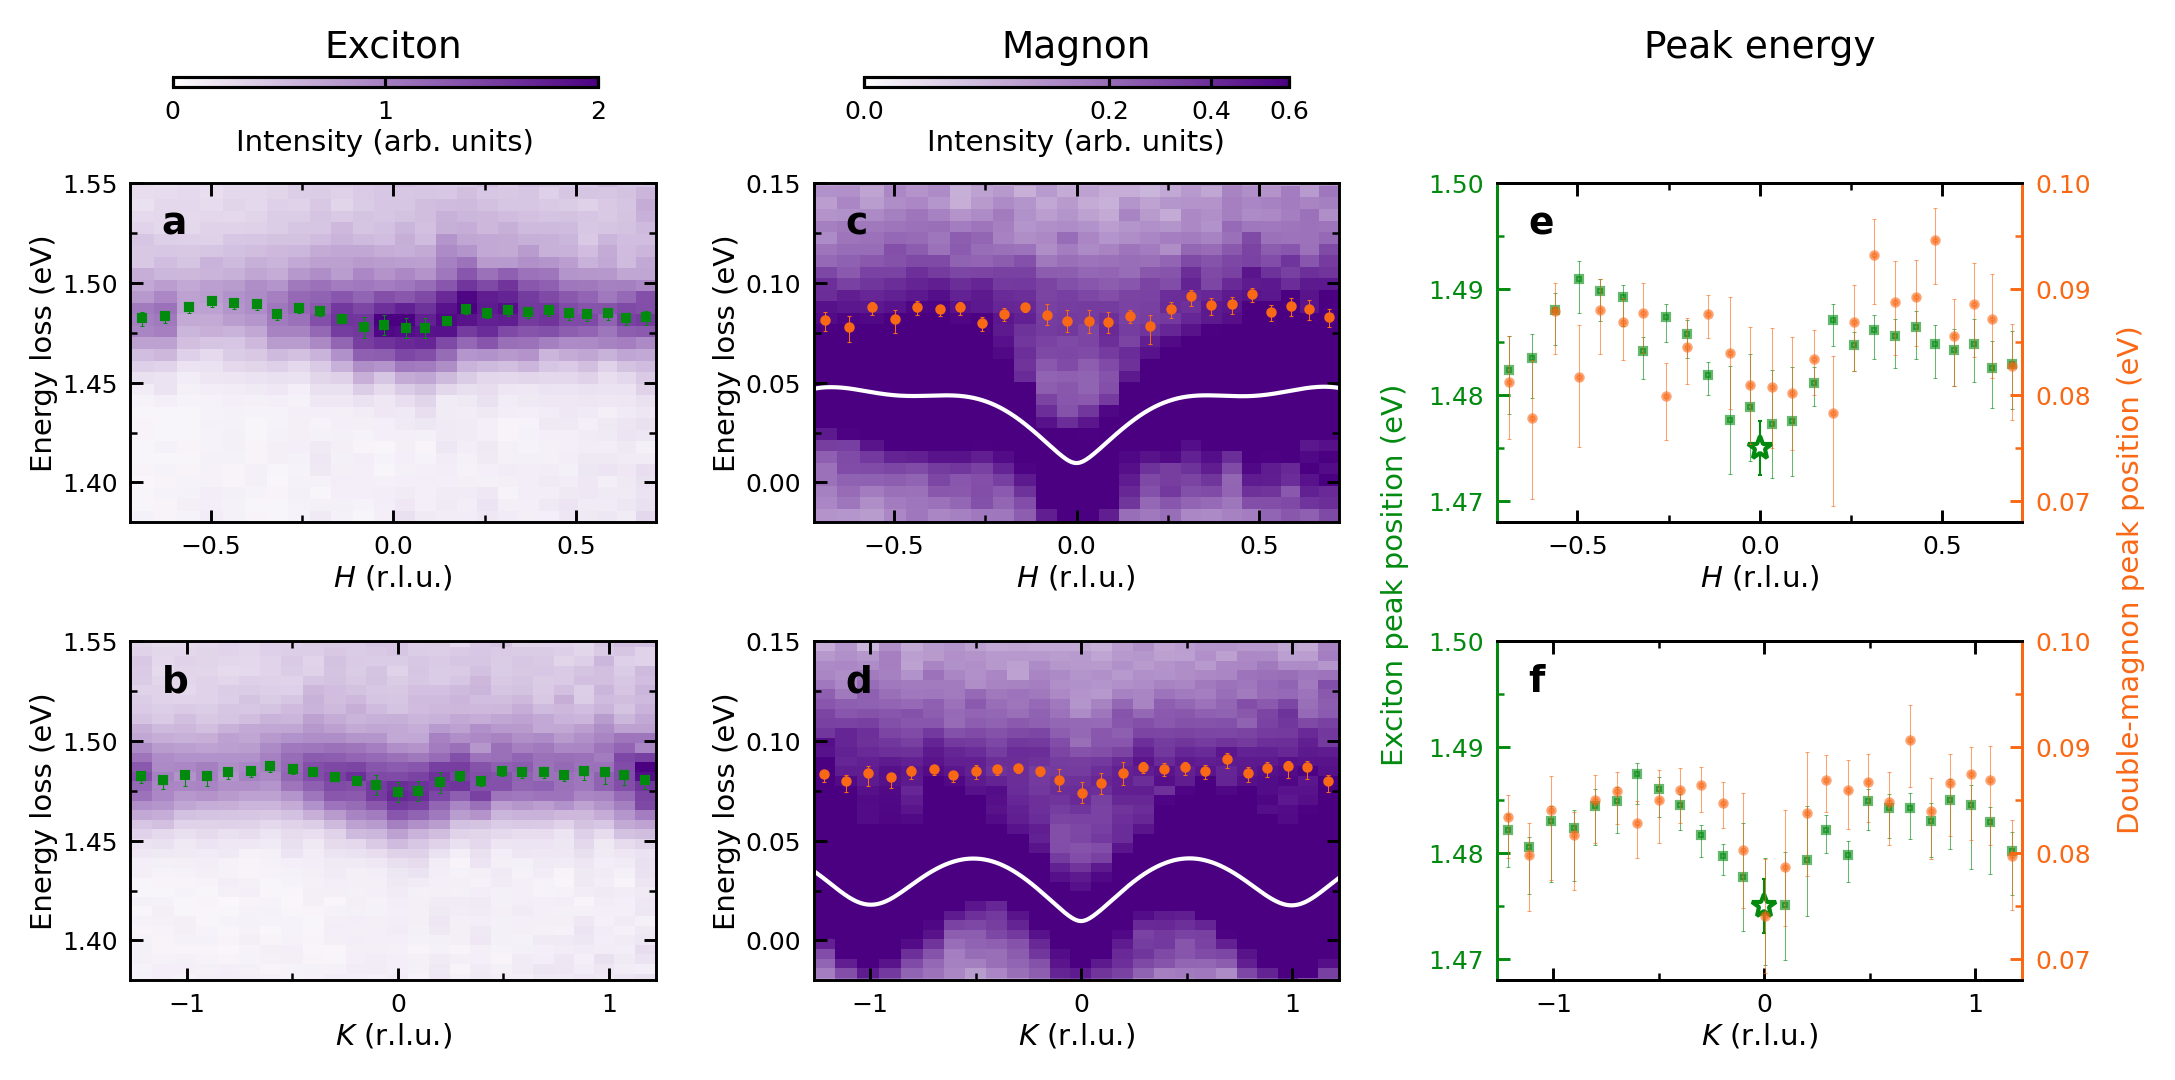

In [9]:
alpha = 0.6
colormap = mycmap

fig, axs = plt.subplots(2, 3, dpi=dpi, figsize=(180*mm,90*mm), 
                        gridspec_kw=dict(wspace=0.3, hspace=0.35,top=0.84, left=0.05, right=0.94, bottom=0.09,
                                         width_ratios=[1, 1, 1], height_ratios=[1, 1])
                       )


cax0 = fig.add_axes([0.07,0.93,0.2,0.01]) # axis for colorbar
cax1 = fig.add_axes([0.395,0.93,0.2,0.01]) # axis for colorbar

ims = [0,0,0,0]
ims[0] = plot2d(ax=axs[0,0], x=map_H0L_data['H'], y=map_H0L_data['eloss'], Int=map_H0L_data['intensity'], colormap=colormap, rasterized=True)
ims[1] = plot2d(ax=axs[0,1], x=map_H0L_data['H'], y=map_H0L_data['eloss'], Int=map_H0L_data['intensity'], colormap=colormap, rasterized=True)
ims[2] = plot2d(ax=axs[1,0], x=map_0KL_data['K'], y=map_0KL_data['eloss'], Int=map_0KL_data['intensity'], colormap=colormap, rasterized=True)
ims[3] = plot2d(ax=axs[1,1], x=map_0KL_data['K'], y=map_0KL_data['eloss'], Int=map_0KL_data['intensity'], colormap=colormap, rasterized=True)


x,y,y_low,y_high = np.loadtxt('data/RIXS_fits/H0L_40K_exciton_center.txt', delimiter='\t', comments='# ', unpack='True')
axs[0,0].errorbar(x, y, yerr=(y_low, y_high), marker=marker_e, color=color_e, ls='',markersize=markersize,
                  elinewidth=elinewidth,capsize=capsize,capthick=capthick)
axs[0,2].errorbar(x, y, yerr=(y_low, y_high), marker=marker_e, color=color_e, ls='',markersize=markersize,
                  elinewidth=elinewidth,capsize=capsize,capthick=capthick,alpha=alpha)

x,y,y_low,y_high = np.loadtxt('data/RIXS_fits/H0L_40K_2magnon_center.txt', delimiter='\t', comments='# ', unpack='True')
axs[0,1].errorbar(x, y, yerr=(y_low, y_high), marker=marker_m, color=color_m, ls='',markersize=markersize,
                  elinewidth=elinewidth,capsize=capsize,capthick=capthick)
ax0 = axs[0,2].twinx()
ax0.errorbar(x, y, yerr=(y_low, y_high), marker=marker_m, color=color_m, ls='',markersize=markersize,
             elinewidth=elinewidth,capsize=capsize,capthick=capthick,alpha=alpha)

x = magnon_calculated_data['H'][:]
y = magnon_calculated_data['H_center'][:]/1e3
axs[0,1].plot(x, y, color='w', ls='-',)


x,y,y_low,y_high = np.loadtxt('data/RIXS_fits/0KL_40K_exciton_center.txt', delimiter='\t', comments='# ', unpack='True')
axs[1,0].errorbar(x, y, yerr=(y_low, y_high), marker=marker_e, color=color_e, ls='',markersize=markersize,
                  elinewidth=elinewidth,capsize=capsize,capthick=capthick)
axs[1,2].errorbar(x, y, yerr=(y_low, y_high), marker=marker_e, color=color_e, ls='',markersize=markersize,
                  elinewidth=elinewidth,capsize=capsize,capthick=capthick,alpha=alpha)


x,y,y_low,y_high = np.loadtxt('data/RIXS_fits/0KL_40K_2magnon_center.txt', delimiter='\t', comments='# ', unpack='True')
axs[1,1].errorbar(x, y, yerr=(y_low, y_high), marker=marker_m, color=color_m, ls='',markersize=markersize,
                  elinewidth=elinewidth,capsize=capsize,capthick=capthick)
ax1 = axs[1,2].twinx()
ax1.errorbar(x, y, yerr=(y_low, y_high), marker=marker_m, color=color_m, ls='',markersize=markersize,
             elinewidth=elinewidth,capsize=capsize,capthick=capthick,alpha=alpha)

x = magnon_calculated_data['K'][:]
y = magnon_calculated_data['K_center'][:]/1e3
axs[1,1].plot(x, y, color='w', ls='-',)

for ax in axs[:,2]:
    ax.errorbar(x=0, y=1.475, yerr=([2.53/1e3], [2.53/1e3]),fmt='*', label='Exciton',color=color_e,markerfacecolor='white',
                markersize=markersize*4,elinewidth=elinewidth*2,capsize=capsize,capthick=capthick*2
               )


# axis range
xlim = axs[0,0].get_xlim()
for ax in axs[0,:]:
    ax.set_xlim(xlim)
xlim = axs[1,0].get_xlim()
for ax in axs[1,:]:
    ax.set_xlim(xlim)

axs[0,0].set_ylim(1.38,1.55)
axs[0,1].set_ylim(-0.02,0.15)
axs[0,2].set_ylim(1.468,1.500)
ax0.set_ylim(0.068,0.100)
axs[1,0].set_ylim(1.38,1.55)
axs[1,1].set_ylim(-0.02,0.15)
axs[1,2].set_ylim(1.468,1.500)
ax1.set_ylim(0.068,0.100)

ims[0].set_clim(0, 2)
ims[1].set_norm(col.PowerNorm(gamma=0.5))
ims[1].set_clim(0, 0.6)
ims[2].set_clim(0, 2)
ims[3].set_norm(col.PowerNorm(gamma=0.5))
ims[3].set_clim(0, 0.6)



# title
x = 0.5
y = 1.37
axs[0,0].text(x=x, y=y, s='Exciton', fontsize=rcParams['figure.titlesize'], transform=axs[0,0].transAxes, ha='center', color='k')
axs[0,1].text(x=x, y=y, s='Magnon', fontsize=rcParams['figure.titlesize'], transform=axs[0,1].transAxes, ha='center', color='k')
axs[0,1].text(x=x, y=y, s='Peak energy', fontsize=rcParams['figure.titlesize'], transform=axs[0,2].transAxes, ha='center', color='k')

# axis label
for ax in axs[0,:]:
    ax.set_xticks((-0.5, 0, 0.5))
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(2))
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))
    ax.set_xlabel(r'$H$ (r.l.u.)')
ax0.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))

for ax in axs[1,:]:
    ax.set_xticks((-1, 0, 1))
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(2))
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))
    ax.set_xlabel(r'$K$ (r.l.u.)')
ax1.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))

for i in range(2):
    for j in range(2):
        axs[i,j].set_ylabel('Energy loss (eV)')
axs[0,2].text(x=-0.22, y=-0.7, s='Exciton peak position (eV)', fontsize=rcParams['axes.labelsize'], transform=axs[0,2].transAxes, color=color_e, rotation='vertical')
axs[0,2].text(x=1.18, y=-0.9, s='Double-magnon peak position (eV)', fontsize=rcParams['axes.labelsize'], transform=axs[0,2].transAxes, color=color_m, rotation='vertical')

# axis color
for ax, color in zip([axs[0,2], ax0], [color_e, color_m]):
    for t in ax.get_yticklabels():
        t.set_color(color)
        ax.tick_params(axis='y', which='both', colors=color)
        ax.spines['left'].set_color(color_e)
        ax.spines['right'].set_color(color_m)
for ax, color in zip([axs[1,2], ax1], [color_e, color_m]):
    for t in ax.get_yticklabels():
        t.set_color(color)
        ax.tick_params(axis='y', which='both', colors=color)
        ax.spines['left'].set_color(color_e)
        ax.spines['right'].set_color(color_m)

# colorbar
cbar0 = plt.colorbar(ims[0], cax=cax0, orientation='horizontal')
cbar0.set_ticks(np.arange(0, 2.1, 1))
cbar0.ax.tick_params(width=0.75, length=2.5)
cbar0.outline.set_linewidth(0.75)
cbar1 = plt.colorbar(ims[1], cax=cax1, orientation='horizontal')
cbar1.set_ticks(np.arange(0, 0.61, 0.2))
cbar1.ax.tick_params(width=0.75, length=2.5)
cbar1.outline.set_linewidth(0.75)
cbar0.set_label('Intensity (arb. units)')
cbar1.set_label('Intensity (arb. units)')


# label
x = 0.06
y = 0.85
axs[0,0].text(x=x, y=y, s='a', fontdict=dict(fontsize=9,fontweight='bold'), transform=axs[0,0].transAxes, color='k')
axs[0,1].text(x=x, y=y, s='c', fontdict=dict(fontsize=9,fontweight='bold'), transform=axs[0,1].transAxes, color='k')
axs[0,2].text(x=x, y=y, s='e', fontdict=dict(fontsize=9,fontweight='bold'), transform=axs[0,2].transAxes, color='k')
axs[1,0].text(x=x, y=y, s='b', fontdict=dict(fontsize=9,fontweight='bold'), transform=axs[1,0].transAxes, color='k')
axs[1,1].text(x=x, y=y, s='d', fontdict=dict(fontsize=9,fontweight='bold'), transform=axs[1,1].transAxes, color='k')
axs[1,2].text(x=x, y=y, s='f', fontdict=dict(fontsize=9,fontweight='bold'), transform=axs[1,2].transAxes, color='k')

# fig.savefig('dispersion_LT.pdf', dpi=dpi)


# Figure 3

In [10]:
map_H0L_HT_data = h5_file('data/RIXS_data/H0L_T190K.hdf', 'r')

Text(0.08, 0.85, 'b')

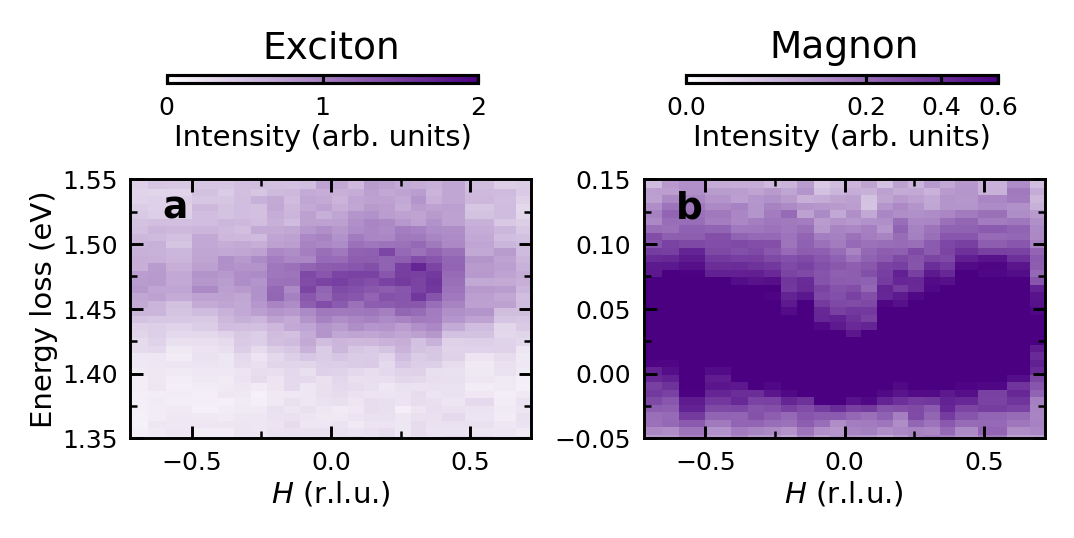

In [11]:
fig, axs = plt.subplots(1, 2, dpi=dpi, figsize=(88*mm,43*mm), 
                        gridspec_kw=dict(wspace=0.28, left=0.11, right=0.99, bottom=0.17, top=0.68, 
                                         width_ratios=[1, 1])
                       )
colormap = mycmap


cax0 = fig.add_axes([0.145,0.87,0.3,0.016]) # axis for colorbar
cax1 = fig.add_axes([0.645,0.87,0.3,0.016]) # axis for colorbar

ims = [0,0]
ims[0] = plot2d(ax=axs[0], x=map_H0L_HT_data['H'], y=map_H0L_HT_data['eloss'], Int=map_H0L_HT_data['intensity'], colormap=colormap, rasterized=True)
ims[1] = plot2d(ax=axs[1], x=map_H0L_HT_data['H'], y=map_H0L_HT_data['eloss'], Int=map_H0L_HT_data['intensity'], colormap=colormap, rasterized=True)



# axis range
xlim = axs[0].get_xlim()
axs[0].set_xlim(xlim)
axs[1].set_xlim(xlim)

axs[0].set_ylim(1.35,1.55)
axs[1].set_ylim(-0.05,0.15)


ims[0].set_clim(0, 2)
ims[1].set_norm(col.PowerNorm(gamma=0.5))
ims[1].set_clim(0, 0.6)



# title
x = 0.5
y = 1.47
axs[0].text(x=x, y=y, s='Exciton', fontsize=rcParams['figure.titlesize'], transform=axs[0].transAxes, ha='center', color='k')
axs[1].text(x=x, y=y, s='Magnon', fontsize=rcParams['figure.titlesize'], transform=axs[1].transAxes, ha='center', color='k')


# axis label
for ax in axs:
    ax.set_xticks((-0.5, 0, 0.5))
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(2))
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))
    ax.set_xlabel(r'$H$ (r.l.u.)')
axs[0].set_ylabel('Energy loss (eV)')


# colorbar
cbar0 = plt.colorbar(ims[0], cax=cax0, orientation='horizontal')
cbar0.set_ticks(np.arange(0, 2.1, 1))
cbar0.ax.tick_params(width=0.75, length=2)
cbar0.outline.set_linewidth(0.75)
cbar1 = plt.colorbar(ims[1], cax=cax1, orientation='horizontal')
cbar1.set_ticks(np.arange(0, 0.61, 0.2))
cbar1.ax.tick_params(width=0.75, length=2)
cbar1.outline.set_linewidth(0.75)
cbar0.set_label('Intensity (arb. units)')
cbar1.set_label('Intensity (arb. units)')


# label
x = 0.08
y = 0.85
axs[0].text(x=x, y=y, s='a', fontdict=dict(fontsize=9,fontweight='bold'), transform=axs[0].transAxes, color='k')
axs[1].text(x=x, y=y, s='b', fontdict=dict(fontsize=9,fontweight='bold'), transform=axs[1].transAxes, color='k')


# fig.savefig('dispersion_HT.pdf', dpi=dpi)

# Figure 4

In [12]:
AIM_rixs_field_sticks_sim = h5_file('data/edrixs/AIM_rixs_field_sticks_sim.hdf', 'r')


Text(0.05, 0.87, 'b')

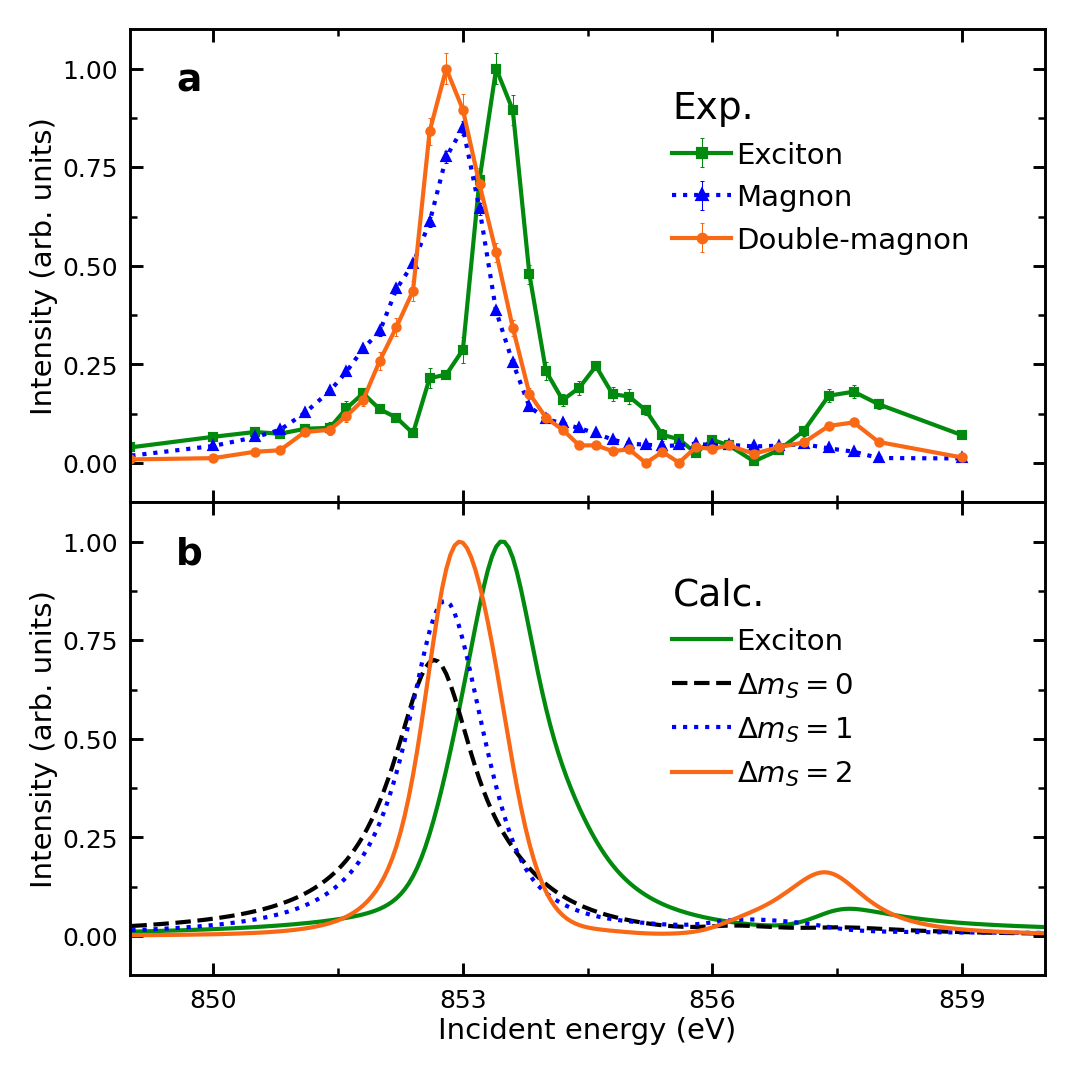

In [13]:
fig, axs = plt.subplots(2, 1, dpi=dpi, figsize=(88*mm,90*mm), gridspec_kw=dict(wspace=0.08, hspace=0, top=0.98, left=0.11, bottom=0.09,right=0.99))

norm = True
alpha = 1
# marker_el = 'v'
color_el = 'k'

x,y,y_low,y_high = np.loadtxt('data/RIXS_fits/Edep_fits_exciton_amplitude.txt', delimiter='\t', comments='# ', unpack='True')
y0 = np.max(y) if norm else 1
axs[0].errorbar(x, y/y0, yerr=(y_low/y0, y_high/y0),marker=marker_e, color=color_e, ls='-',markersize=markersize,
                elinewidth=elinewidth,capsize=capsize,capthick=capthick,alpha=alpha,label='Exciton')
x,y,y_low,y_high = np.loadtxt('data/RIXS_fits/Edep_fits_1magnon_amplitude.txt', delimiter='\t', comments='# ', unpack='True')
y0 = np.max(y) if norm else 1
axs[0].errorbar(x, y/y0*0.85, yerr=(y_low/y0*0.85, y_high/y0*0.85),marker='^', color='b', ls=':',markersize=markersize,
                elinewidth=elinewidth,capsize=capsize,capthick=capthick,alpha=alpha,label='Magnon')
x,y,y_low,y_high = np.loadtxt('data/RIXS_fits/Edep_fits_2magnon_amplitude.txt', delimiter='\t', comments='# ', unpack='True')
y0 = np.max(y) if norm else 1
axs[0].errorbar(x, y/y0, yerr=(y_low/y0, y_high/y0),marker=marker_m, color=color_m, ls='-',markersize=markersize,
                elinewidth=elinewidth,capsize=capsize,capthick=capthick,alpha=alpha,label='Double-magnon')

x = AIM_rixs_field_sticks_sim['omega'][:]
y = AIM_rixs_field_sticks_sim['LH'][:,(1.4<AIM_rixs_field_sticks_sim['eloss'][:]) & (AIM_rixs_field_sticks_sim['eloss'][:]<1.6)]
x0 = AIM_rixs_field_sticks_sim['eloss'][(1.4<AIM_rixs_field_sticks_sim['eloss'][:]) & (AIM_rixs_field_sticks_sim['eloss'][:]<1.6)]
y = np.trapz(y, x0, axis=1)
y0 = np.max(y) if norm else 1
axs[1].plot(x, y/y0, '-', color=color_e, alpha=alpha, label='Exciton')
x = AIM_rixs_field_sticks_sim['omega'][:]
y = AIM_rixs_field_sticks_sim['LH'][:,(-0.02<AIM_rixs_field_sticks_sim['eloss'][:]) & (AIM_rixs_field_sticks_sim['eloss'][:]<0.02)]
x0 = AIM_rixs_field_sticks_sim['eloss'][(-0.02<AIM_rixs_field_sticks_sim['eloss'][:]) & (AIM_rixs_field_sticks_sim['eloss'][:]<0.02)]
y = np.trapz(y, x0, axis=1)
y0 = np.max(y) if norm else 1
axs[1].plot(x, y/y0*0.7, '--', color=color_el, alpha=alpha, label='$\Delta m_S = 0$')
x = AIM_rixs_field_sticks_sim['omega'][:]
y = AIM_rixs_field_sticks_sim['LH'][:,(0.02<AIM_rixs_field_sticks_sim['eloss'][:]) & (AIM_rixs_field_sticks_sim['eloss'][:]<0.05)]
x0 = AIM_rixs_field_sticks_sim['eloss'][(0.02<AIM_rixs_field_sticks_sim['eloss'][:]) & (AIM_rixs_field_sticks_sim['eloss'][:]<0.05)]
y = np.trapz(y, x0, axis=1)
y0 = np.max(y) if norm else 1
axs[1].plot(x, y/y0*0.85, ':', color='b', alpha=alpha, label='$\Delta m_S = 1$')
x = AIM_rixs_field_sticks_sim['omega'][:]
y = AIM_rixs_field_sticks_sim['LH'][:,(0.06<AIM_rixs_field_sticks_sim['eloss'][:]) & (AIM_rixs_field_sticks_sim['eloss'][:]<0.1)]
x0 = AIM_rixs_field_sticks_sim['eloss'][(0.06<AIM_rixs_field_sticks_sim['eloss'][:]) & (AIM_rixs_field_sticks_sim['eloss'][:]<0.1)]
y = np.trapz(y, x0, axis=1)
y0 = np.max(y) if norm else 1
axs[1].plot(x, y/y0, '-', color=color_m, alpha=alpha, label='$\Delta m_S = 2$')


# axis range
for ax in axs:
    # ax.set_yscale('log')
    ax.set_xlim(849,860)
    ax.set_ylim(-0.1,1.1)
    ax.set_xticks(np.arange(850,860.1,3))
    ax.set_yticks(np.arange(0,1.1,0.25))
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(2))
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))
    

# axis label
axs[0].set_ylabel('Intensity (arb. units)')
axs[1].set_ylabel('Intensity (arb. units)')
# axs[0].set_xlabel('Incident energy (eV)')
axs[1].set_xlabel('Incident energy (eV)')


axs[0].legend(loc=(0.58,0.5), title='Exp.', title_fontsize=9, alignment='left',)
axs[1].legend(loc=(0.58,0.37), title='Calc.', title_fontsize=9, alignment='left',)


# label
x = 0.05
y = 0.87
axs[0].text(x=x, y=y, s='a', fontdict=dict(fontsize=9,fontweight='bold'), transform=axs[0].transAxes, color='k')
axs[1].text(x=x, y=y, s='b', fontdict=dict(fontsize=9,fontweight='bold'), transform=axs[1].transAxes, color='k')


# fig.savefig('resonance.pdf', dpi=dpi)

# Supplementary Fig 1

In [14]:
xas = h5_file('data/xas_data.hdf', 'r')

Text(0, 0.5, 'XAS (arb. units)')

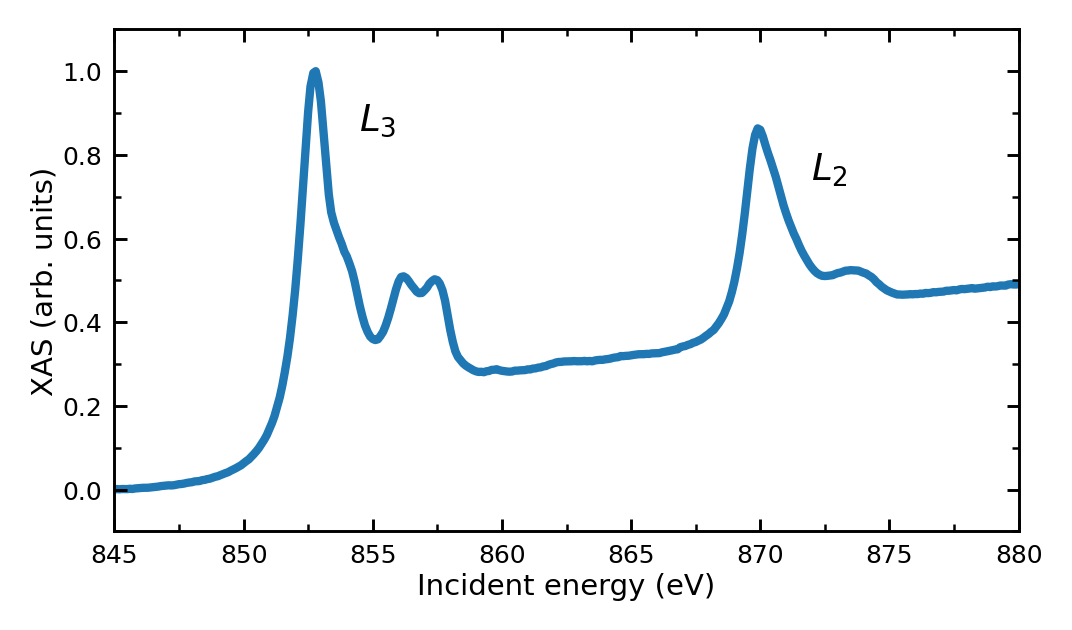

In [15]:
fig, ax = plt.subplots(1, 1, dpi=dpi, figsize=(88*mm,50*mm), 
                       gridspec_kw=dict(top=0.99, left=0.1, bottom=0.14, right=0.97))

ax.plot(xas['energy'][:], normalize(xas['TFY'][:]), color='C0', ls='-', lw=2, label=' ', zorder=0)

ax.text(x=0.27, y=0.8, s='$L_3$', fontsize=9, transform=ax.transAxes, color='k')
ax.text(x=0.77, y=0.7, s='$L_2$', fontsize=9, transform=ax.transAxes, color='k')

# axis range
ax.set_xticks(np.arange(845,880.1,5))
ax.set_xlim(845,880)
ax.set_ylim(-0.1,1.1)

ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(2))
ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))
    
# axis label
ax.set_xlabel('Incident energy (eV)')
ax.set_ylabel('XAS (arb. units)')

# fig.savefig('SI_XAS.pdf', dpi=dpi)

# Supplementary Fig 2

In [16]:
Single_site_model = h5_file('data/edrixs/Single_site_model.hdf', 'r')
Cluster_model = h5_file('data/edrixs/Cluster_model.hdf', 'r')
AIM_model = h5_file('data/edrixs/AIM_model.hdf', 'r')
Nature_model = h5_file('data/edrixs/Nature_model.hdf', 'r')

Text(0.07, 0.9, 'j')

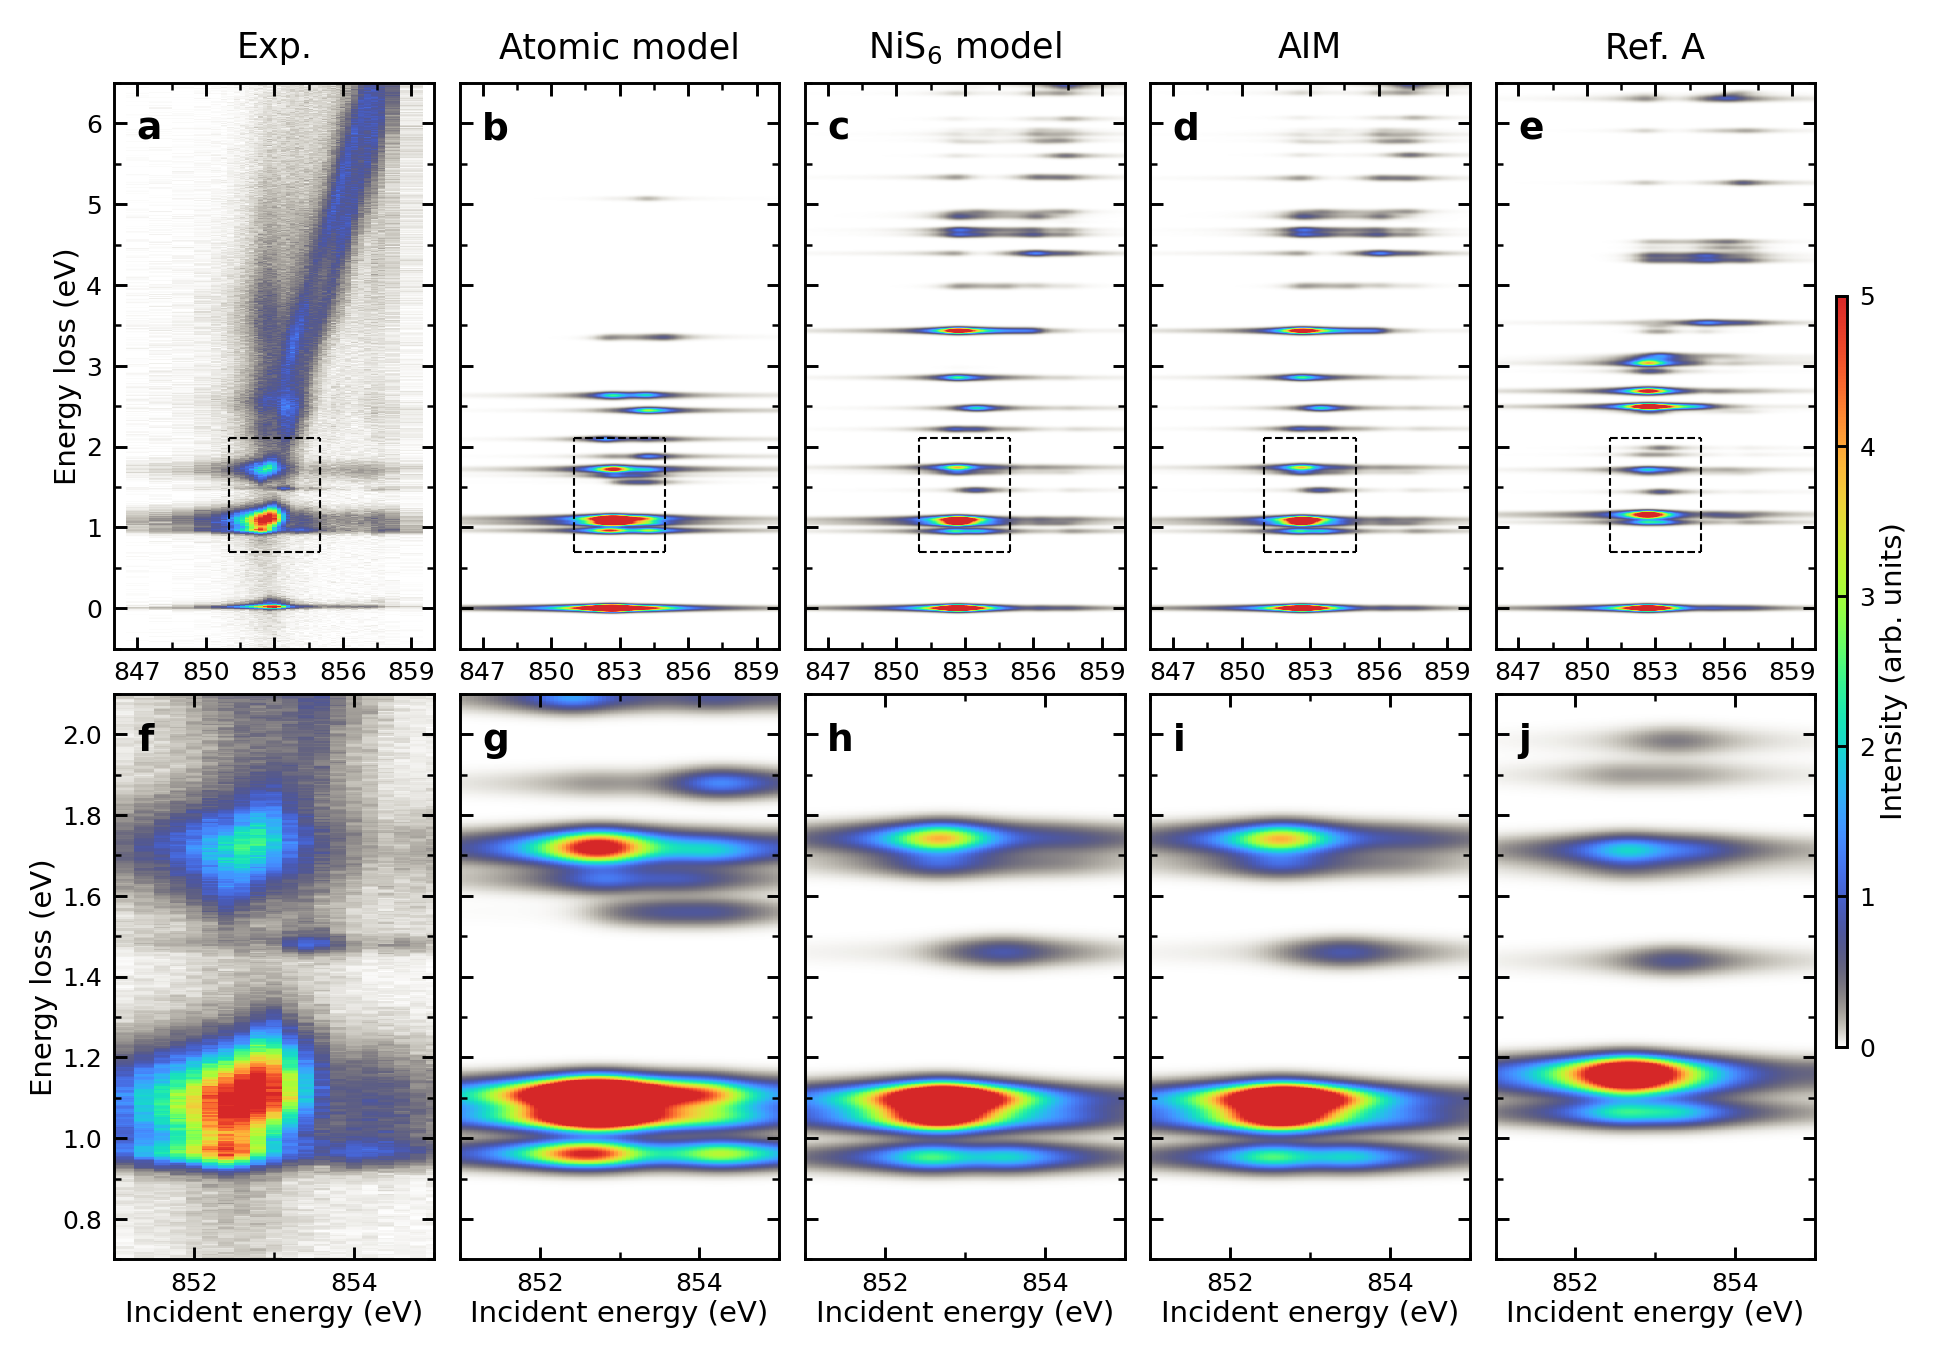

In [17]:
fig, axs = plt.subplots(2, 5, dpi=dpi, figsize=(180*mm,120*mm), 
                        gridspec_kw=dict(wspace=0.08, hspace=0.08, top=0.93, left=0.1, bottom=0.1,right=0.9))
cax = fig.add_axes([0.91,0.1+0.15,0.005,0.93-0.1-0.3]) # axis for colorbar

colormap=turbo_w()


ims = [[0,0,0,0,0,],[0,0,0,0,0,]]
ims[0][0] = plot2d(ax=axs[0,0], x=Emap_data['Ei'][:], y=Emap_data['eloss'][:], Int=Emap_data['intensity'][:], colormap=colormap, rasterized=True)
ims[1][0] = plot2d(ax=axs[1,0], x=Emap_data['Ei'][:], y=Emap_data['eloss'][:], Int=Emap_data['intensity'][:], colormap=colormap, rasterized=True)
ims[0][1] = plot2d(ax=axs[0,1], x=Single_site_model['rixs']['omega'][:], y=Single_site_model['rixs']['eloss'][:], Int=Single_site_model['rixs']['LH'][:]*scale_RIXS, colormap=colormap, rasterized=True)
ims[1][1] = plot2d(ax=axs[1,1], x=Single_site_model['rixs']['omega'][:], y=Single_site_model['rixs']['eloss'][:], Int=Single_site_model['rixs']['LH'][:]*scale_RIXS, colormap=colormap, rasterized=True)
ims[0][2] = plot2d(ax=axs[0,2], x=Cluster_model['rixs']['omega'][:], y=Cluster_model['rixs']['eloss'][:], Int=Cluster_model['rixs']['LH'][:]*scale_RIXS, colormap=colormap, rasterized=True)
ims[1][2] = plot2d(ax=axs[1,2], x=Cluster_model['rixs']['omega'][:], y=Cluster_model['rixs']['eloss'][:], Int=Cluster_model['rixs']['LH'][:]*scale_RIXS, colormap=colormap, rasterized=True)
ims[0][3] = plot2d(ax=axs[0,3], x=AIM_model['rixs']['omega'][:], y=AIM_model['rixs']['eloss'][:], Int=AIM_model['rixs']['LH'][:]*scale_RIXS, colormap=colormap, rasterized=True)
ims[1][3] = plot2d(ax=axs[1,3], x=AIM_model['rixs']['omega'][:], y=AIM_model['rixs']['eloss'][:], Int=AIM_model['rixs']['LH'][:]*scale_RIXS, colormap=colormap, rasterized=True)
ims[0][4] = plot2d(ax=axs[0,4], x=Nature_model['rixs']['omega'][:], y=Nature_model['rixs']['eloss'][:], Int=Nature_model['rixs']['LH'][:]*scale_RIXS, colormap=colormap, rasterized=True)
ims[1][4] = plot2d(ax=axs[1,4], x=Nature_model['rixs']['omega'][:], y=Nature_model['rixs']['eloss'][:], Int=Nature_model['rixs']['LH'][:]*scale_RIXS, colormap=colormap, rasterized=True)


# axis range
for i in range(5):
    axs[0,i].set_xticks(np.arange(847,860.1,3))
    axs[1,i].set_xticks([852,854])
    axs[0,i].set_xlim(846,860)
    axs[0,i].set_ylim(-0.5,6.5)
    axs[1,i].set_xlim(851,855)
    axs[1,i].set_ylim(0.7,2.1)
plt.setp([ax.get_yticklabels() for ax in axs[:,1:].flatten()], visible=False)

# dashed box
for i in range(5):
    axs[0,i].plot([851,851], [0.7,2.1], 'k--', lw=0.5)
    axs[0,i].plot([855,855], [0.7,2.1], 'k--', lw=0.5)
    axs[0,i].plot([851,855], [0.7,0.7], 'k--', lw=0.5)
    axs[0,i].plot([851,855], [2.1,2.1], 'k--', lw=0.5)

for ax in axs.flatten():
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(2))
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))
    
# axis label
for ax in axs[1,:]:
    ax.set_xlabel('Incident energy (eV)')
    
axs[0,0].set_ylabel('Energy loss (eV)')
axs[1,0].set_ylabel('Energy loss (eV)')


# colorbar
for im in np.array(ims).flatten():
    im.set_clim(0, 5)
cbar = plt.colorbar(ims[0][0], cax=cax)
cbar.set_ticks(np.arange(0, 5.1, 1))
cbar.set_label('Intensity (arb. units)')

# title
axs[0,0].set_title('Exp.')
axs[0,1].set_title('Atomic model')
axs[0,2].set_title('NiS$_6$ model')
axs[0,3].set_title('AIM')
axs[0,4].set_title('Ref. A')


# label
x = 0.07
y = 0.9
axs[0,0].text(x=x, y=y, s='a', fontdict=dict(fontsize=9,fontweight='bold'), transform=axs[0,0].transAxes, color='k')
axs[0,1].text(x=x, y=y, s='b', fontdict=dict(fontsize=9,fontweight='bold'), transform=axs[0,1].transAxes, color='k')
axs[0,2].text(x=x, y=y, s='c', fontdict=dict(fontsize=9,fontweight='bold'), transform=axs[0,2].transAxes, color='k')
axs[0,3].text(x=x, y=y, s='d', fontdict=dict(fontsize=9,fontweight='bold'), transform=axs[0,3].transAxes, color='k')
axs[0,4].text(x=x, y=y, s='e', fontdict=dict(fontsize=9,fontweight='bold'), transform=axs[0,4].transAxes, color='k')
axs[1,0].text(x=x, y=y, s='f', fontdict=dict(fontsize=9,fontweight='bold'), transform=axs[1,0].transAxes, color='k')
axs[1,1].text(x=x, y=y, s='g', fontdict=dict(fontsize=9,fontweight='bold'), transform=axs[1,1].transAxes, color='k')
axs[1,2].text(x=x, y=y, s='h', fontdict=dict(fontsize=9,fontweight='bold'), transform=axs[1,2].transAxes, color='k')
axs[1,3].text(x=x, y=y, s='i', fontdict=dict(fontsize=9,fontweight='bold'), transform=axs[1,3].transAxes, color='k')
axs[1,4].text(x=x, y=y, s='j', fontdict=dict(fontsize=9,fontweight='bold'), transform=axs[1,4].transAxes, color='k')


# fig.savefig('SI_ED_compare_Emap.pdf', dpi=dpi)

# Supplementary Fig 3

In [18]:
spectra_H0L_data = h5_file('data/RIXS_data/H0L_T40K_1dSpectra.hdf', 'r')
spectra_H0L_fits = h5_file('data/RIXS_fits/H0L_40K_fits_spectra.hdf', 'r')
spectra_0KL_data = h5_file('data/RIXS_data/0KL_T40K_1dSpectra.hdf', 'r')
spectra_0KL_fits = h5_file('data/RIXS_fits/0KL_40K_fits_spectra.hdf', 'r')

Text(0.06, 0.95, 'b')

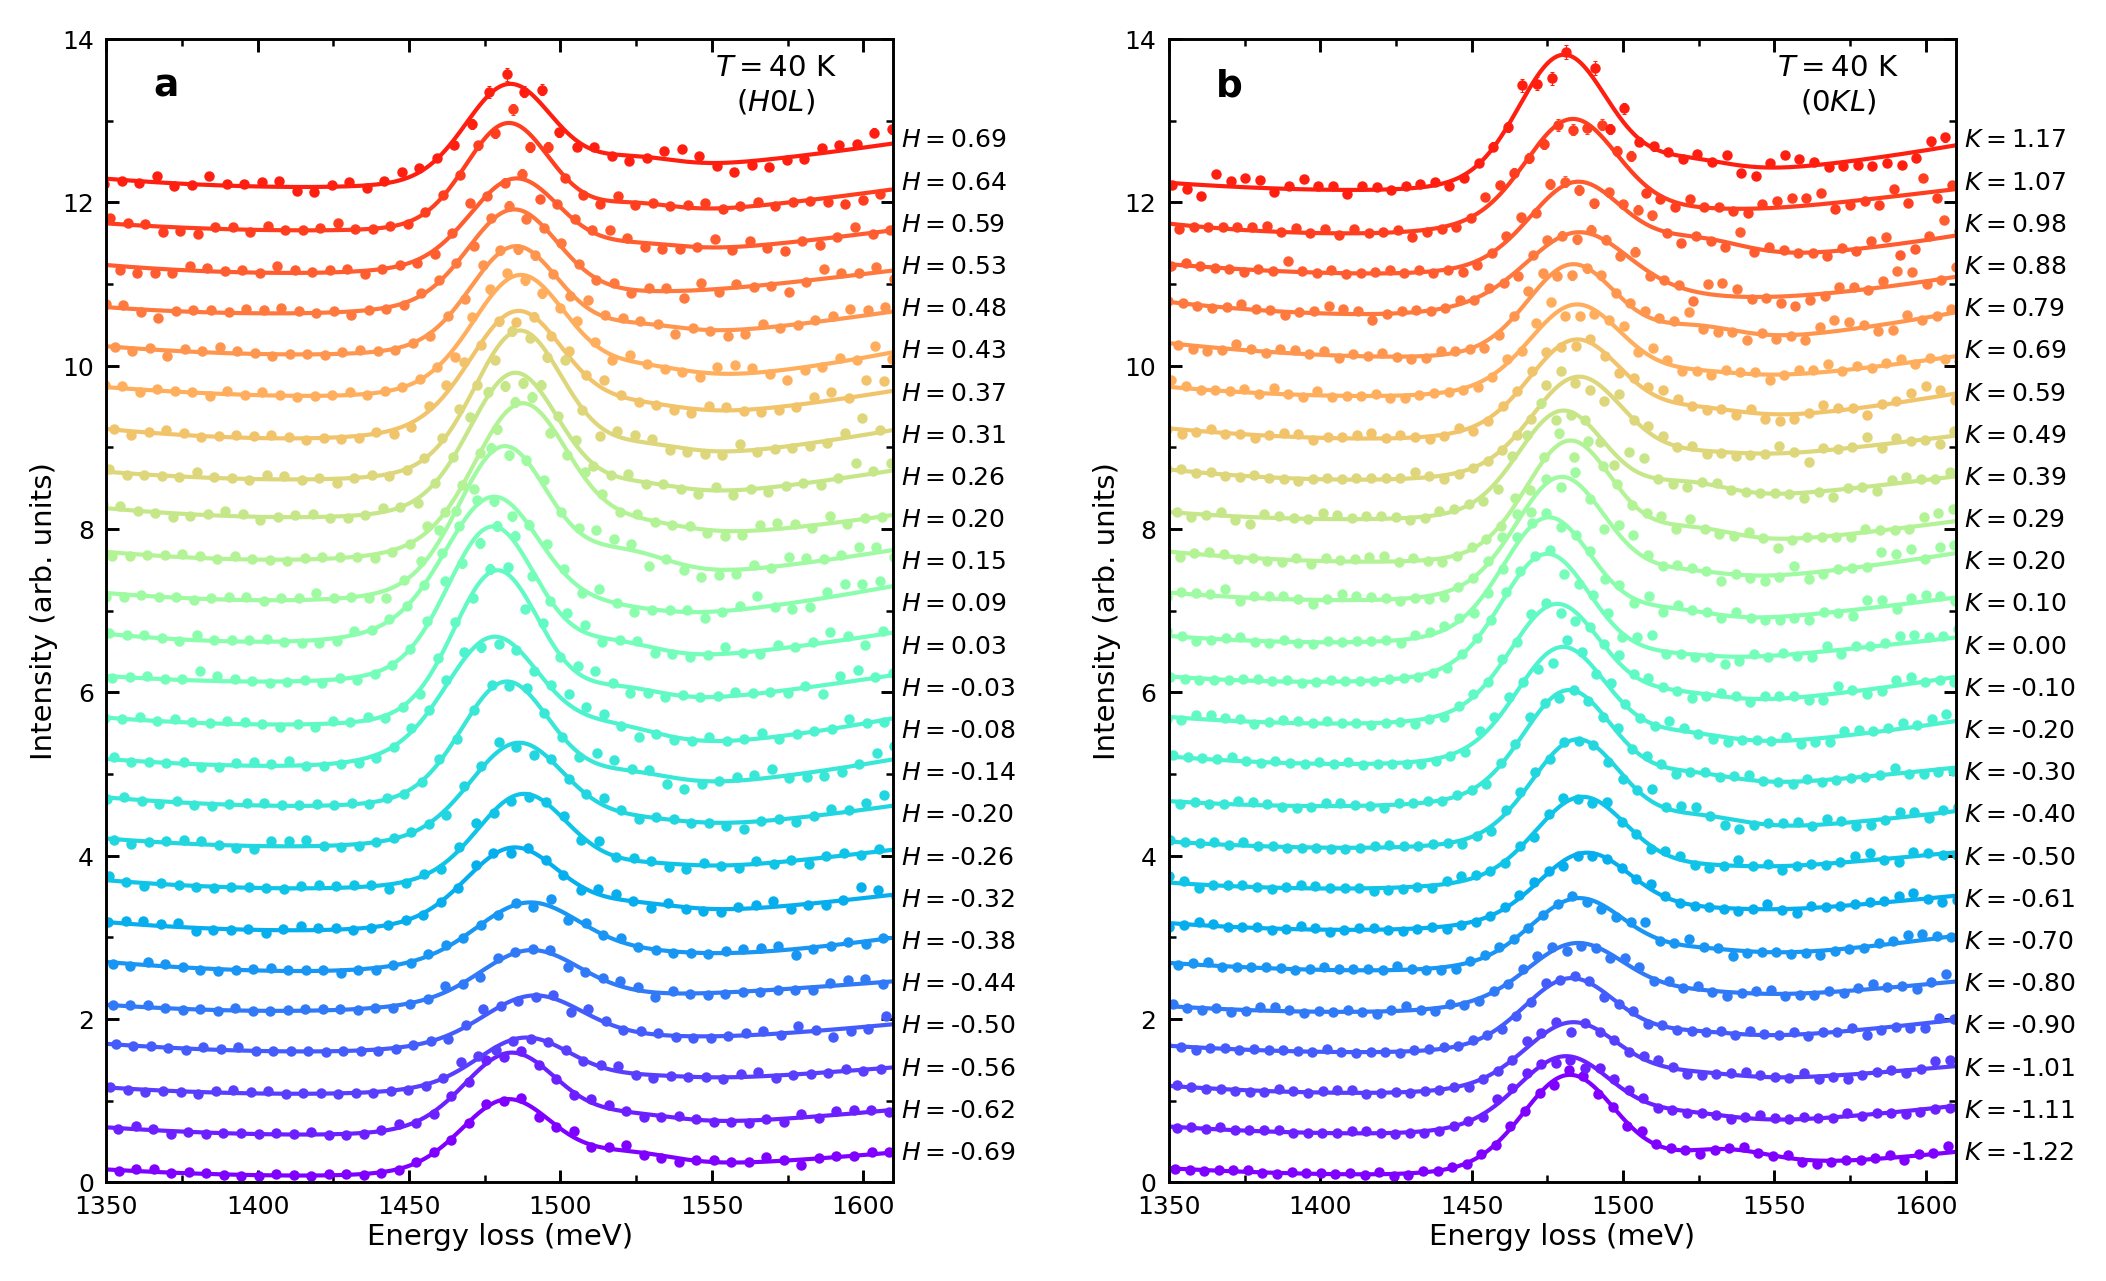

In [19]:
fig, axs = plt.subplots(1, 2, dpi=dpi, figsize=(180*mm,110*mm), 
                        gridspec_kw=dict(wspace=0.35, left=0.07, right=0.94, bottom=0.07, top=0.95,)
                       )

alpha = 1
cmap = gen_cmap(26, cmap='rainbow')

yshift = 0.5
Hs = spectra_H0L_data['H'][:]
for i, H in enumerate(Hs):
    x = spectra_H0L_data['spectra_H_{:.2f}'.format(H)]['eloss'][:]
    y = spectra_H0L_data['spectra_H_{:.2f}'.format(H)]['intensity'][:]
    yerr = spectra_H0L_data['spectra_H_{:.2f}'.format(H)]['error'][:]
        
    axs[0].errorbar(x, y+yshift*i, yerr=yerr,marker='o', color=cmap(i), ls='',markersize=markersize,
                    elinewidth=elinewidth,capsize=capsize,capthick=capthick,alpha=alpha)
      
    # plot the fit results
    x = spectra_H0L_fits['fits_spectra_H_{:.2f}'.format(H)]['exciton']['x'][:]
    y = spectra_H0L_fits['fits_spectra_H_{:.2f}'.format(H)]['exciton']['y'][:]
    axs[0].plot(x, y+yshift*i,'-',color=cmap(i))
     
    # label
    axs[0].text(1.01, 0.02+0.0369*i, s='$H=${:.2f}'.format(Hs[i]), fontsize=6, transform=axs[0].transAxes, color='k')

yshift = 0.5
Ks = spectra_0KL_data['K'][:]
for i, K in enumerate(Ks):
    x = spectra_0KL_data['spectra_K_{:.2f}'.format(K)]['eloss'][:]
    y = spectra_0KL_data['spectra_K_{:.2f}'.format(K)]['intensity'][:]
    yerr = spectra_0KL_data['spectra_K_{:.2f}'.format(K)]['error'][:]
    
    axs[1].errorbar(x, y+yshift*i, yerr=yerr,marker='o', color=cmap(i), ls='',markersize=markersize,
                    elinewidth=elinewidth,capsize=capsize,capthick=capthick,alpha=alpha)
      
    # plot the fit results
    x = spectra_0KL_fits['fits_spectra_K_{:.2f}'.format(K)]['exciton']['x'][:]
    y = spectra_0KL_fits['fits_spectra_K_{:.2f}'.format(K)]['exciton']['y'][:]
    axs[1].plot(x, y+yshift*i,'-',color=cmap(i))
    
    # label
    axs[1].text(1.01, 0.02+0.0369*i, s='$K=${:.2f}'.format(Ks[i]), fontsize=6, transform=axs[1].transAxes, color='k')
    
    
x = 0.85
y = 0.96
axs[0].text(x, y, s='$T= 40$ K\n($H0L$)', transform=axs[0].transAxes, color='k', va='center',ha='center')
axs[1].text(x, y, s='$T= 40$ K\n($0KL$)', transform=axs[1].transAxes, color='k', va='center',ha='center')


for ax in axs:
    # axis label
    ax.set_xlabel('Energy loss (meV)')
    ax.set_ylabel('Intensity (arb. units)')
    # axis range
    ax.set_ylim(0,14)
    ax.set_xlim(1350,1610)
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(2))
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))

# label
x = 0.06
y = 0.95
axs[0].text(x=x, y=y, s='a', fontdict=dict(fontsize=9,fontweight='bold'), transform=axs[0].transAxes, color='k')
axs[1].text(x=x, y=y, s='b', fontdict=dict(fontsize=9,fontweight='bold'), transform=axs[1].transAxes, color='k')

# fig.savefig('SI_LT_exciton.pdf', dpi=dpi)

# Supplementary Fig 4

(-0.2, 2.5)

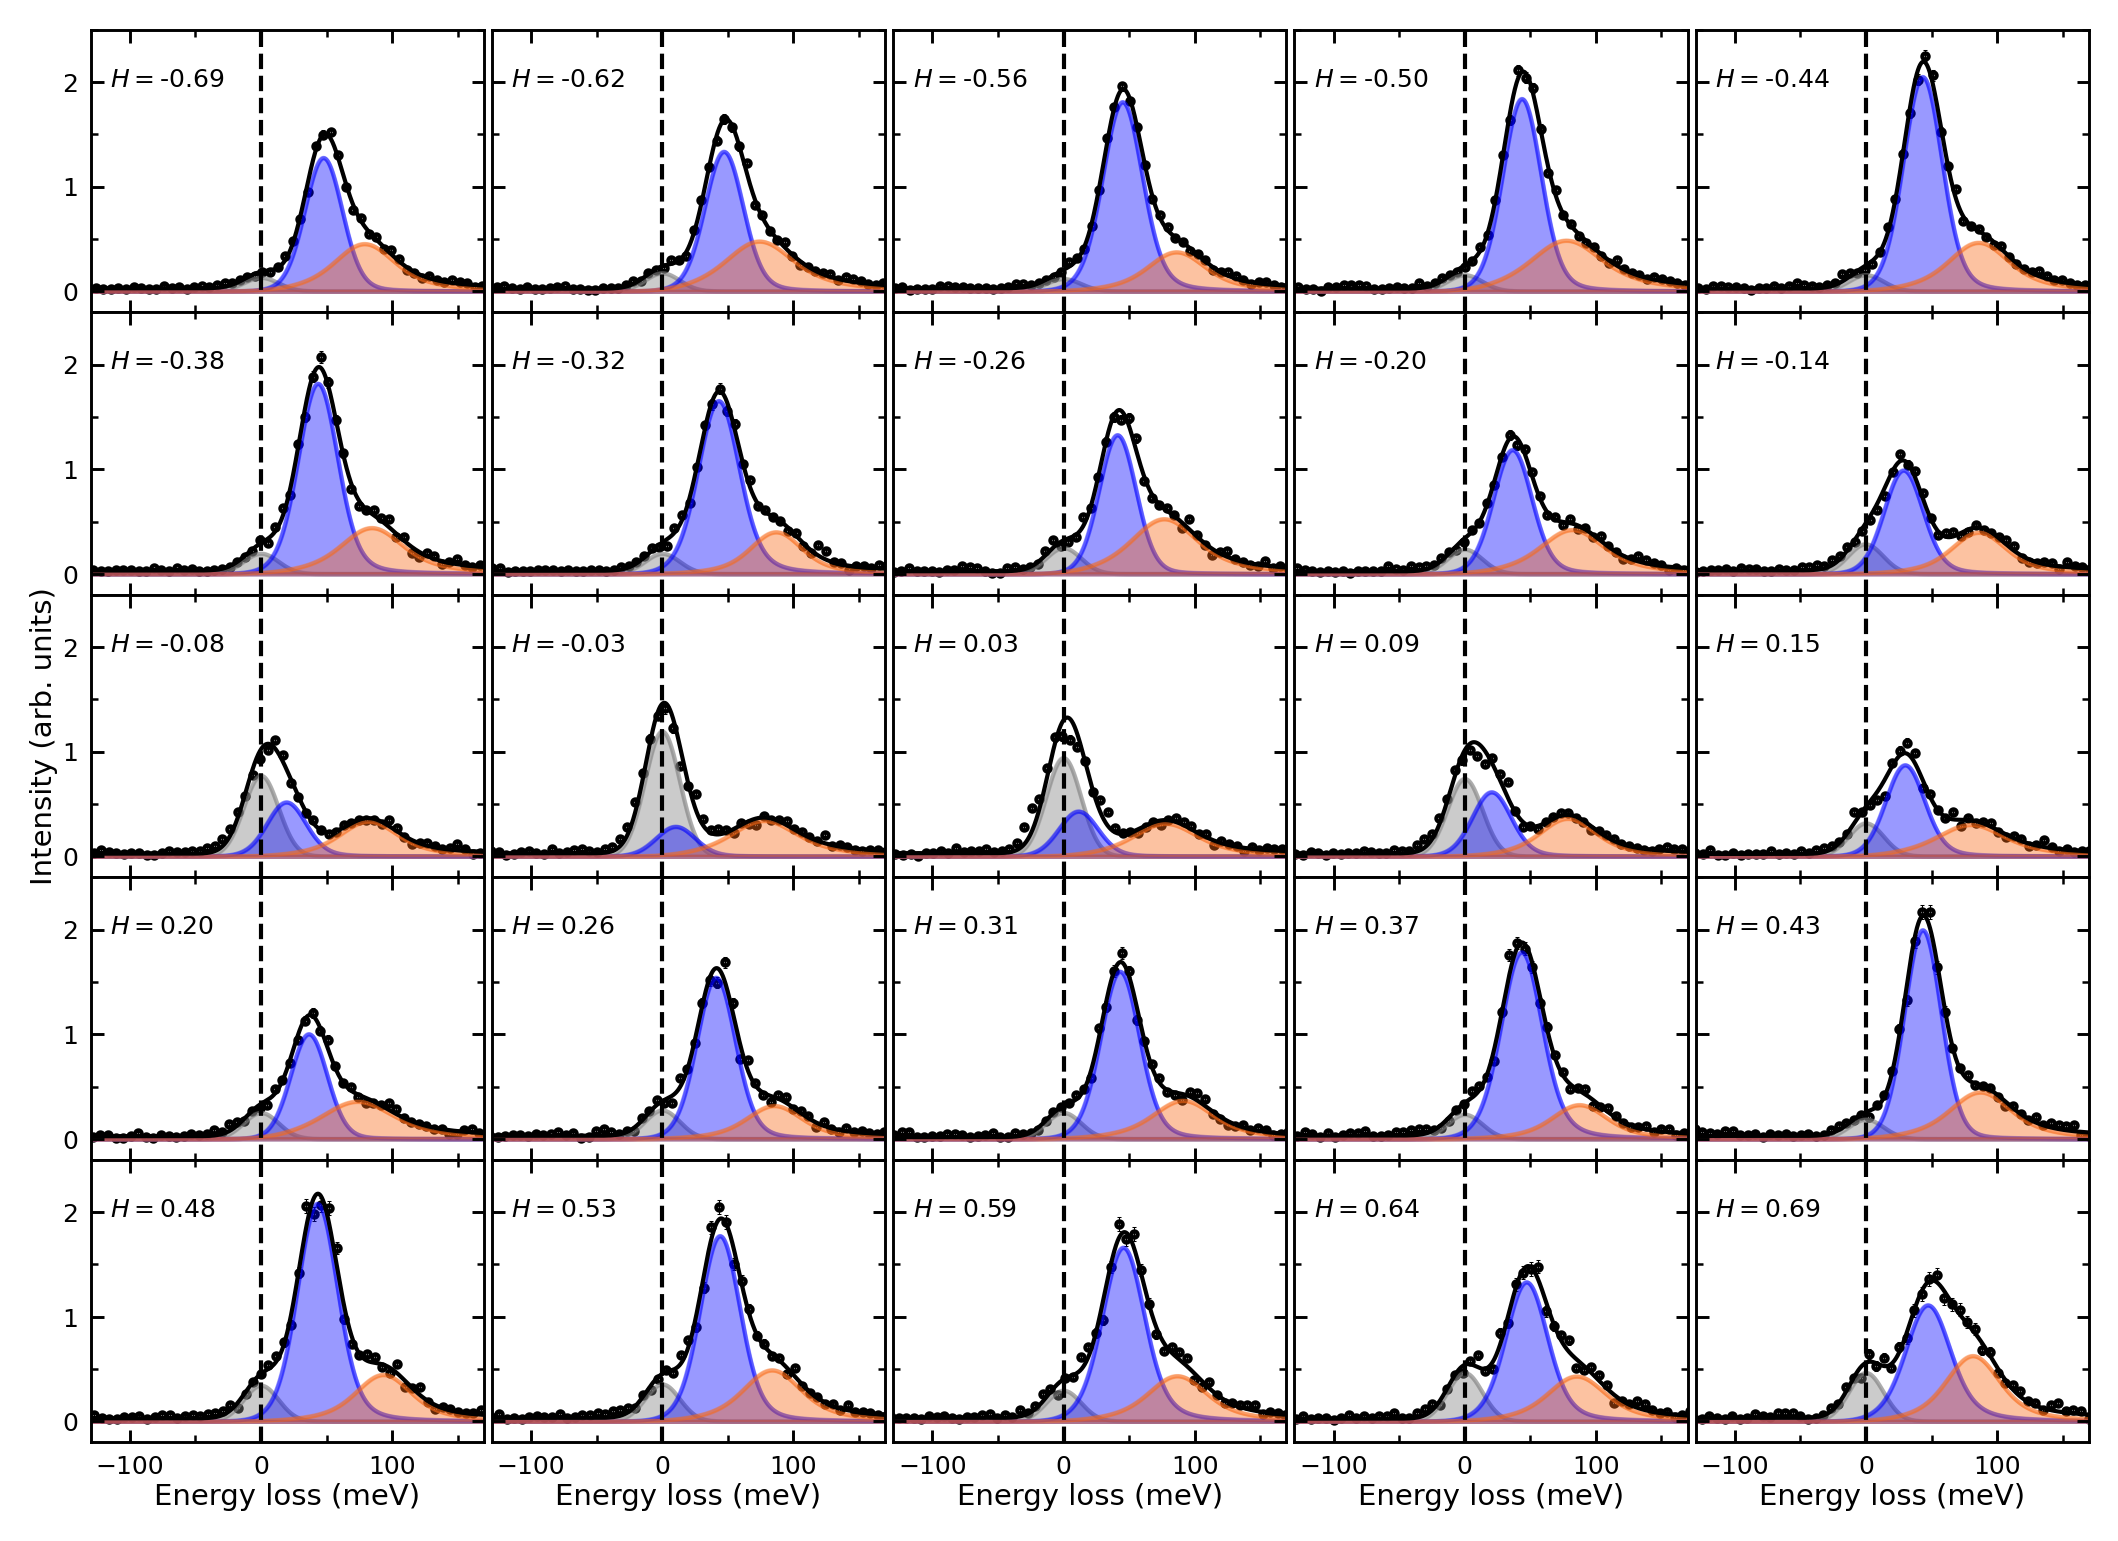

In [20]:
fig, axs = plt.subplots(5, 5, dpi=dpi, figsize=(180*mm,130*mm), sharex=True, sharey=True,
                        gridspec_kw=dict(wspace=0.02, hspace=0, left=0.05, right=0.99, bottom=0.07, top=0.99,)
                       )

alpha = 0.4
fillstyle = 'none'
color_elastic = 'C7'
color_magnon = 'b'
color_2magnon = color_m

Hs = spectra_H0L_data['H'][:]
for i, H in enumerate(Hs):
    figIndex0 = i // 5
    figIndex1 = i % 5
    
    x = spectra_H0L_data['spectra_H_{:.2f}'.format(H)]['eloss'][:]
    y = spectra_H0L_data['spectra_H_{:.2f}'.format(H)]['intensity'][:]
    yerr = spectra_H0L_data['spectra_H_{:.2f}'.format(H)]['error'][:]
    
    axs[figIndex0,figIndex1].errorbar(x, y, yerr=yerr,marker='o', fillstyle=fillstyle, color='k', ls='',markersize=markersize,
                                      elinewidth=elinewidth,capsize=capsize,capthick=capthick,alpha=1,zorder=0)
      
    # plot the fit results   
    x = spectra_H0L_fits['fits_spectra_H_{:.2f}'.format(H)]['elastic']['x'][:]
    y = spectra_H0L_fits['fits_spectra_H_{:.2f}'.format(H)]['elastic']['y'][:]
    axs[figIndex0,figIndex1].plot(x, y,'-',color='k',zorder=2)
    y = spectra_H0L_fits['fits_spectra_H_{:.2f}'.format(H)]['elastic']['elastic'][:]
    axs[figIndex0,figIndex1].plot(x, y,'-',color=color_elastic,zorder=1, alpha=alpha)
    axs[figIndex0,figIndex1].fill_between(x, y, y2=0, color=color_elastic, alpha=alpha)
    y = spectra_H0L_fits['fits_spectra_H_{:.2f}'.format(H)]['elastic']['1magnon'][:]
    axs[figIndex0,figIndex1].plot(x, y,'-',color=color_magnon,zorder=1, alpha=alpha)
    axs[figIndex0,figIndex1].fill_between(x, y, y2=0, color=color_magnon, alpha=alpha)
    y = spectra_H0L_fits['fits_spectra_H_{:.2f}'.format(H)]['elastic']['2magnon'][:]
    axs[figIndex0,figIndex1].plot(x, y,'-',color=color_2magnon,zorder=1, alpha=alpha)
    axs[figIndex0,figIndex1].fill_between(x, y, y2=0, color=color_2magnon, alpha=alpha)
    
     
    # label
    x=0.05
    y=0.8
    axs[figIndex0,figIndex1].text(x, y, s='$H=${:.2f}'.format(Hs[i]), 
                                  fontsize=6, transform=axs[figIndex0,figIndex1].transAxes, color='k')


# axis label
for i in range(5):
    axs[4,i].set_xlabel('Energy loss (meV)')
axs[2,0].set_ylabel('Intensity (arb. units)')

# axis range
for ax in axs.flatten():
    ax.vlines(x=0, ymin=-0.2, ymax=2.5, ls='--', colors='k',)
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(2))
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))
axs[0,0].set_xlim(-130,170)
axs[0,0].set_ylim(-0.2,2.5)

# fig.savefig('SI_H0L_LT_magnon.pdf', dpi=dpi)

# Supplementary Fig 5

(-0.5, 6.5)

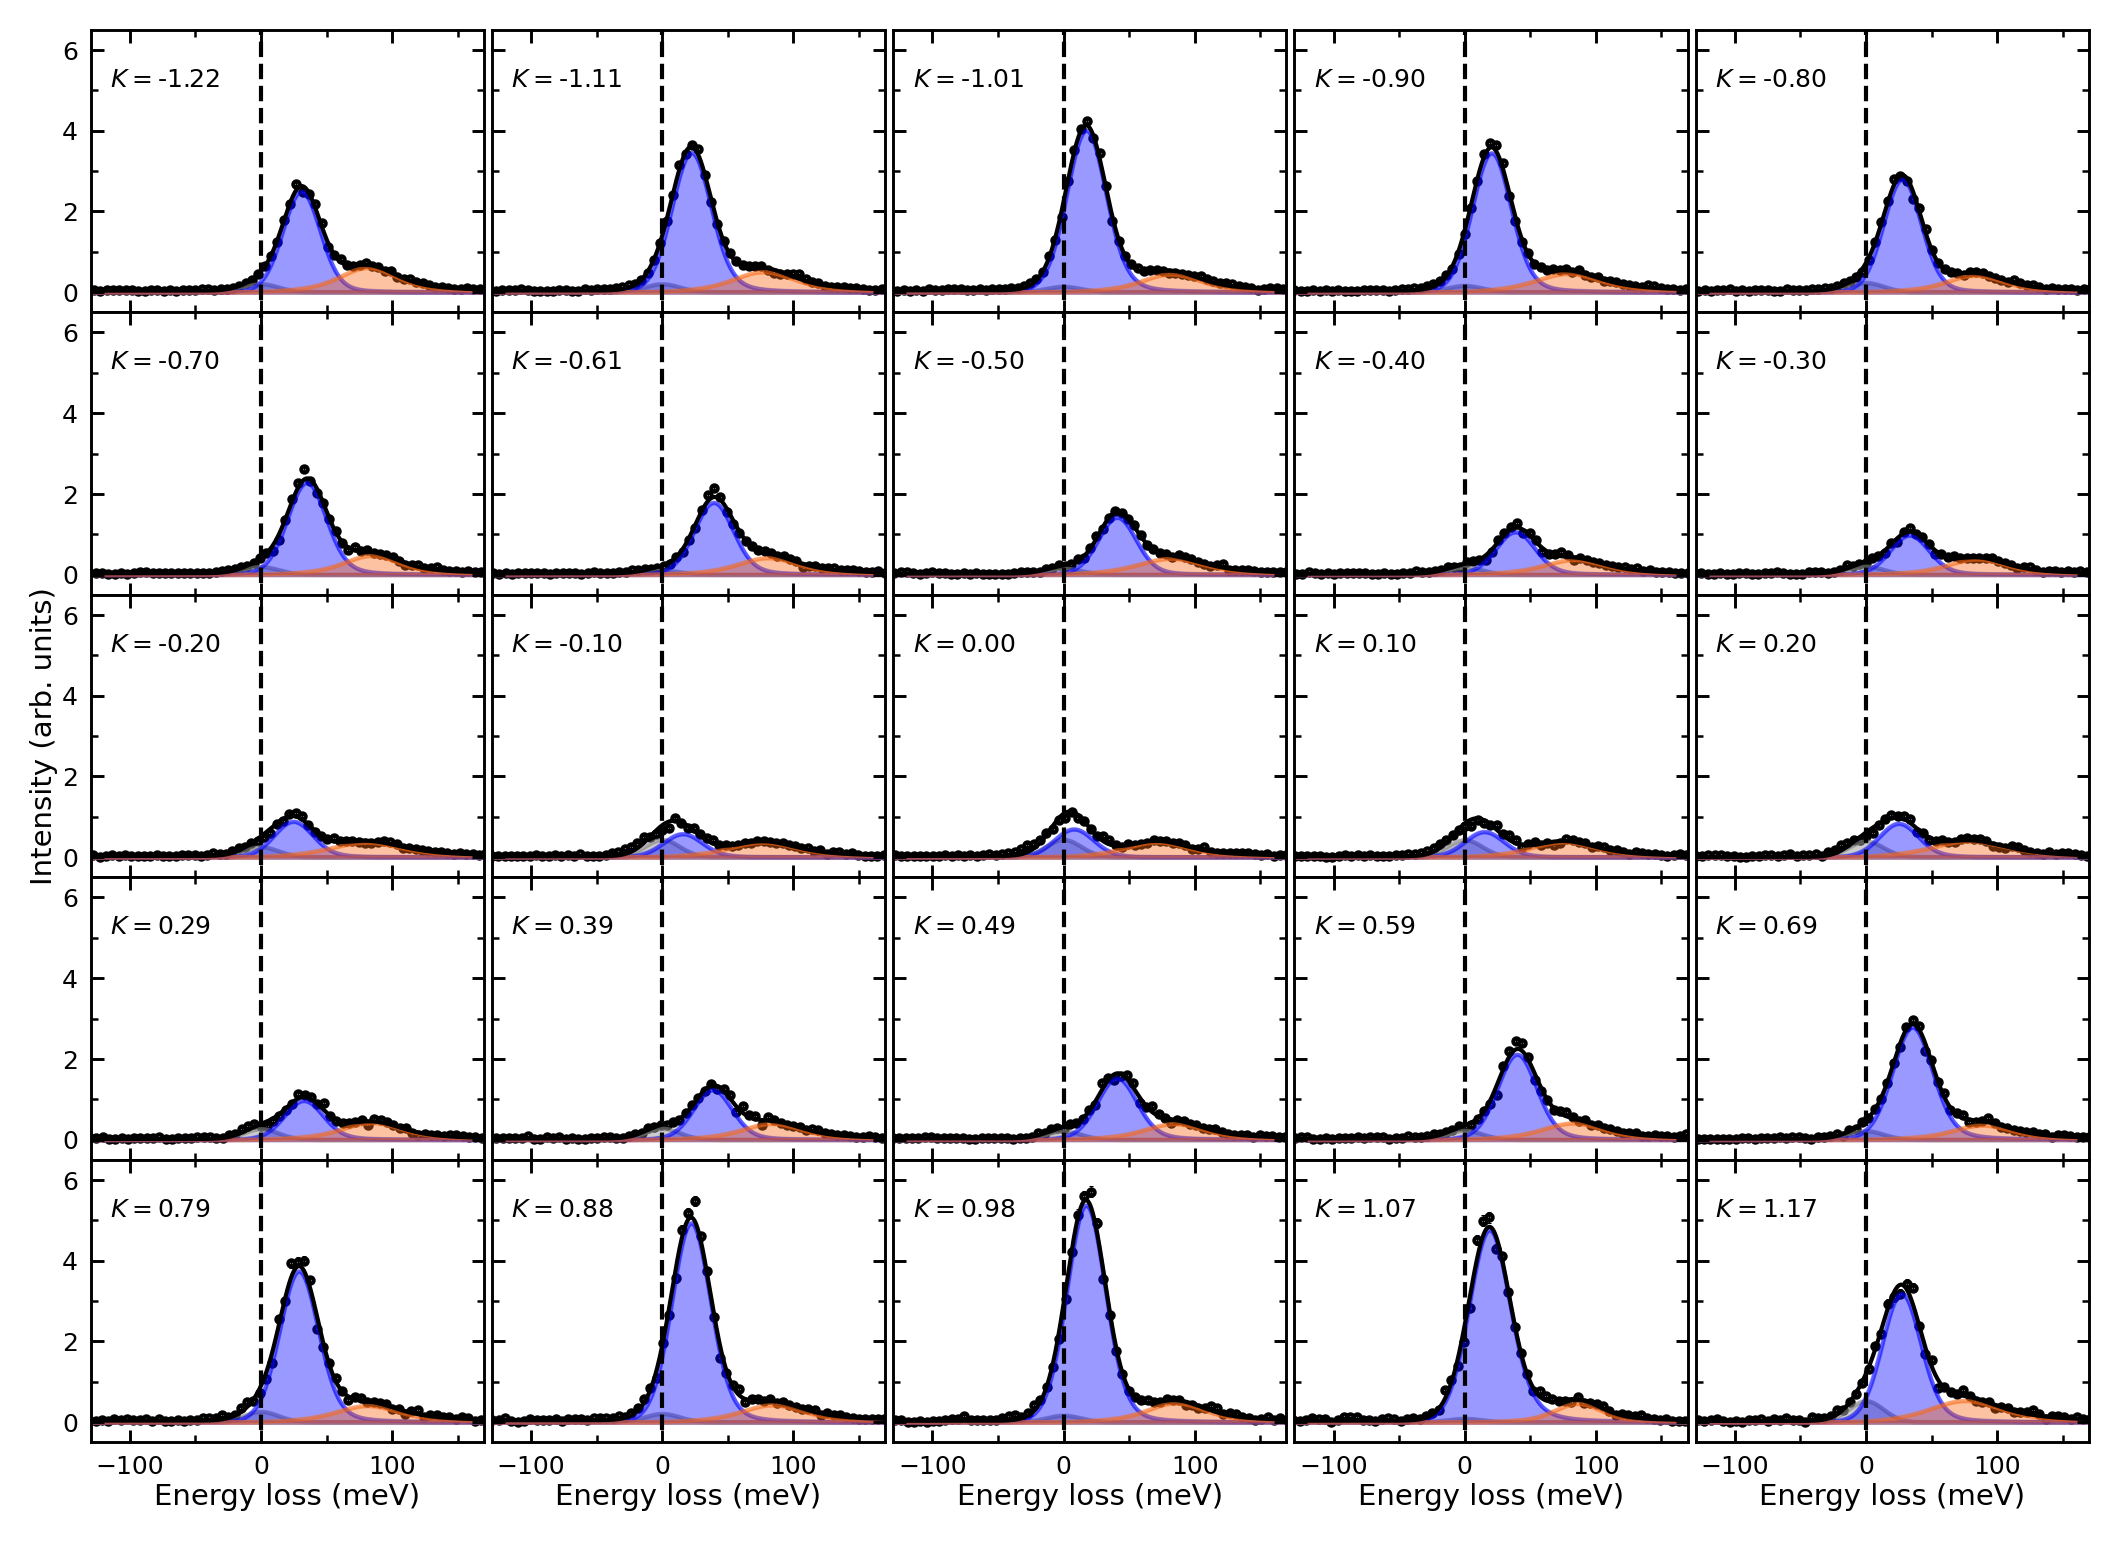

In [21]:
fig, axs = plt.subplots(5, 5, dpi=dpi, figsize=(180*mm,130*mm), sharex=True, sharey=True,
                        gridspec_kw=dict(wspace=0.02, hspace=0, left=0.05, right=0.99, bottom=0.07, top=0.99,)
                       )

alpha = 0.4
fillstyle = 'none'
color_elastic = 'C7'
color_magnon = 'b'
color_2magnon = color_m

Ks = spectra_0KL_data['K'][:]
for i, K in enumerate(Ks):
    figIndex0 = i // 5
    figIndex1 = i % 5
    
    x = spectra_0KL_data['spectra_K_{:.2f}'.format(K)]['eloss'][:]
    y = spectra_0KL_data['spectra_K_{:.2f}'.format(K)]['intensity'][:]
    yerr = spectra_0KL_data['spectra_K_{:.2f}'.format(K)]['error'][:]
    
    axs[figIndex0,figIndex1].errorbar(x, y, yerr=yerr,marker='o', fillstyle=fillstyle, color='k', ls='',markersize=markersize,
                                      elinewidth=elinewidth,capsize=capsize,capthick=capthick,alpha=1,zorder=0)
      
    # plot the fit results   
    x = spectra_0KL_fits['fits_spectra_K_{:.2f}'.format(K)]['elastic']['x'][:]
    y = spectra_0KL_fits['fits_spectra_K_{:.2f}'.format(K)]['elastic']['y'][:]
    axs[figIndex0,figIndex1].plot(x, y,'-',color='k',zorder=2)
    y = spectra_0KL_fits['fits_spectra_K_{:.2f}'.format(K)]['elastic']['elastic'][:]
    axs[figIndex0,figIndex1].plot(x, y,'-',color=color_elastic,zorder=1, alpha=alpha)
    axs[figIndex0,figIndex1].fill_between(x, y, y2=0, color=color_elastic, alpha=alpha)
    y = spectra_0KL_fits['fits_spectra_K_{:.2f}'.format(K)]['elastic']['1magnon'][:]
    axs[figIndex0,figIndex1].plot(x, y,'-',color=color_magnon,zorder=1, alpha=alpha)
    axs[figIndex0,figIndex1].fill_between(x, y, y2=0, color=color_magnon, alpha=alpha)
    y = spectra_0KL_fits['fits_spectra_K_{:.2f}'.format(K)]['elastic']['2magnon'][:]
    axs[figIndex0,figIndex1].plot(x, y,'-',color=color_2magnon,zorder=1, alpha=alpha)
    axs[figIndex0,figIndex1].fill_between(x, y, y2=0, color=color_2magnon, alpha=alpha)
    
     
    # label
    x=0.05
    y=0.8
    axs[figIndex0,figIndex1].text(x, y, s='$K=${:.2f}'.format(Ks[i]), 
                                  fontsize=6, transform=axs[figIndex0,figIndex1].transAxes, color='k')


# axis label
for i in range(5):
    axs[4,i].set_xlabel('Energy loss (meV)')
axs[2,0].set_ylabel('Intensity (arb. units)')

# axis range
for ax in axs.flatten():
    ax.vlines(x=0, ymin=-0.2, ymax=6.5, ls='--', colors='k',)
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(2))
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))
axs[0,0].set_xlim(-130,170)
axs[0,0].set_ylim(-0.5,6.5)

# fig.savefig('SI_0KL_LT_magnon.pdf', dpi=dpi)

# Supplementary Fig 6

Text(0.05, 0.85, 'd')

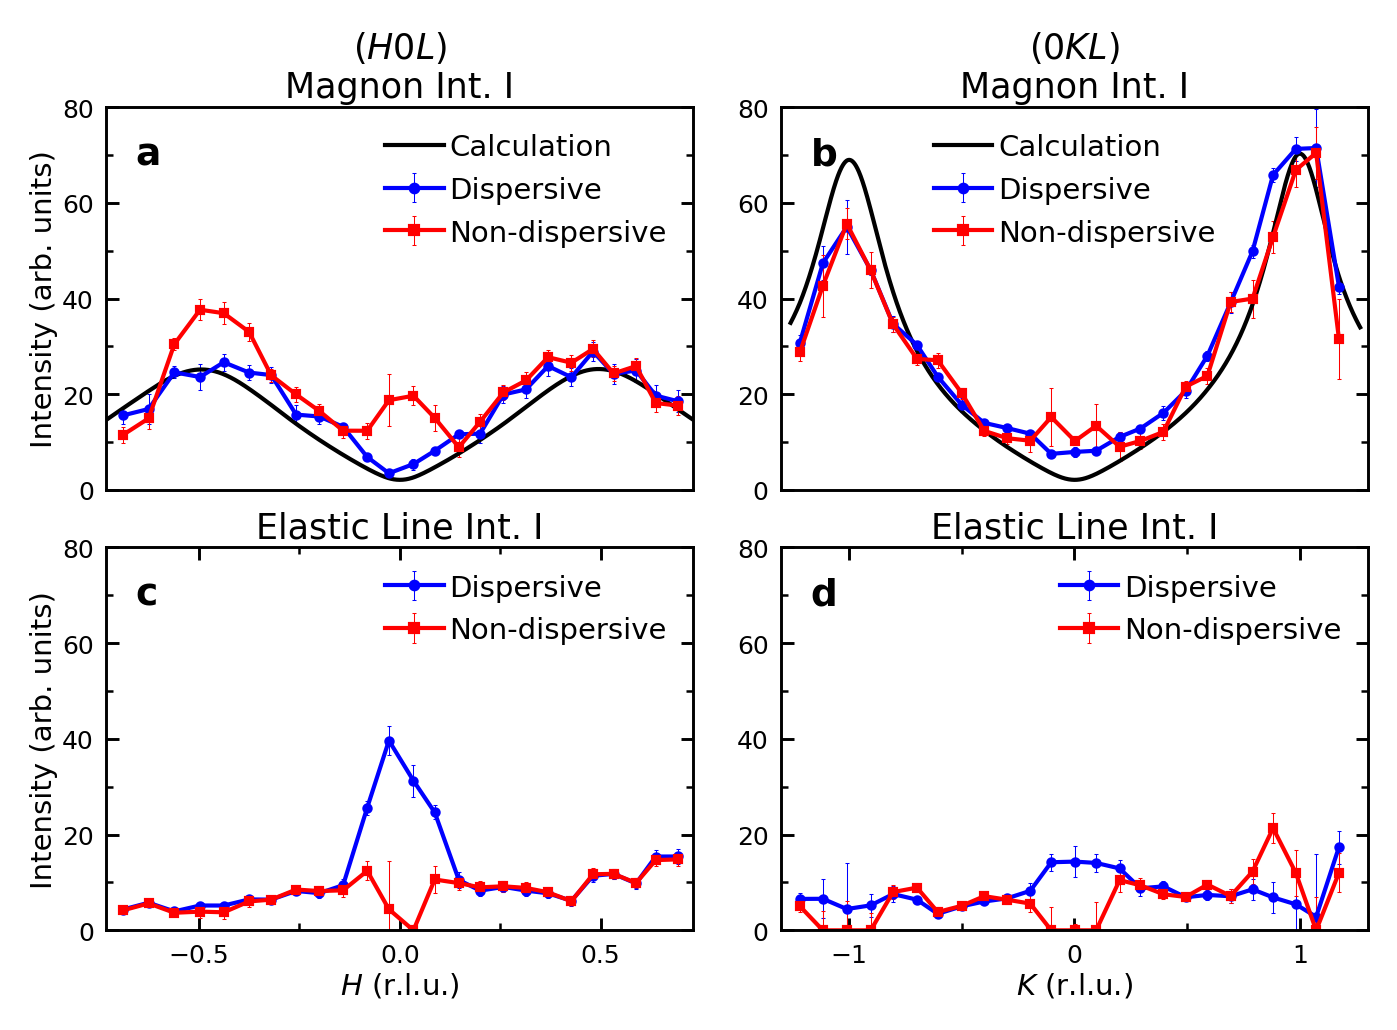

In [22]:
fit1_color = 'b'
fit2_color = 'r'


fig, axs = plt.subplots(2, 2, dpi=dpi, figsize=(120*mm,85*mm), 
                        gridspec_kw=dict(wspace=0.15, hspace=0.15,top=0.9, left=0.1, right=0.99, bottom=0.08)
                       )

x,y,y_low,y_high = np.loadtxt('data/RIXS_fits/H0L_40K_fits_magnon_amplitude.txt', delimiter='\t', comments='# ', unpack='True')
axs[0,0].errorbar(x, y, yerr=(y_low, y_high), marker='o', color=fit1_color, ls='-',markersize=markersize,
                  elinewidth=elinewidth,capsize=capsize,capthick=capthick, label='Dispersive')
x,y,y_low,y_high = np.loadtxt('data/RIXS_fits/H0L_40K_fits2_magnon_amplitude.txt', delimiter='\t', comments='# ', unpack='True')
axs[0,0].errorbar(x, y, yerr=(y_low, y_high), marker='s', color=fit2_color, ls='-',markersize=markersize,
                  elinewidth=elinewidth,capsize=capsize,capthick=capthick, label='Non-dispersive')
x = magnon_calculated_data['H'][:]
y = magnon_calculated_data['H_amplitude'][:] * scale_magnon
axs[0,0].plot(x, y, color='k', ls='-', label='Calculation')



x,y,y_low,y_high = np.loadtxt('data/RIXS_fits/0KL_40K_fits_magnon_amplitude.txt', delimiter='\t', comments='# ', unpack='True')
axs[0,1].errorbar(x, y, yerr=(y_low, y_high), marker='o', color=fit1_color, ls='-',markersize=markersize,
                  elinewidth=elinewidth,capsize=capsize,capthick=capthick, label='Dispersive')
x,y,y_low,y_high = np.loadtxt('data/RIXS_fits/0KL_40K_fits2_magnon_amplitude.txt', delimiter='\t', comments='# ', unpack='True')
axs[0,1].errorbar(x, y, yerr=(y_low, y_high), marker='s', color=fit2_color, ls='-',markersize=markersize,
                  elinewidth=elinewidth,capsize=capsize,capthick=capthick, label='Non-dispersive')
x = magnon_calculated_data['K'][:]
y = magnon_calculated_data['K_amplitude'][:] * scale_magnon
axs[0,1].plot(x, y, color='k', ls='-', label='Calculation')

# elastic intensity
x,y,y_low,y_high = np.loadtxt('data/RIXS_fits/H0L_40K_fits_elastic_amplitude.txt', delimiter='\t', comments='# ', unpack='True')
axs[1,0].errorbar(x, y, yerr=(y_low, y_high), marker='o', color=fit1_color, ls='-',markersize=markersize,
                  elinewidth=elinewidth,capsize=capsize,capthick=capthick, label='Dispersive')
x,y,y_low,y_high = np.loadtxt('data/RIXS_fits/H0L_40K_fits2_elastic_amplitude.txt', delimiter='\t', comments='# ', unpack='True')
axs[1,0].errorbar(x, y, yerr=(y_low, y_high), marker='s', color=fit2_color, ls='-',markersize=markersize,
                  elinewidth=elinewidth,capsize=capsize,capthick=capthick, label='Non-dispersive')

x,y,y_low,y_high = np.loadtxt('data/RIXS_fits/0KL_40K_fits_elastic_amplitude.txt', delimiter='\t', comments='# ', unpack='True')
axs[1,1].errorbar(x, y, yerr=(y_low, y_high), marker='o', color=fit1_color, ls='-',markersize=markersize,
                  elinewidth=elinewidth,capsize=capsize,capthick=capthick, label='Dispersive')
x,y,y_low,y_high = np.loadtxt('data/RIXS_fits/0KL_40K_fits2_elastic_amplitude.txt', delimiter='\t', comments='# ', unpack='True')
axs[1,1].errorbar(x, y, yerr=(y_low, y_high), marker='s', color=fit2_color, ls='-',markersize=markersize,
                  elinewidth=elinewidth,capsize=capsize,capthick=capthick, label='Non-dispersive')


axs[0,0].set_title('($H0L$)\n'+r'Magnon Int. I', y=0.96)
axs[0,1].set_title('($0KL$)\n'+r'Magnon Int. I', y=0.96)
axs[1,0].set_title('Elastic Line Int. I', y=0.96)
axs[1,1].set_title('Elastic Line Int. I', y=0.96)


# axis range
axs[0,0].set_xlim([-0.73, 0.73])
axs[0,1].set_xlim([-1.3, 1.3])
axs[1,0].set_xlim([-0.73, 0.73])
axs[1,1].set_xlim([-1.3, 1.3])

axs[0,0].set_ylim([0, 80])
axs[0,1].set_ylim([0, 80])
axs[1,0].set_ylim([0, 80])
axs[1,1].set_ylim([0, 80])

# axis legend
for ax in axs.flatten():
    ax.legend()


# axis label
for ax in axs.flatten():
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(2))
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))
axs[0,0].set_xticks([])
axs[1,0].set_xticks((-0.5, 0, 0.5))
axs[0,1].set_xticks([])
axs[1,1].set_xticks((-1, 0, 1))
axs[0,0].set_ylabel(r'Intensity (arb. units)')
axs[1,0].set_ylabel(r'Intensity (arb. units)')
axs[1,0].set_xlabel(r'$H$ (r.l.u.)')
axs[1,1].set_xlabel(r'$K$ (r.l.u.)')




# label
x = 0.05
y = 0.85
axs[0,0].text(x=x, y=y, s='a', fontdict=dict(fontsize=9,fontweight='bold'), transform=axs[0,0].transAxes, color='k')
axs[0,1].text(x=x, y=y, s='b', fontdict=dict(fontsize=9,fontweight='bold'), transform=axs[0,1].transAxes, color='k')
axs[1,0].text(x=x, y=y, s='c', fontdict=dict(fontsize=9,fontweight='bold'), transform=axs[1,0].transAxes, color='k')
axs[1,1].text(x=x, y=y, s='d', fontdict=dict(fontsize=9,fontweight='bold'), transform=axs[1,1].transAxes, color='k')

# fig.savefig('SI_fits_comparison.pdf', dpi=dpi)

# Supplementary Fig 7

In [23]:
spectra_H0L_data_bad = h5_file('data/RIXS_data/H0L_T40K_1dSpectra_bad2.hdf', 'r')
spectra_H0L_fits_bad = h5_file('data/RIXS_fits/H0L_40K_fits3_spectra.hdf', 'r')
spectra_0KL_data_bad = h5_file('data/RIXS_data/0KL_T40K_1dSpectra_bad2.hdf', 'r')
spectra_0KL_fits_bad = h5_file('data/RIXS_fits/0KL_40K_fits3_spectra.hdf', 'r')

Text(0.05, 0.88, 'f')

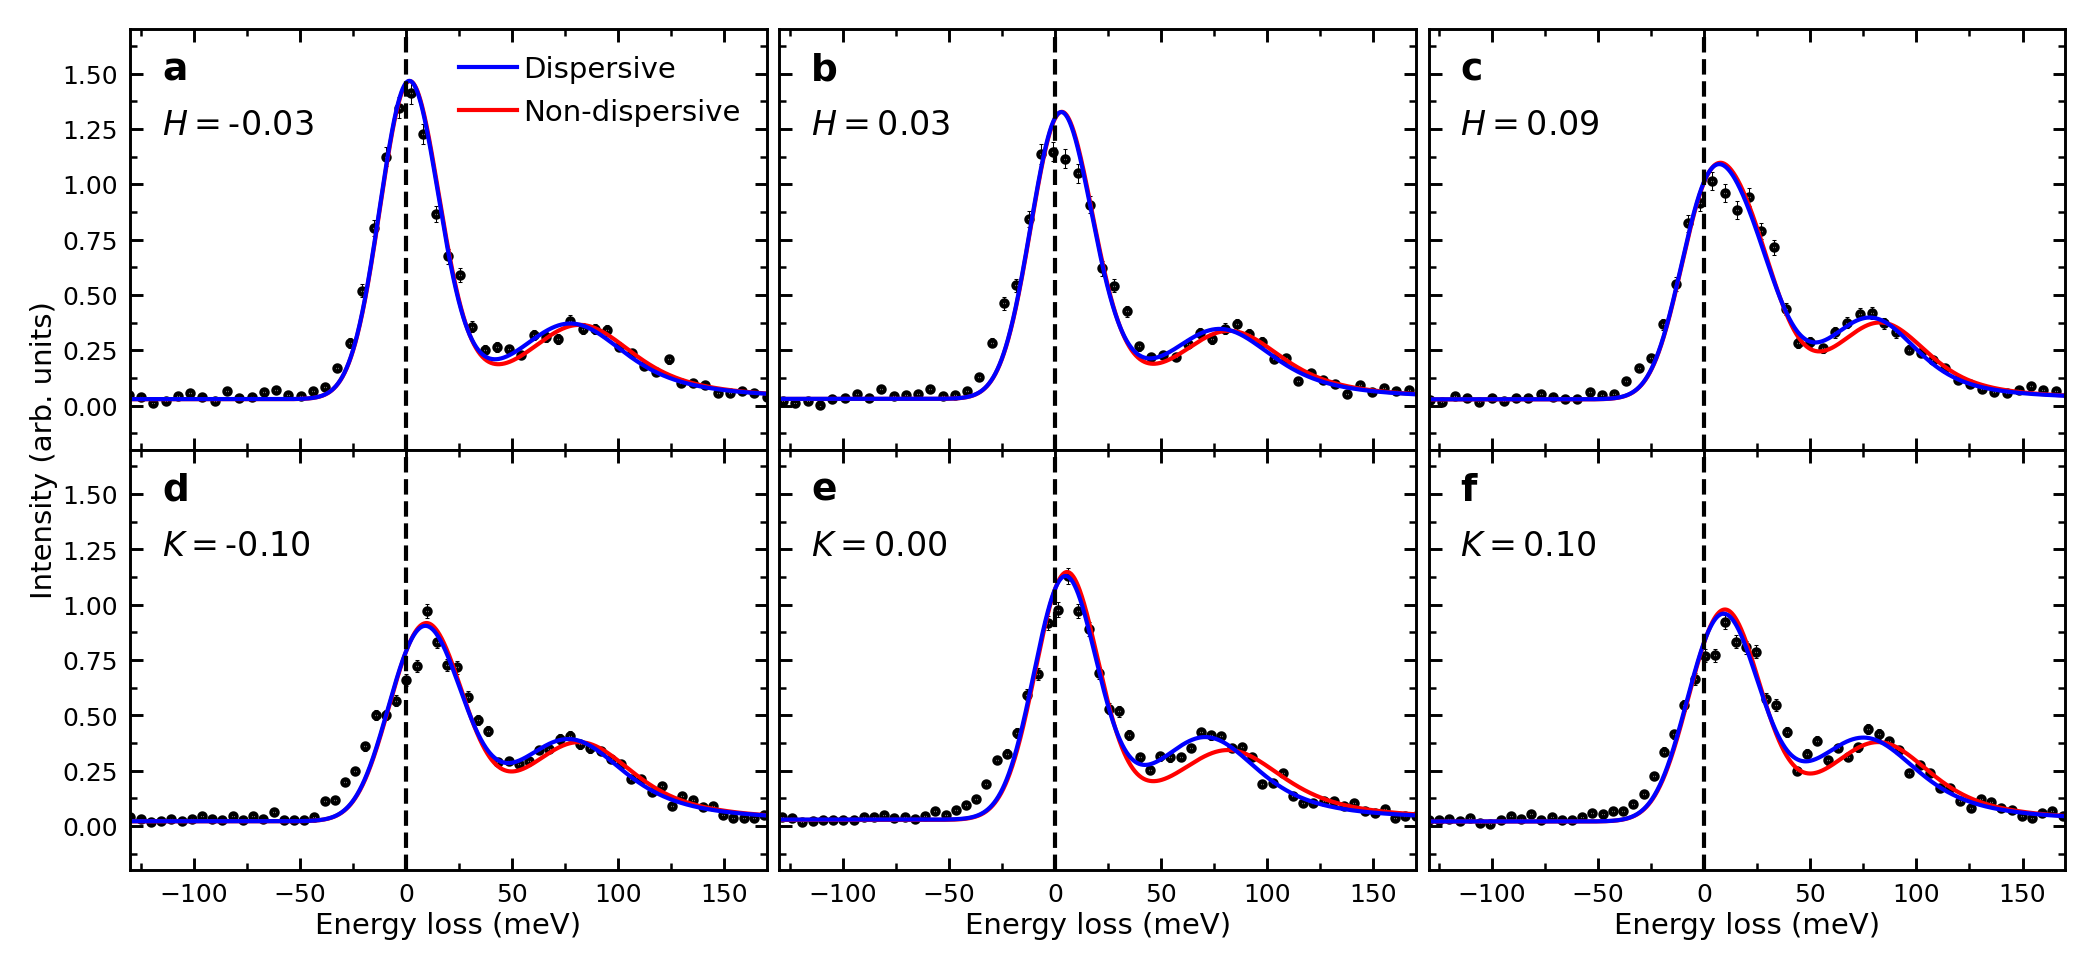

In [24]:
fig, axs = plt.subplots(2, 3, dpi=dpi, figsize=(180*mm,80*mm), sharex=True, sharey=True,
                        gridspec_kw=dict(wspace=0.02, hspace=0, left=0.08, right=0.99, bottom=0.1, top=0.99,)
                       )

fillstyle = 'none'


Hs = spectra_H0L_data['H'][:]
for i, n in enumerate([11,12,13]):
    H = Hs[n]
    x = spectra_H0L_data['spectra_H_{:.2f}'.format(H)]['eloss'][:]
    y = spectra_H0L_data['spectra_H_{:.2f}'.format(H)]['intensity'][:]
    yerr = spectra_H0L_data['spectra_H_{:.2f}'.format(H)]['error'][:]
    
    axs[0,i].errorbar(x, y, yerr=yerr,marker='o', fillstyle=fillstyle, color='k', ls='',markersize=markersize,
                      elinewidth=elinewidth,capsize=capsize,capthick=capthick,alpha=1,zorder=0)
    
      
    # plot the fit results   
    x = spectra_H0L_fits['fits_spectra_H_{:.2f}'.format(H)]['elastic']['x'][:]
    y = spectra_H0L_fits['fits_spectra_H_{:.2f}'.format(H)]['elastic']['y'][:]
    axs[0,i].plot(x, y,'-',color='b',zorder=2, label='Dispersive')
    
    x = spectra_H0L_fits_bad['fits_spectra_H_{:.2f}'.format(H)]['elastic']['x'][:]
    y = spectra_H0L_fits_bad['fits_spectra_H_{:.2f}'.format(H)]['elastic']['y'][:]
    axs[0,i].plot(x, y,'-',color='r',zorder=1, label='Non-dispersive')

 
    # label
    x=0.05
    y=0.75
    axs[0,i].text(x, y, s='$H=${:.2f}'.format(H), fontsize=8, transform=axs[0,i].transAxes, color='k')
    
Ks = spectra_0KL_data['K'][:]
for i, n in enumerate([11,12,13]):
    K = Ks[n]
    x = spectra_0KL_data['spectra_K_{:.2f}'.format(K)]['eloss'][:]
    y = spectra_0KL_data['spectra_K_{:.2f}'.format(K)]['intensity'][:]
    yerr = spectra_0KL_data['spectra_K_{:.2f}'.format(K)]['error'][:]
    
    axs[1,i].errorbar(x, y, yerr=yerr,marker='o', fillstyle=fillstyle, color='k', ls='',markersize=markersize,
                      elinewidth=elinewidth,capsize=capsize,capthick=capthick,alpha=1,zorder=0)
    
      
    # plot the fit results   
    x = spectra_0KL_fits['fits_spectra_K_{:.2f}'.format(K)]['elastic']['x'][:]
    y = spectra_0KL_fits['fits_spectra_K_{:.2f}'.format(K)]['elastic']['y'][:]
    axs[1,i].plot(x, y,'-',color='b',zorder=2)
    
    x = spectra_0KL_fits_bad['fits_spectra_K_{:.2f}'.format(K)]['elastic']['x'][:]
    y = spectra_0KL_fits_bad['fits_spectra_K_{:.2f}'.format(K)]['elastic']['y'][:]
    axs[1,i].plot(x, y,'-',color='r',zorder=1)

 
    # label
    x=0.05
    y=0.75
    axs[1,i].text(x, y, s='$K=${:.2f}'.format(K), fontsize=8, transform=axs[1,i].transAxes, color='k')


axs[0,0].legend()

# axis label
for i in range(3):
    axs[1,i].set_xlabel('Energy loss (meV)')
axs[1,0].set_ylabel('Intensity (arb. units)', y=1,)

# axis range
for ax in axs.flatten():
    ax.vlines(x=0, ymin=-0.2, ymax=1.7, ls='--', colors='k',)
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(2))
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))
axs[0,0].set_xlim(-130,170)
axs[0,0].set_ylim(-0.2,1.7)

# label
x = 0.05
y = 0.88
axs[0,0].text(x=x, y=y, s='a', fontdict=dict(fontsize=9,fontweight='bold'), transform=axs[0,0].transAxes, color='k')
axs[0,1].text(x=x, y=y, s='b', fontdict=dict(fontsize=9,fontweight='bold'), transform=axs[0,1].transAxes, color='k')
axs[0,2].text(x=x, y=y, s='c', fontdict=dict(fontsize=9,fontweight='bold'), transform=axs[0,2].transAxes, color='k')
axs[1,0].text(x=x, y=y, s='d', fontdict=dict(fontsize=9,fontweight='bold'), transform=axs[1,0].transAxes, color='k')
axs[1,1].text(x=x, y=y, s='e', fontdict=dict(fontsize=9,fontweight='bold'), transform=axs[1,1].transAxes, color='k')
axs[1,2].text(x=x, y=y, s='f', fontdict=dict(fontsize=9,fontweight='bold'), transform=axs[1,2].transAxes, color='k')


# fig.savefig('SI_fits_comparison2.pdf', dpi=dpi)

# Supplementary Fig 8

Text(0.06, 0.85, 'd')

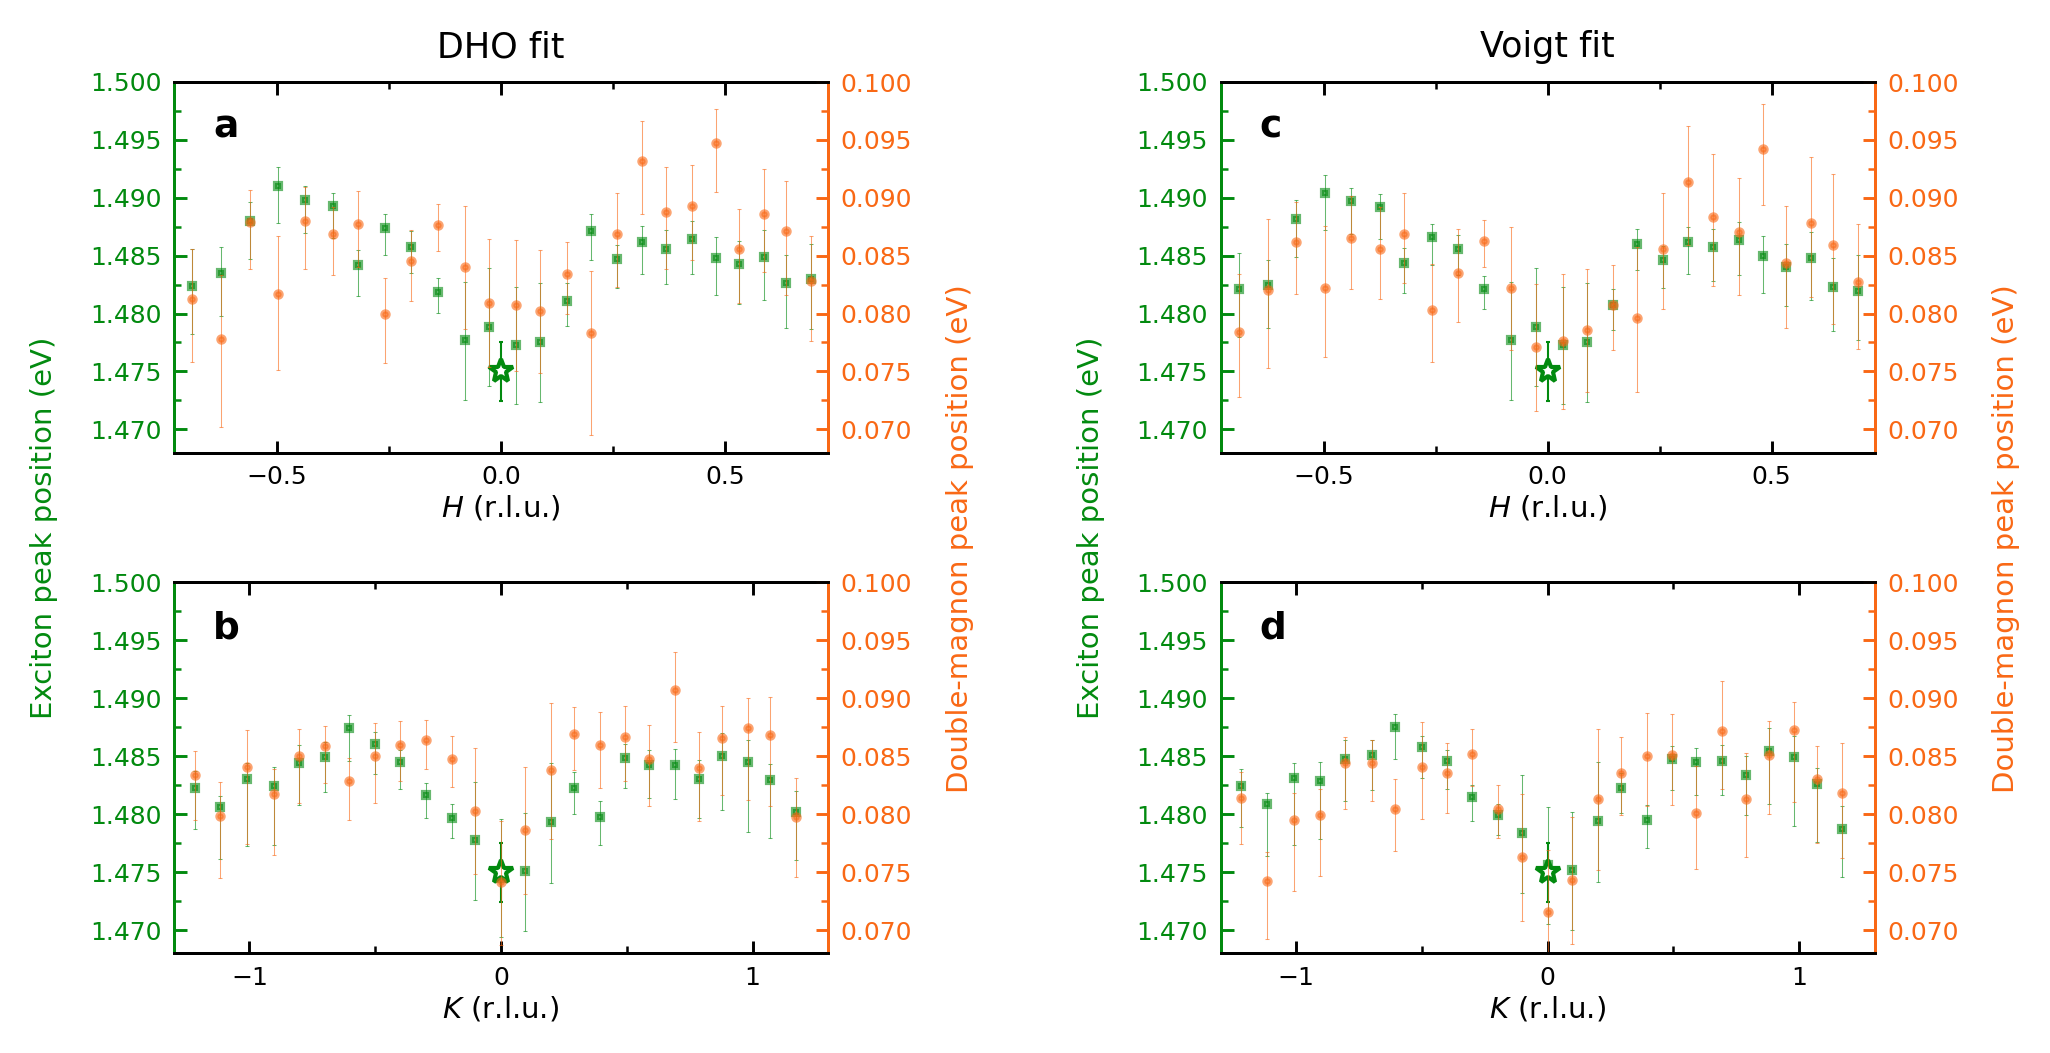

In [25]:
alpha = 0.6

fig, axs = plt.subplots(2, 2, dpi=dpi, figsize=(180*mm,90*mm), 
                        gridspec_kw=dict(hspace=0.35,wspace=0.6, top=0.9, left=0.1, right=0.9, bottom=0.08)
                       )

## DHO fit
x,y,y_low,y_high = np.loadtxt('data/RIXS_fits/H0L_40K_exciton_center.txt', delimiter='\t', comments='# ', unpack='True')
axs[0,0].errorbar(x, y, yerr=(y_low, y_high), marker=marker_e, color=color_e, ls='',markersize=markersize,
                  elinewidth=elinewidth,capsize=capsize,capthick=capthick,alpha=alpha)

x,y,y_low,y_high = np.loadtxt('data/RIXS_fits/H0L_40K_2magnon_center.txt', delimiter='\t', comments='# ', unpack='True')
ax0 = axs[0,0].twinx()
ax0.errorbar(x, y, yerr=(y_low, y_high), marker=marker_m, color=color_m, ls='',markersize=markersize,
             elinewidth=elinewidth,capsize=capsize,capthick=capthick,alpha=alpha)


x,y,y_low,y_high = np.loadtxt('data/RIXS_fits/0KL_40K_exciton_center.txt', delimiter='\t', comments='# ', unpack='True')
axs[1,0].errorbar(x, y, yerr=(y_low, y_high), marker=marker_e, color=color_e, ls='',markersize=markersize,
                  elinewidth=elinewidth,capsize=capsize,capthick=capthick,alpha=alpha)


x,y,y_low,y_high = np.loadtxt('data/RIXS_fits/0KL_40K_2magnon_center.txt', delimiter='\t', comments='# ', unpack='True')
ax1 = axs[1,0].twinx()
ax1.errorbar(x, y, yerr=(y_low, y_high), marker=marker_m, color=color_m, ls='',markersize=markersize,
             elinewidth=elinewidth,capsize=capsize,capthick=capthick,alpha=alpha)


## Voigt fit
x,y,y_low,y_high = np.loadtxt('data/RIXS_fits/H0L_40K_exciton_center_Vfit.txt', delimiter='\t', comments='# ', unpack='True')
axs[0,1].errorbar(x, y, yerr=(y_low, y_high), marker=marker_e, color=color_e, ls='',markersize=markersize,
                  elinewidth=elinewidth,capsize=capsize,capthick=capthick,alpha=alpha)

x,y,y_low,y_high = np.loadtxt('data/RIXS_fits/H0L_40K_2magnon_center_Vfit.txt', delimiter='\t', comments='# ', unpack='True')
ax2 = axs[0,1].twinx()
ax2.errorbar(x, y, yerr=(y_low, y_high), marker=marker_m, color=color_m, ls='',markersize=markersize,
             elinewidth=elinewidth,capsize=capsize,capthick=capthick,alpha=alpha)


x,y,y_low,y_high = np.loadtxt('data/RIXS_fits/0KL_40K_exciton_center_Vfit.txt', delimiter='\t', comments='# ', unpack='True')
axs[1,1].errorbar(x, y, yerr=(y_low, y_high), marker=marker_e, color=color_e, ls='',markersize=markersize,
                  elinewidth=elinewidth,capsize=capsize,capthick=capthick,alpha=alpha)


x,y,y_low,y_high = np.loadtxt('data/RIXS_fits/0KL_40K_2magnon_center_Vfit.txt', delimiter='\t', comments='# ', unpack='True')
ax3 = axs[1,1].twinx()
ax3.errorbar(x, y, yerr=(y_low, y_high), marker=marker_m, color=color_m, ls='',markersize=markersize,
             elinewidth=elinewidth,capsize=capsize,capthick=capthick,alpha=alpha)



for ax in axs.flatten():
    ax.errorbar(x=0, y=1.475, yerr=([2.53/1e3], [2.53/1e3]),fmt='*', label='Exciton',color=color_e,markerfacecolor='white',
                markersize=markersize*4,elinewidth=elinewidth*2,capsize=capsize,capthick=capthick*2
               )

axs[0,0].set_title('DHO fit', )
axs[0,1].set_title('Voigt fit', )


# axis range
axs[0,0].set_xlim([-0.73, 0.73])
axs[1,0].set_xlim([-1.3, 1.3])
axs[0,1].set_xlim([-0.73, 0.73])
axs[1,1].set_xlim([-1.3, 1.3])


axs[0,0].set_ylim(1.468,1.500)
ax0.set_ylim(0.068,0.100)
axs[1,0].set_ylim(1.468,1.500)
ax1.set_ylim(0.068,0.100)

axs[0,1].set_ylim(1.468,1.500)
ax2.set_ylim(0.068,0.100)
axs[1,1].set_ylim(1.468,1.500)
ax3.set_ylim(0.068,0.100)




# axis label
for ax in axs[0,:]:
    ax.set_xticks((-0.5, 0, 0.5))
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(2))
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))
    ax.set_xlabel(r'$H$ (r.l.u.)')
ax0.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))
ax2.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))

for ax in axs[1,:]:
    ax.set_xticks((-1, 0, 1))
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(2))
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))
    ax.set_xlabel(r'$K$ (r.l.u.)')
ax1.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))
ax3.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))


axs[0,0].text(x=-0.22, y=-0.7, s='Exciton peak position (eV)', fontsize=rcParams['axes.labelsize'], transform=axs[0,0].transAxes, color=color_e, rotation='vertical')
axs[0,0].text(x=1.18, y=-0.9, s='Double-magnon peak position (eV)', fontsize=rcParams['axes.labelsize'], transform=axs[0,0].transAxes, color=color_m, rotation='vertical')
axs[0,1].text(x=-0.22, y=-0.7, s='Exciton peak position (eV)', fontsize=rcParams['axes.labelsize'], transform=axs[0,1].transAxes, color=color_e, rotation='vertical')
axs[0,1].text(x=1.18, y=-0.9, s='Double-magnon peak position (eV)', fontsize=rcParams['axes.labelsize'], transform=axs[0,1].transAxes, color=color_m, rotation='vertical')

# axis color
for ax, color in zip([axs[0,0], ax0], [color_e, color_m]):
    for t in ax.get_yticklabels():
        t.set_color(color)
        ax.tick_params(axis='y', which='both', colors=color)
        ax.spines['left'].set_color(color_e)
        ax.spines['right'].set_color(color_m)
for ax, color in zip([axs[1,0], ax1], [color_e, color_m]):
    for t in ax.get_yticklabels():
        t.set_color(color)
        ax.tick_params(axis='y', which='both', colors=color)
        ax.spines['left'].set_color(color_e)
        ax.spines['right'].set_color(color_m)
for ax, color in zip([axs[0,1], ax2], [color_e, color_m]):
    for t in ax.get_yticklabels():
        t.set_color(color)
        ax.tick_params(axis='y', which='both', colors=color)
        ax.spines['left'].set_color(color_e)
        ax.spines['right'].set_color(color_m)
for ax, color in zip([axs[1,1], ax3], [color_e, color_m]):
    for t in ax.get_yticklabels():
        t.set_color(color)
        ax.tick_params(axis='y', which='both', colors=color)
        ax.spines['left'].set_color(color_e)
        ax.spines['right'].set_color(color_m)


# label
x = 0.06
y = 0.85
axs[0,0].text(x=x, y=y, s='a', fontdict=dict(fontsize=9,fontweight='bold'), transform=axs[0,0].transAxes, color='k')
axs[1,0].text(x=x, y=y, s='b', fontdict=dict(fontsize=9,fontweight='bold'), transform=axs[1,0].transAxes, color='k')
axs[0,1].text(x=x, y=y, s='c', fontdict=dict(fontsize=9,fontweight='bold'), transform=axs[0,1].transAxes, color='k')
axs[1,1].text(x=x, y=y, s='d', fontdict=dict(fontsize=9,fontweight='bold'), transform=axs[1,1].transAxes, color='k')

# fig.savefig('SI_DHO_vs_Voigt.pdf', dpi=dpi)

# Supplementary Fig 9

In [26]:
spectra_H0L_HT_data = h5_file('data/RIXS_data/H0L_T190K_1dSpectra.hdf', 'r')
spectra_H0L_HT_fits = h5_file('data/RIXS_fits/H0L_190K_fits_spectra.hdf', 'r')

(-0.2, 2.5)

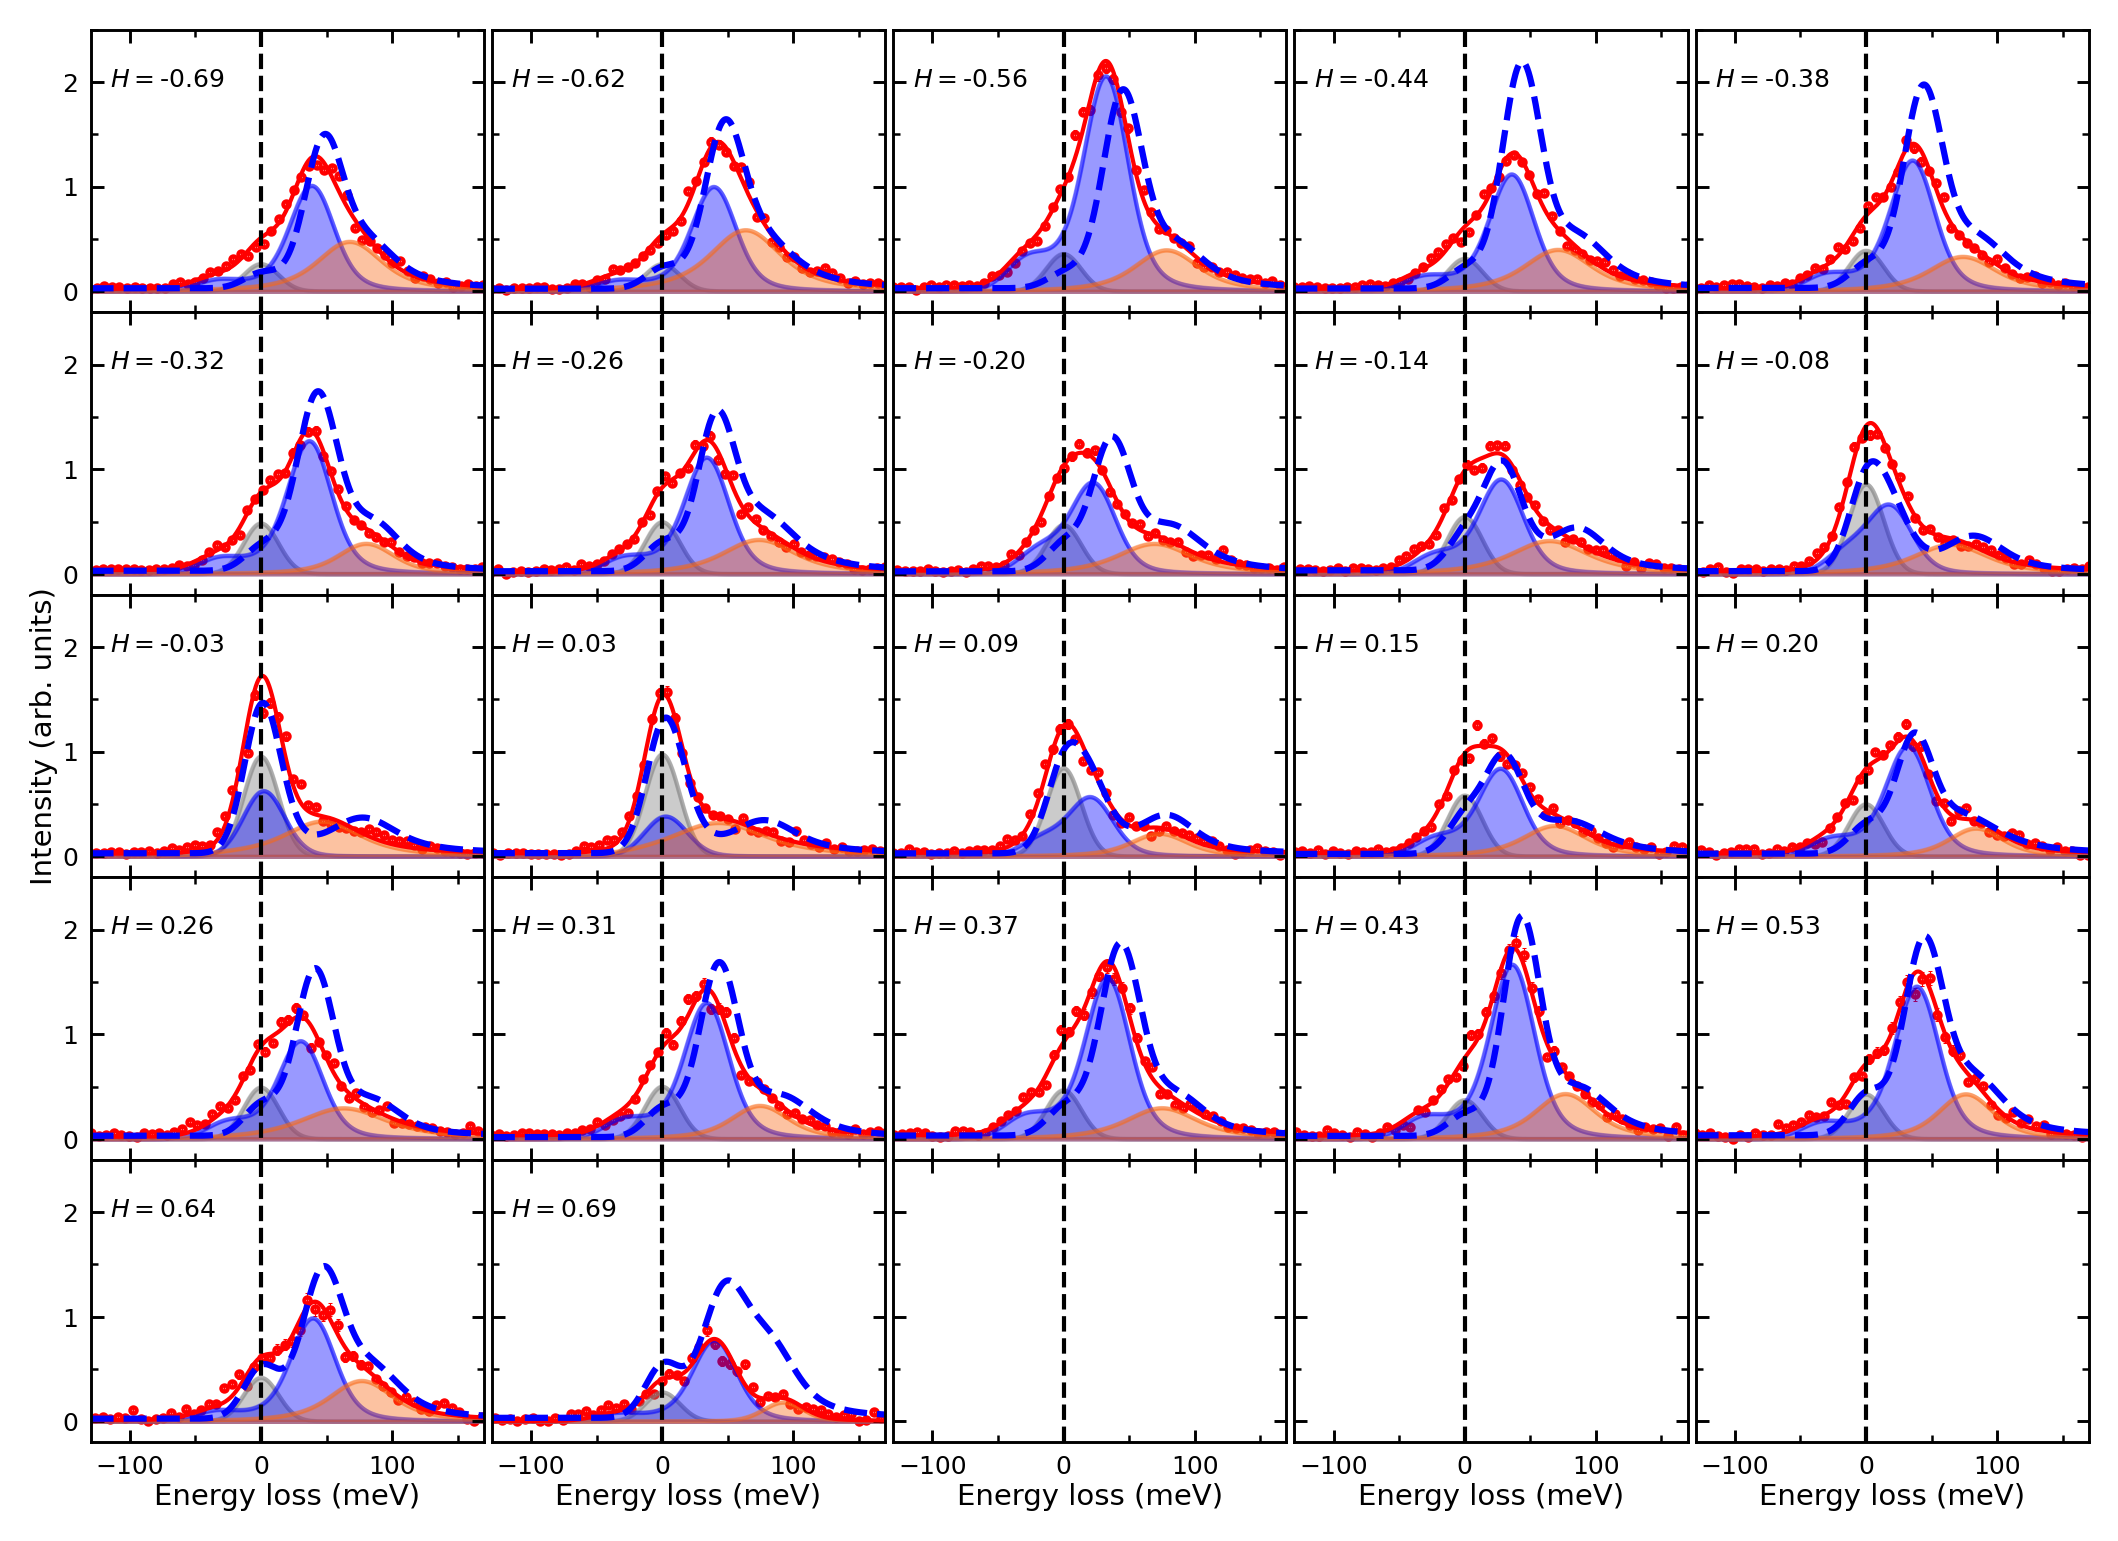

In [27]:
fig, axs = plt.subplots(5, 5, dpi=dpi, figsize=(180*mm,130*mm), sharex=True, sharey=True,
                        gridspec_kw=dict(wspace=0.02, hspace=0, left=0.05, right=0.99, bottom=0.07, top=0.99,)
                       )

alpha = 0.4
fillstyle = 'none'
color_elastic = 'C7'
color_magnon = 'b'
color_2magnon = color_m

Hs = spectra_H0L_HT_data['H'][:]
for i, H in enumerate(Hs):
    figIndex0 = i // 5
    figIndex1 = i % 5
    
    x = spectra_H0L_HT_data['spectra_H_{:.2f}'.format(H)]['eloss'][:]
    y = spectra_H0L_HT_data['spectra_H_{:.2f}'.format(H)]['intensity'][:]
    yerr = spectra_H0L_HT_data['spectra_H_{:.2f}'.format(H)]['error'][:]
    
    axs[figIndex0,figIndex1].errorbar(x, y, yerr=yerr,marker='o', fillstyle=fillstyle, color='r', ls='',markersize=markersize,
                                      elinewidth=elinewidth,capsize=capsize,capthick=capthick,alpha=1,zorder=0)
      
    # plot the fit results   
    x = spectra_H0L_HT_fits['fits_spectra_H_{:.2f}'.format(H)]['elastic']['x'][:]
    y = spectra_H0L_HT_fits['fits_spectra_H_{:.2f}'.format(H)]['elastic']['y'][:]
    axs[figIndex0,figIndex1].plot(x, y,'-',color='r',zorder=2)
    y = spectra_H0L_HT_fits['fits_spectra_H_{:.2f}'.format(H)]['elastic']['elastic'][:]
    axs[figIndex0,figIndex1].plot(x, y,'-',color=color_elastic,zorder=1, alpha=alpha)
    axs[figIndex0,figIndex1].fill_between(x, y, y2=0, color=color_elastic, alpha=alpha)
    y = spectra_H0L_HT_fits['fits_spectra_H_{:.2f}'.format(H)]['elastic']['1magnon'][:]
    axs[figIndex0,figIndex1].plot(x, y,'-',color=color_magnon,zorder=1, alpha=alpha)
    axs[figIndex0,figIndex1].fill_between(x, y, y2=0, color=color_magnon, alpha=alpha)
    y = spectra_H0L_HT_fits['fits_spectra_H_{:.2f}'.format(H)]['elastic']['2magnon'][:]
    axs[figIndex0,figIndex1].plot(x, y,'-',color=color_2magnon,zorder=1, alpha=alpha)
    axs[figIndex0,figIndex1].fill_between(x, y, y2=0, color=color_2magnon, alpha=alpha)
    
    
    # plot the LT fit results
    x = spectra_H0L_fits['fits_spectra_H_{:.2f}'.format(H)]['elastic']['x'][:]
    y = spectra_H0L_fits['fits_spectra_H_{:.2f}'.format(H)]['elastic']['y'][:]
    axs[figIndex0,figIndex1].plot(x, y,'--',color='b', lw=1.5, zorder=2)
     
    # label
    x=0.05
    y=0.8
    axs[figIndex0,figIndex1].text(x, y, s='$H=${:.2f}'.format(Hs[i]), 
                                  fontsize=6, transform=axs[figIndex0,figIndex1].transAxes, color='k')


# axis label
for i in range(5):
    axs[4,i].set_xlabel('Energy loss (meV)')
axs[2,0].set_ylabel('Intensity (arb. units)')

# axis range
for ax in axs.flatten():
    ax.vlines(x=0, ymin=-0.2, ymax=2.5, ls='--', colors='k',)
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(2))
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))
axs[0,0].set_xlim(-130,170)
axs[0,0].set_ylim(-0.2,2.5)

# fig.savefig('SI_H0L_HT_magnon.pdf', dpi=dpi)

# Supplementary Fig 10

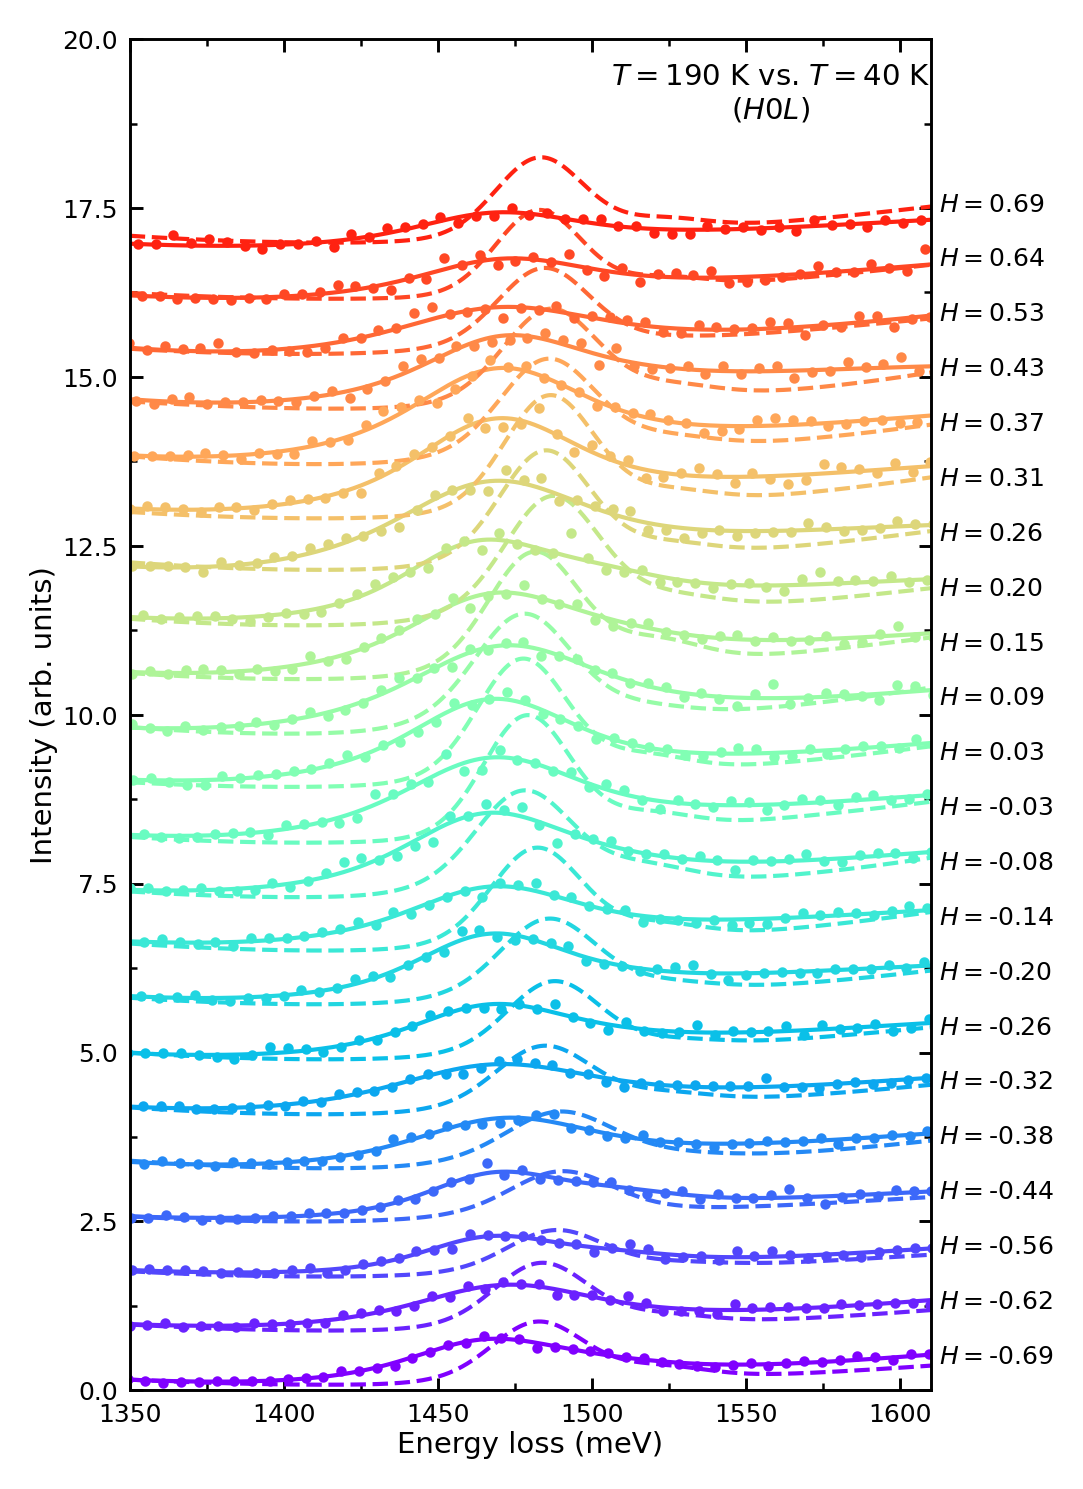

In [28]:
fig, ax = plt.subplots(1, 1, dpi=dpi, figsize=(88*mm,130*mm), 
                        gridspec_kw=dict(left=0.1, right=0.87, bottom=0.07, top=0.95,)
                       )

alpha = 1
cmap = gen_cmap(23, cmap='rainbow')

yshift = 0.8
Hs = spectra_H0L_HT_data['H'][:]
for i, H in enumerate(Hs):
    x = spectra_H0L_HT_data['spectra_H_{:.2f}'.format(H)]['eloss'][:]
    y = spectra_H0L_HT_data['spectra_H_{:.2f}'.format(H)]['intensity'][:]
    yerr = spectra_H0L_HT_data['spectra_H_{:.2f}'.format(H)]['error'][:]
        
    ax.errorbar(x, y+yshift*i, yerr=yerr,marker='o', color=cmap(i), ls='',markersize=markersize,
                    elinewidth=elinewidth,capsize=capsize,capthick=capthick,alpha=alpha)
      
    # plot the fit results
    x = spectra_H0L_HT_fits['fits_spectra_H_{:.2f}'.format(H)]['exciton']['x'][:]
    y = spectra_H0L_HT_fits['fits_spectra_H_{:.2f}'.format(H)]['exciton']['y'][:]
    ax.plot(x, y+yshift*i,'-',color=cmap(i))
    
    # plot the fit results
    x = spectra_H0L_fits['fits_spectra_H_{:.2f}'.format(H)]['exciton']['x'][:]
    y = spectra_H0L_fits['fits_spectra_H_{:.2f}'.format(H)]['exciton']['y'][:]
    ax.plot(x, y+yshift*i,'--',color=cmap(i))
     
    # label
    ax.text(1.01, 0.02+0.0406*i, s='$H=${:.2f}'.format(Hs[i]), fontsize=6, transform=ax.transAxes, color='k')
    
    

x = 0.8
y = 0.96
ax.text(x, y, s='$T= 190$ K vs. $T= 40$ K\n($H0L$)', transform=ax.transAxes, color='k', va='center',ha='center')


# axis label
ax.set_xlabel('Energy loss (meV)')
ax.set_ylabel('Intensity (arb. units)')
# axis range
ax.set_ylim(0,20)
ax.set_xlim(1350,1610)
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(2))
ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))



# fig.savefig('SI_HT_exciton.pdf', dpi=dpi)

# Supplementary Fig 11

In [29]:
spectra_Edep_data = h5_file('data/RIXS_data/Edep_1dSpectra.hdf', 'r')
spectra_Edep_fits = h5_file('data/RIXS_fits/Edep_fits_spectra.hdf', 'r')

(-0.5, 7.1)

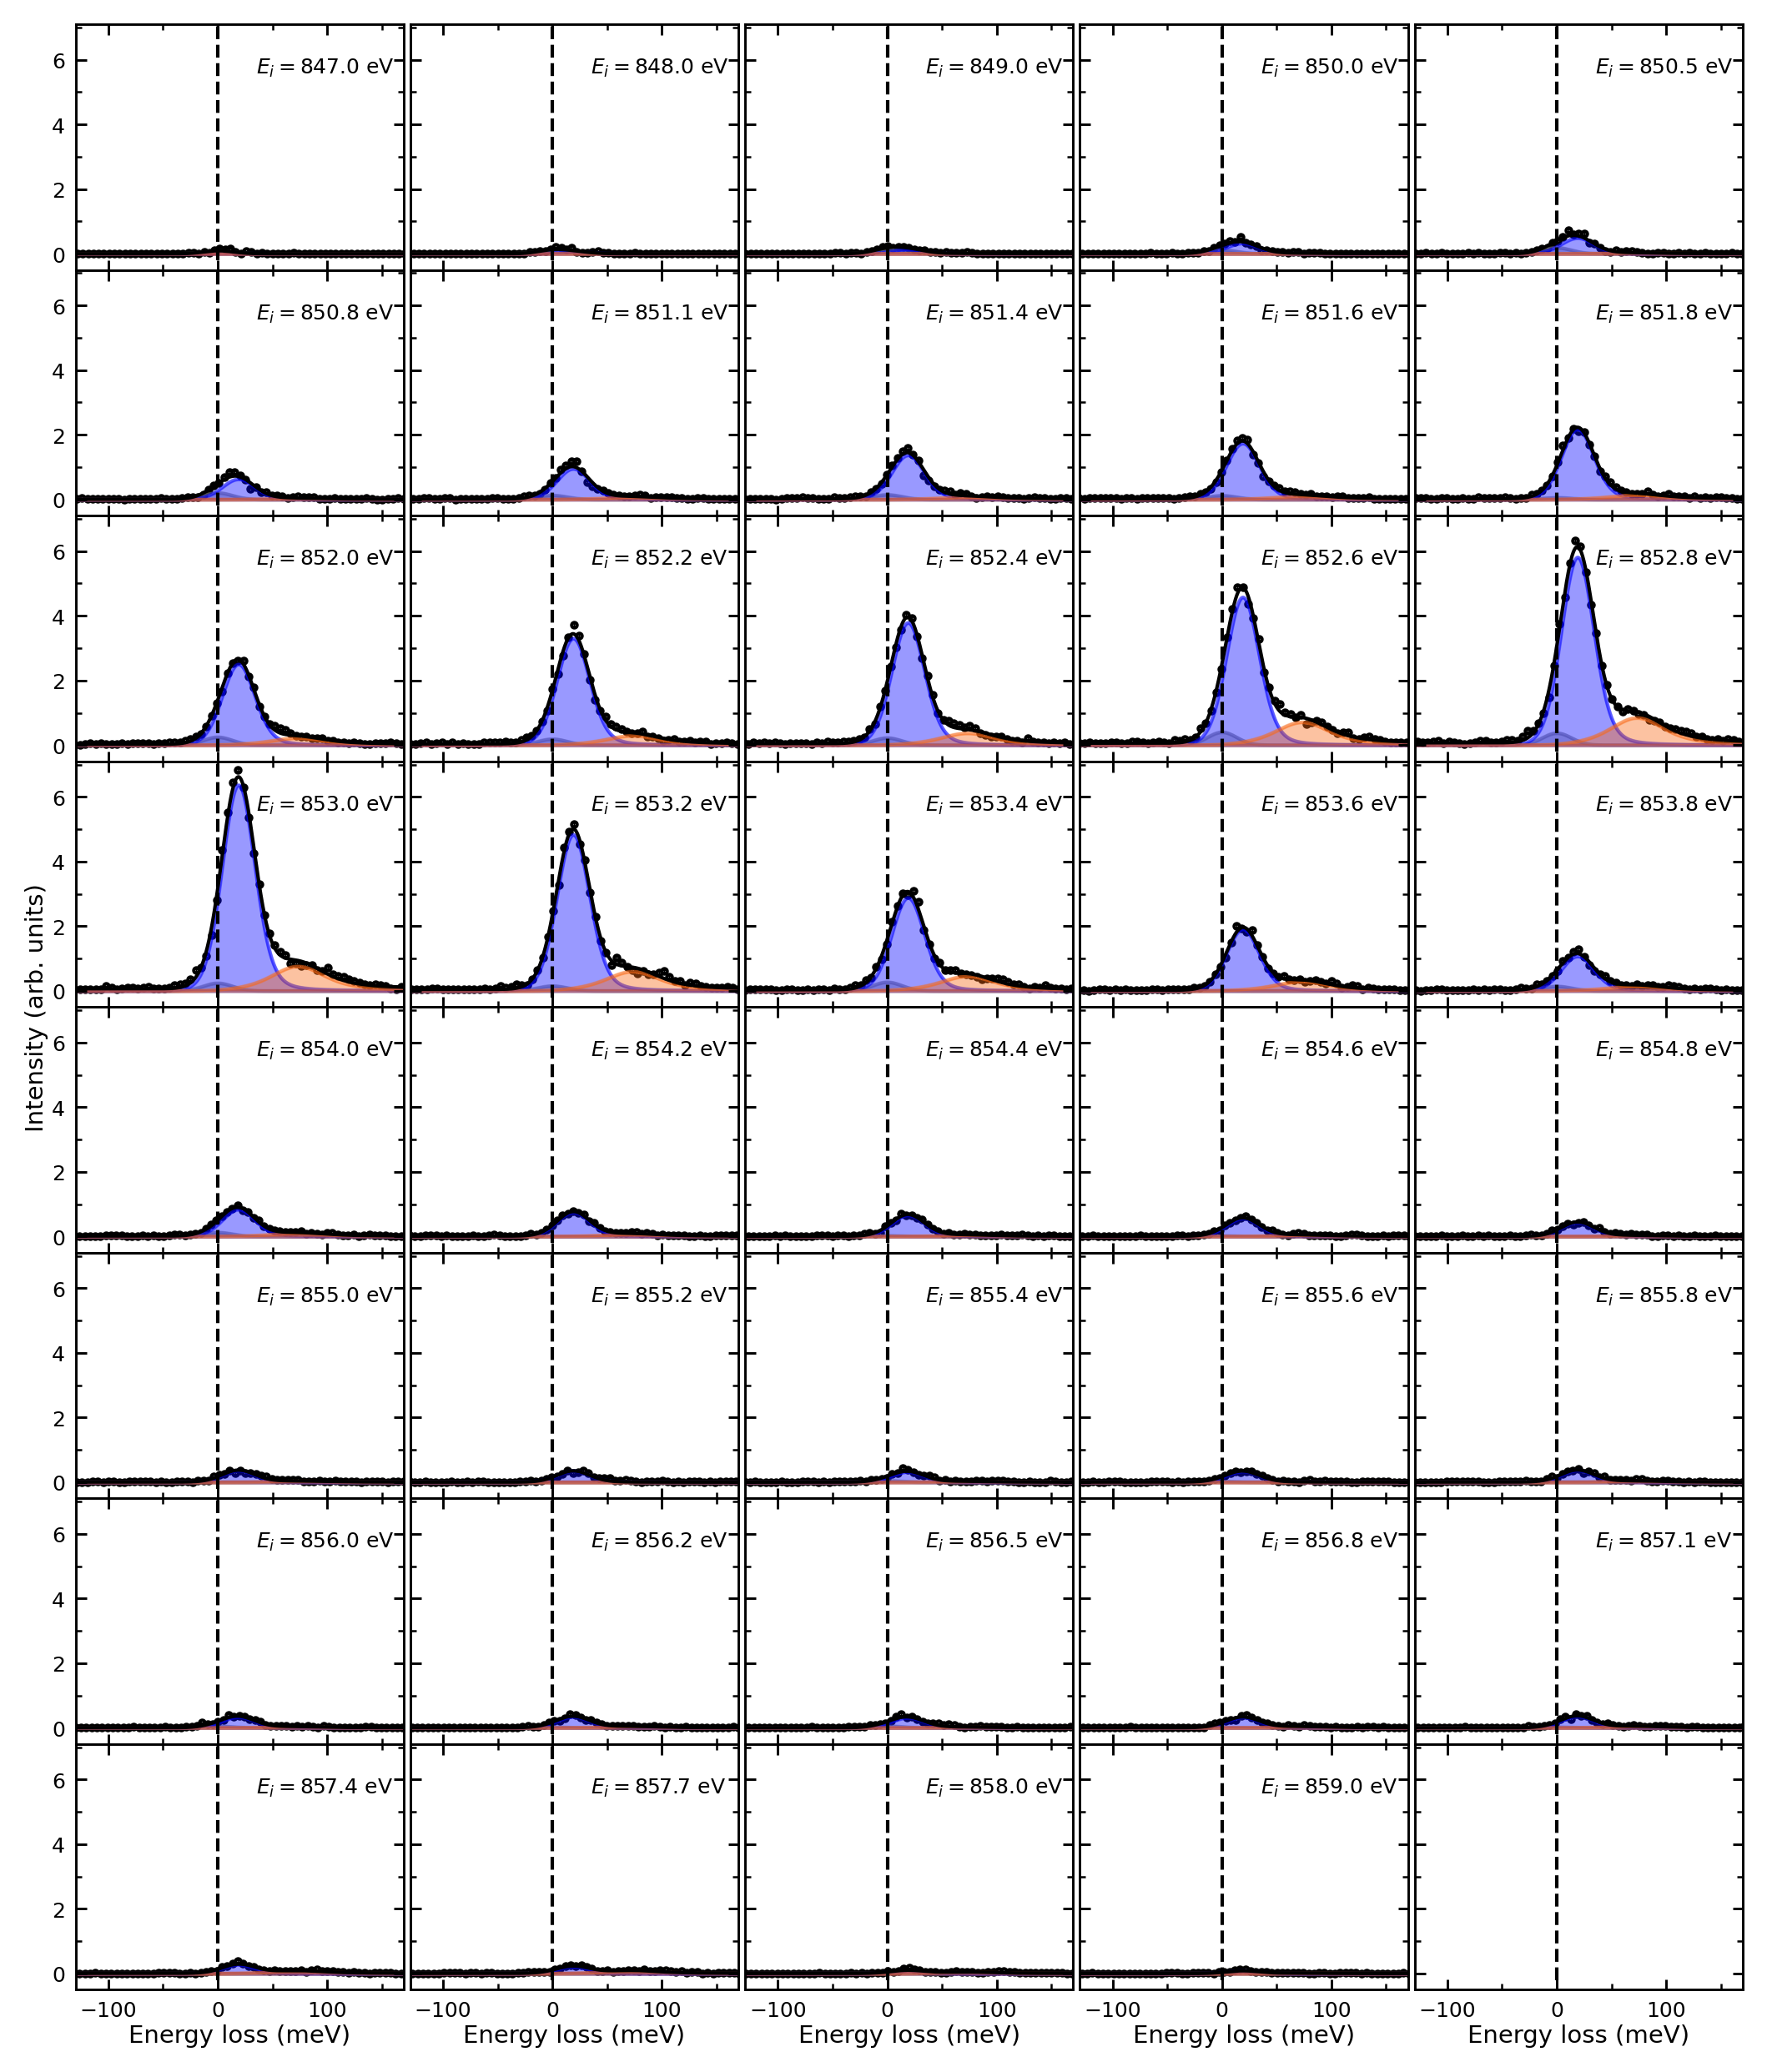

In [30]:
fig, axs = plt.subplots(8, 5, dpi=dpi, figsize=(180*mm,210*mm), sharex=True, sharey=True,
                        gridspec_kw=dict(wspace=0.02, hspace=0, left=0.05, right=0.99, bottom=0.043, top=0.993,)
                       )

alpha = 0.4
fillstyle = 'none'
color_elastic = 'C7'
color_magnon = 'b'
color_2magnon = color_m

Es = spectra_Edep_data['Ei'][:]
for i, E in enumerate(Es):
    figIndex0 = i // 5
    figIndex1 = i % 5
    
    x = spectra_Edep_data['spectra_Ei_{:.1f}'.format(E)]['eloss'][:]
    y = spectra_Edep_data['spectra_Ei_{:.1f}'.format(E)]['intensity'][:]
    yerr = spectra_Edep_data['spectra_Ei_{:.1f}'.format(E)]['error'][:]
    
    axs[figIndex0,figIndex1].errorbar(x, y, yerr=yerr,marker='o', fillstyle=fillstyle, color='k', ls='',markersize=markersize,
                                      elinewidth=elinewidth,capsize=capsize,capthick=capthick,alpha=1,zorder=0)
      
    # plot the fit results   
    x = spectra_Edep_fits['fits_spectra_Ei_{:.1f}'.format(E)]['elastic']['x'][:]
    y = spectra_Edep_fits['fits_spectra_Ei_{:.1f}'.format(E)]['elastic']['y'][:]
    axs[figIndex0,figIndex1].plot(x, y,'-',color='k',zorder=2)
    y = spectra_Edep_fits['fits_spectra_Ei_{:.1f}'.format(E)]['elastic']['elastic'][:]
    axs[figIndex0,figIndex1].plot(x, y,'-',color=color_elastic,zorder=1, alpha=alpha)
    axs[figIndex0,figIndex1].fill_between(x, y, y2=0, color=color_elastic, alpha=alpha)
    y = spectra_Edep_fits['fits_spectra_Ei_{:.1f}'.format(E)]['elastic']['1magnon'][:]
    axs[figIndex0,figIndex1].plot(x, y,'-',color=color_magnon,zorder=1, alpha=alpha)
    axs[figIndex0,figIndex1].fill_between(x, y, y2=0, color=color_magnon, alpha=alpha)
    y = spectra_Edep_fits['fits_spectra_Ei_{:.1f}'.format(E)]['elastic']['2magnon'][:]
    axs[figIndex0,figIndex1].plot(x, y,'-',color=color_2magnon,zorder=1, alpha=alpha)
    axs[figIndex0,figIndex1].fill_between(x, y, y2=0, color=color_2magnon, alpha=alpha)
    
     
    # label
    x=0.55
    y=0.8
    axs[figIndex0,figIndex1].text(x, y, s='$E_i=${:.1f} eV'.format(Es[i]), 
                                  fontsize=6, transform=axs[figIndex0,figIndex1].transAxes, color='k')


# axis label
for i in range(5):
    axs[-1,i].set_xlabel('Energy loss (meV)')
axs[4,0].set_ylabel('Intensity (arb. units)', y=1)

# axis range
for ax in axs.flatten():
    ax.vlines(x=0, ymin=-0.2, ymax=7.1, ls='--', colors='k',)
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(2))
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))
axs[0,0].set_xlim(-130,170)
axs[0,0].set_ylim(-0.5,7.1)

# fig.savefig('SI_Edep_magnon.pdf', dpi=dpi)

# Supplementary Fig 12

(-0.15, 0.7)

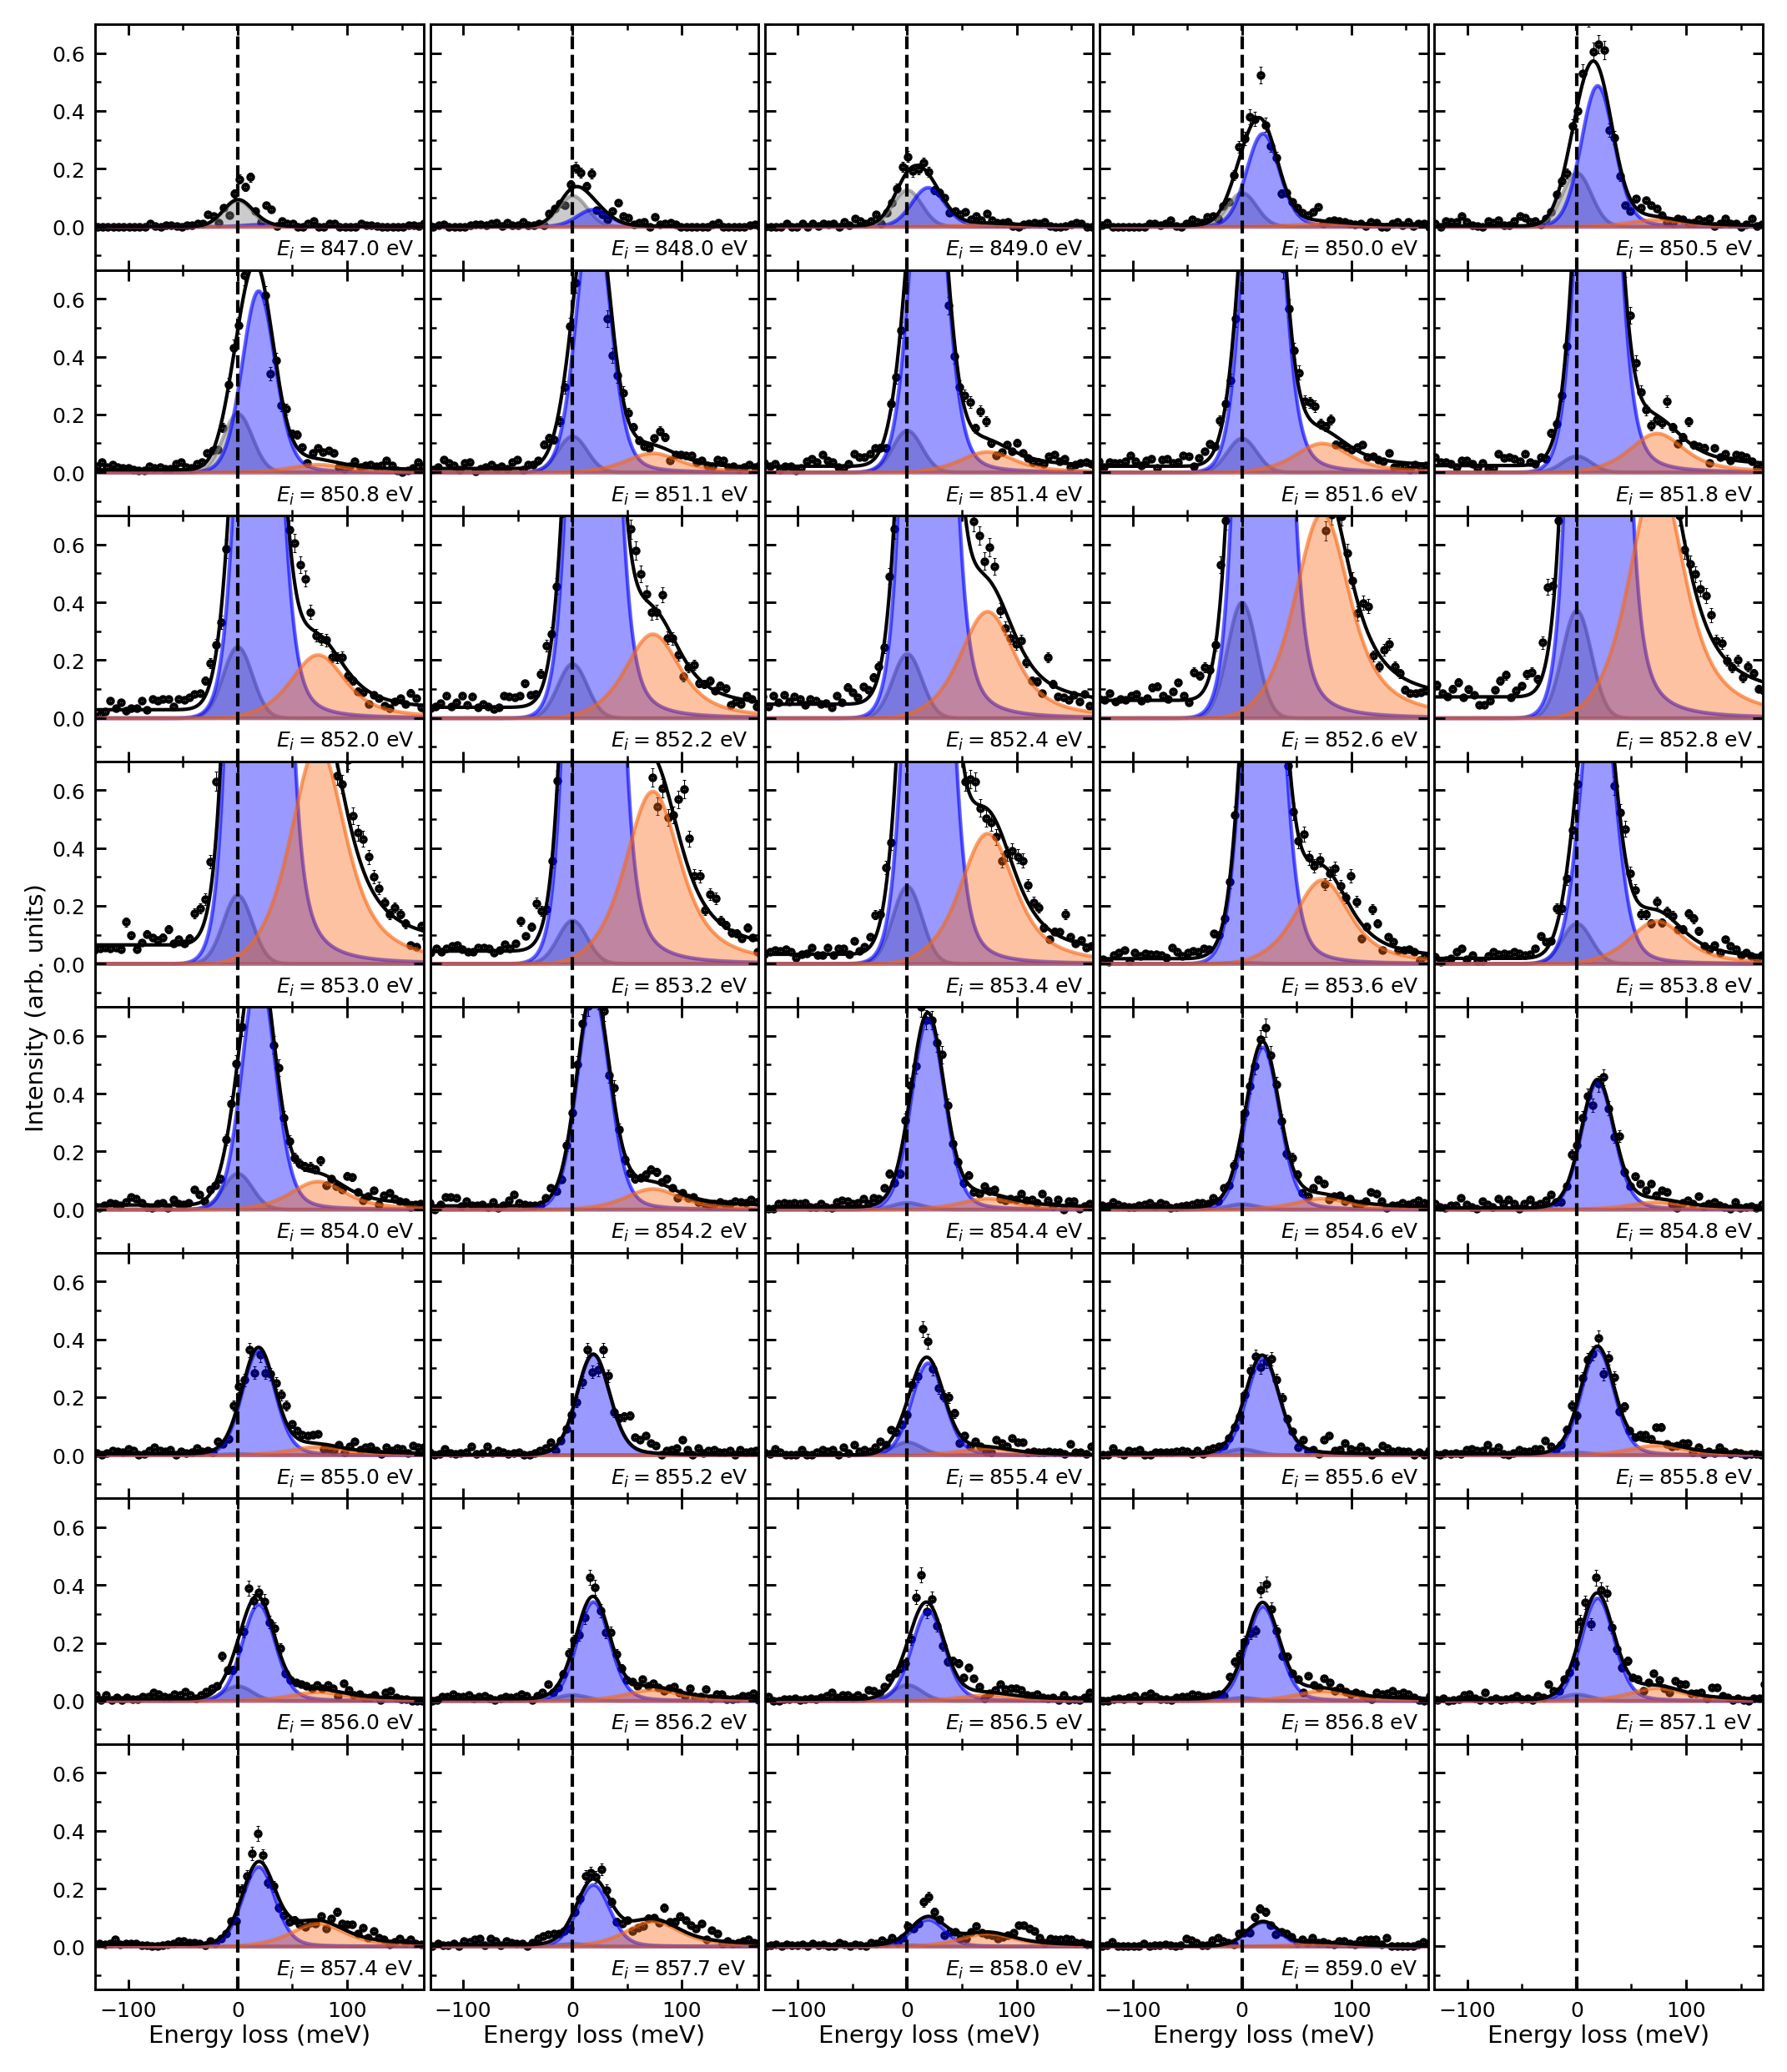

In [31]:
# plt.close('all')
fig, axs = plt.subplots(8, 5, dpi=dpi, figsize=(180*mm,210*mm), sharex=True, sharey=True,
                        gridspec_kw=dict(wspace=0.02, hspace=0, left=0.05, right=0.99, bottom=0.043, top=0.993,)
                       )

alpha = 0.4
fillstyle = 'none'
color_elastic = 'C7'
color_magnon = 'b'
color_2magnon = color_m

Es = spectra_Edep_data['Ei'][:]
for i, E in enumerate(Es):
    figIndex0 = i // 5
    figIndex1 = i % 5
    
    x = spectra_Edep_data['spectra_Ei_{:.1f}'.format(E)]['eloss'][:]
    y = spectra_Edep_data['spectra_Ei_{:.1f}'.format(E)]['intensity'][:]
    yerr = spectra_Edep_data['spectra_Ei_{:.1f}'.format(E)]['error'][:]
    
    axs[figIndex0,figIndex1].errorbar(x, y, yerr=yerr,marker='o', fillstyle=fillstyle, color='k', ls='',markersize=markersize,
                                      elinewidth=elinewidth,capsize=capsize,capthick=capthick,alpha=1,zorder=0)
      
    # plot the fit results   
    x = spectra_Edep_fits['fits_spectra_Ei_{:.1f}'.format(E)]['elastic']['x'][:]
    y = spectra_Edep_fits['fits_spectra_Ei_{:.1f}'.format(E)]['elastic']['y'][:]
    axs[figIndex0,figIndex1].plot(x, y,'-',color='k',zorder=2)
    y = spectra_Edep_fits['fits_spectra_Ei_{:.1f}'.format(E)]['elastic']['elastic'][:]
    axs[figIndex0,figIndex1].plot(x, y,'-',color=color_elastic,zorder=1, alpha=alpha)
    axs[figIndex0,figIndex1].fill_between(x, y, y2=0, color=color_elastic, alpha=alpha)
    y = spectra_Edep_fits['fits_spectra_Ei_{:.1f}'.format(E)]['elastic']['1magnon'][:]
    axs[figIndex0,figIndex1].plot(x, y,'-',color=color_magnon,zorder=1, alpha=alpha)
    axs[figIndex0,figIndex1].fill_between(x, y, y2=0, color=color_magnon, alpha=alpha)
    y = spectra_Edep_fits['fits_spectra_Ei_{:.1f}'.format(E)]['elastic']['2magnon'][:]
    axs[figIndex0,figIndex1].plot(x, y,'-',color=color_2magnon,zorder=1, alpha=alpha)
    axs[figIndex0,figIndex1].fill_between(x, y, y2=0, color=color_2magnon, alpha=alpha)
    
     
    # label
    x=0.55
    y=0.06
    axs[figIndex0,figIndex1].text(x, y, s='$E_i=${:.1f} eV'.format(Es[i]), 
                                  fontsize=6, transform=axs[figIndex0,figIndex1].transAxes, color='k')


# axis label
for i in range(5):
    axs[-1,i].set_xlabel('Energy loss (meV)')
axs[4,0].set_ylabel('Intensity (arb. units)', y=1)

# axis range
for ax in axs.flatten():
    ax.vlines(x=0, ymin=-0.15, ymax=0.7, ls='--', colors='k',)
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(2))
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))
axs[0,0].set_xlim(-130,170)
axs[0,0].set_ylim(-0.15,0.7)

# fig.savefig('SI_Edep_magnon_zoom_in.pdf', dpi=dpi)

# Supplementary Fig 13

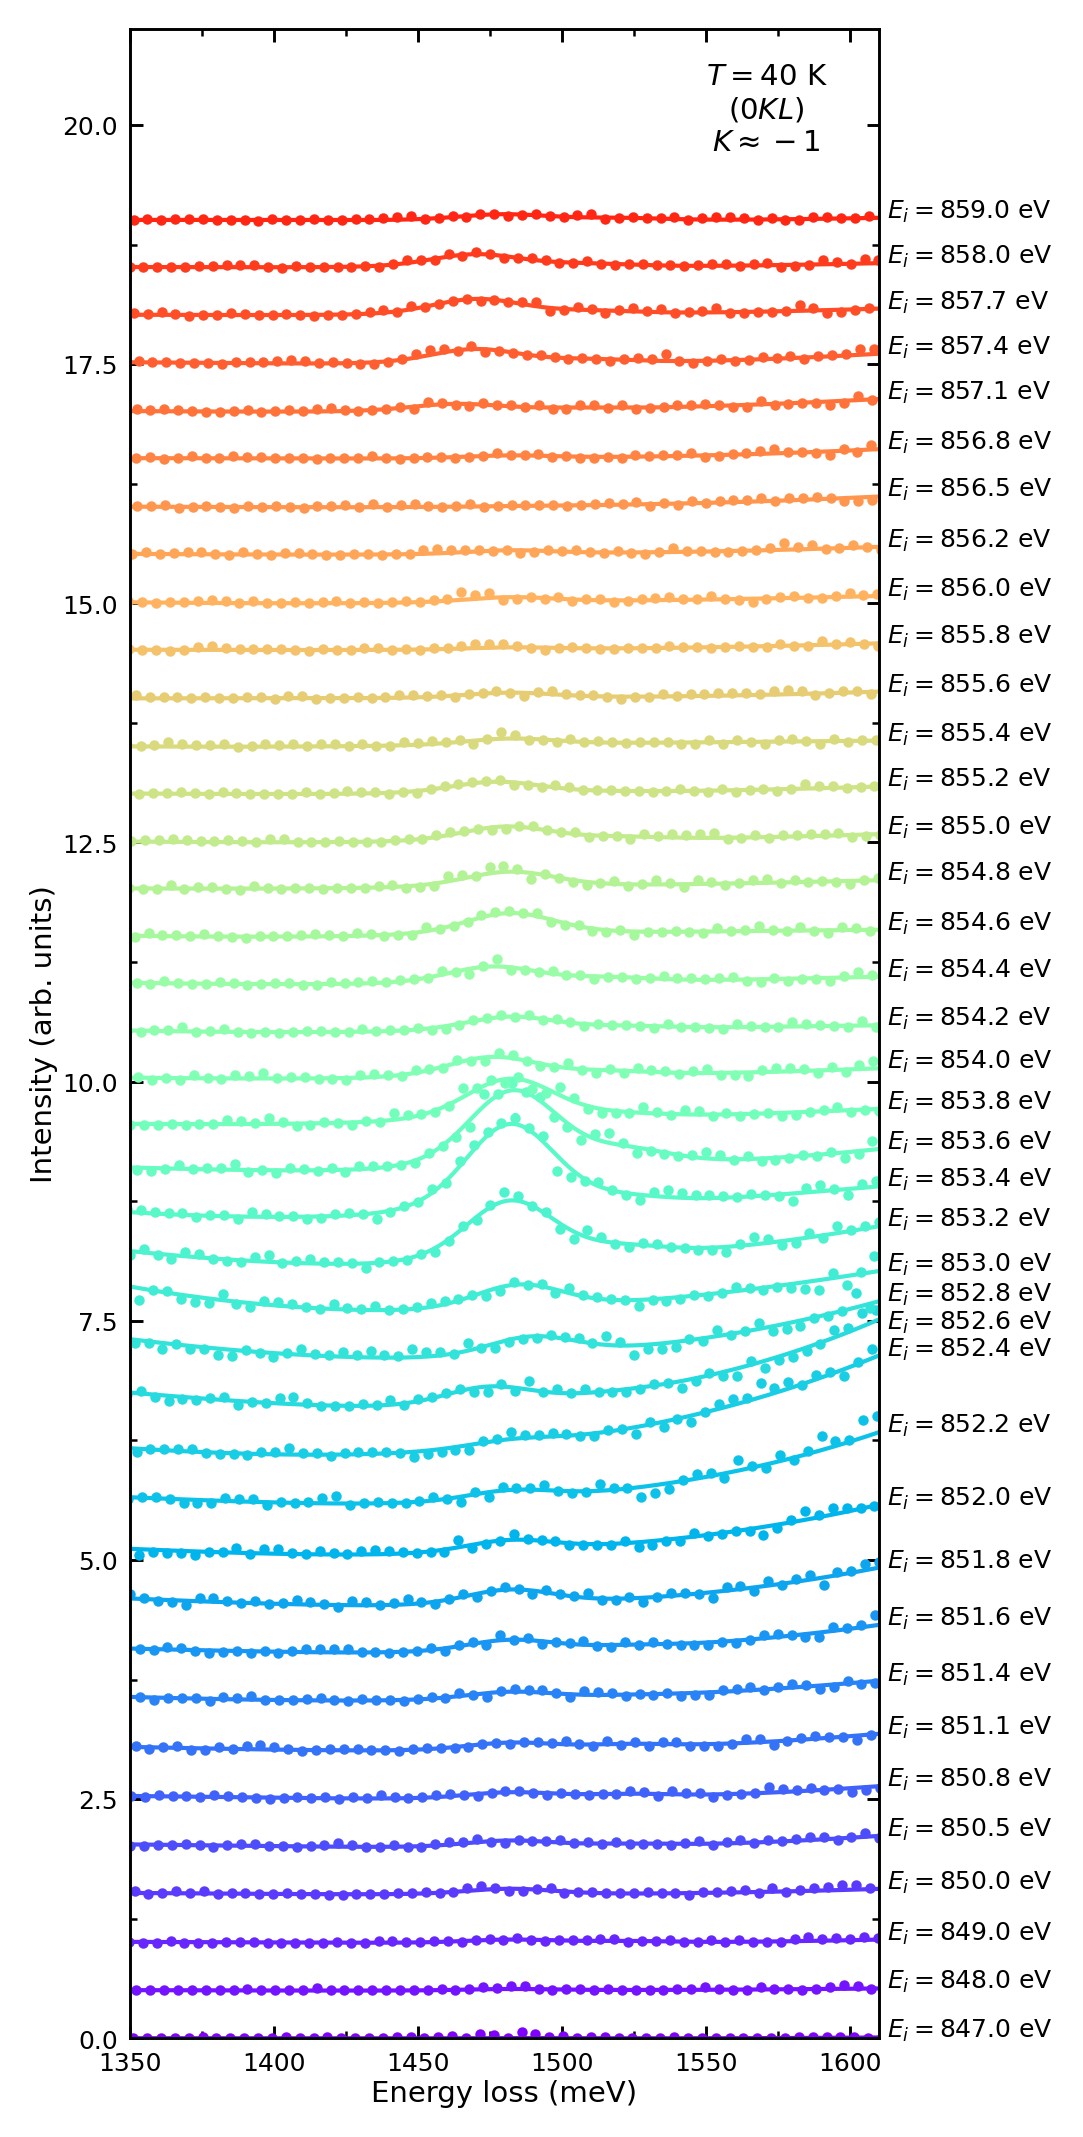

In [32]:
# plt.close('all')
fig, ax = plt.subplots(1, 1, dpi=dpi, figsize=(88*mm,180*mm), 
                        gridspec_kw=dict(left=0.1, right=0.82, bottom=0.045, top=0.99,)
                       )

alpha = 1
cmap = gen_cmap(41, cmap='rainbow')
yshift = 0.5

Es = spectra_Edep_data['Ei'][:]

for i, E in enumerate(Es):
    x = spectra_Edep_data['spectra_Ei_{:.1f}'.format(E)]['eloss'][:]
    y = spectra_Edep_data['spectra_Ei_{:.1f}'.format(E)]['intensity'][:]
    yerr = spectra_Edep_data['spectra_Ei_{:.1f}'.format(E)]['error'][:]
    
    
    ax.errorbar(x, y+yshift*i, yerr=yerr,marker='o', color=cmap(i), ls='',markersize=markersize,
                elinewidth=elinewidth,capsize=capsize,capthick=capthick,alpha=alpha)
    
    # plot the fit results 
    x = spectra_Edep_fits['fits_spectra_Ei_{:.1f}'.format(E)]['exciton']['x'][:]
    y = spectra_Edep_fits['fits_spectra_Ei_{:.1f}'.format(E)]['exciton']['y'][:]
    ax.plot(x, y+yshift*i,'-',color=cmap(i))
    

    # label
    x = 1613
    y = spectra_Edep_fits['labels_exciton'][i]
    ax.text(x, y+yshift*i, s='$E_i=${:.1f} eV'.format(E), fontsize=6, color='k')

x = 0.85
y = 0.96
ax.text(x, y, s='$T= 40$ K\n'+'($0KL$)\n'+r'$K\approx-1$', transform=ax.transAxes, color='k', va='center',ha='center')


# axis label
ax.set_xlabel('Energy loss (meV)')
ax.set_ylabel('Intensity (arb. units)')


# axis range
ax.set_ylim(0,21)
# ax.set_xlim(1310,1610)
ax.set_xlim(1350,1610)

ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(2))
ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))

# fig.savefig('SI_Edep_exciton.pdf', dpi=dpi)

# Supplementary Fig 14

In [33]:
TBfit = h5_file('data/RIXS_fits/TBfit.hdf', 'r')

Text(0.06, 0.85, 'f')

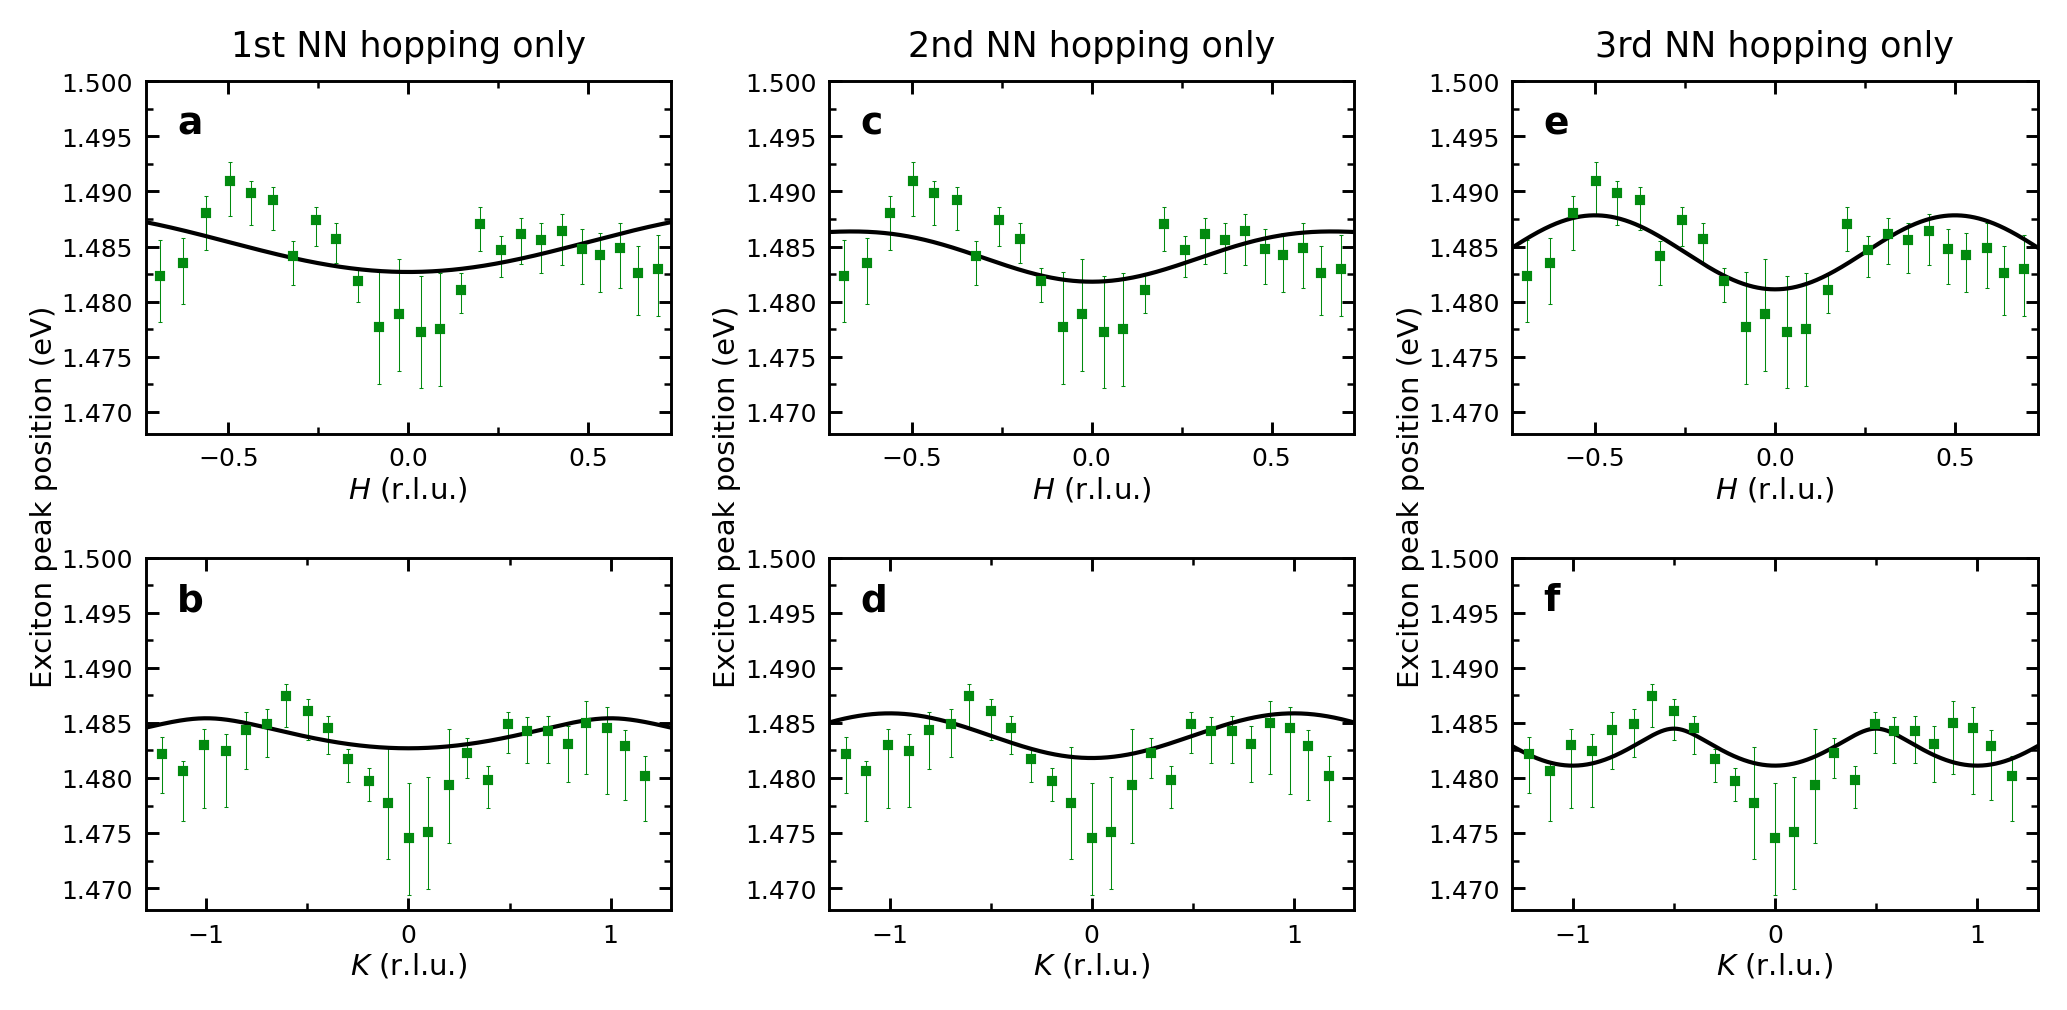

In [34]:
alpha = 1

fig, axs = plt.subplots(2, 3, dpi=dpi, figsize=(180*mm,90*mm), 
                        gridspec_kw=dict(hspace=0.35,wspace=0.3,top=0.85, left=0.1, right=0.99, bottom=0.07)
                       )


x,y,y_low,y_high = np.loadtxt('data/RIXS_fits/H0L_40K_exciton_center.txt', delimiter='\t', comments='# ', unpack='True')
axs[0,0].errorbar(x, y, yerr=(y_low, y_high), marker=marker_e, color=color_e, ls='',markersize=markersize,
                  elinewidth=elinewidth,capsize=capsize,capthick=capthick,alpha=alpha)
axs[0,0].plot(TBfit['x'][:], TBfit['H_fit_t1_branch1'][:], color='k', ls='-')

x,y,y_low,y_high = np.loadtxt('data/RIXS_fits/0KL_40K_exciton_center.txt', delimiter='\t', comments='# ', unpack='True')
axs[1,0].errorbar(x, y, yerr=(y_low, y_high), marker=marker_e, color=color_e, ls='',markersize=markersize,
                  elinewidth=elinewidth,capsize=capsize,capthick=capthick,alpha=alpha)
axs[1,0].plot(TBfit['x'][:], TBfit['K_fit_t1_branch1'][:], color='k', ls='-')


x,y,y_low,y_high = np.loadtxt('data/RIXS_fits/H0L_40K_exciton_center.txt', delimiter='\t', comments='# ', unpack='True')
axs[0,1].errorbar(x, y, yerr=(y_low, y_high), marker=marker_e, color=color_e, ls='',markersize=markersize,
                  elinewidth=elinewidth,capsize=capsize,capthick=capthick,alpha=alpha)
axs[0,1].plot(TBfit['x'][:], TBfit['H_fit_t2'][:], color='k', ls='-')

x,y,y_low,y_high = np.loadtxt('data/RIXS_fits/0KL_40K_exciton_center.txt', delimiter='\t', comments='# ', unpack='True')
axs[1,1].errorbar(x, y, yerr=(y_low, y_high), marker=marker_e, color=color_e, ls='',markersize=markersize,
                  elinewidth=elinewidth,capsize=capsize,capthick=capthick,alpha=alpha)
axs[1,1].plot(TBfit['x'][:], TBfit['K_fit_t2'][:], color='k', ls='-')


x,y,y_low,y_high = np.loadtxt('data/RIXS_fits/H0L_40K_exciton_center.txt', delimiter='\t', comments='# ', unpack='True')
axs[0,2].errorbar(x, y, yerr=(y_low, y_high), marker=marker_e, color=color_e, ls='',markersize=markersize,
                  elinewidth=elinewidth,capsize=capsize,capthick=capthick,alpha=alpha)
axs[0,2].plot(TBfit['x'][:], TBfit['H_fit_t3_branch1'][:], color='k', ls='-')

x,y,y_low,y_high = np.loadtxt('data/RIXS_fits/0KL_40K_exciton_center.txt', delimiter='\t', comments='# ', unpack='True')
axs[1,2].errorbar(x, y, yerr=(y_low, y_high), marker=marker_e, color=color_e, ls='',markersize=markersize,
                  elinewidth=elinewidth,capsize=capsize,capthick=capthick,alpha=alpha)
axs[1,2].plot(TBfit['x'][:], TBfit['K_fit_t3_branch1'][:], color='k', ls='-')




# axis range
for ax in axs.flatten():
    ax.set_ylim(1.468,1.500)

for ax in axs[0,:]:
    ax.set_xlim([-0.73, 0.73])
for ax in axs[1,:]:
    ax.set_xlim([-1.3, 1.3])



# axis label
for ax in axs[0,:]:
    ax.set_xticks((-0.5, 0, 0.5))
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(2))
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))
    ax.set_xlabel(r'$H$ (r.l.u.)')

for ax in axs[1,:]:
    ax.set_xticks((-1, 0, 1))
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(2))
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))
    ax.set_xlabel(r'$K$ (r.l.u.)')


axs[0,0].set_title('1st NN hopping only',)
axs[0,1].set_title('2nd NN hopping only',)
axs[0,2].set_title('3rd NN hopping only',)


axs[0,0].text(x=-0.22, y=-0.7, s='Exciton peak position (eV)', fontsize=rcParams['axes.labelsize'], transform=axs[0,0].transAxes, rotation='vertical')
axs[0,1].text(x=-0.22, y=-0.7, s='Exciton peak position (eV)', fontsize=rcParams['axes.labelsize'], transform=axs[0,1].transAxes, rotation='vertical')
axs[0,2].text(x=-0.22, y=-0.7, s='Exciton peak position (eV)', fontsize=rcParams['axes.labelsize'], transform=axs[0,2].transAxes, rotation='vertical')



# label
x = 0.06
y = 0.85
axs[0,0].text(x=x, y=y, s='a', fontdict=dict(fontsize=9,fontweight='bold'), transform=axs[0,0].transAxes, color='k')
axs[1,0].text(x=x, y=y, s='b', fontdict=dict(fontsize=9,fontweight='bold'), transform=axs[1,0].transAxes, color='k')
axs[0,1].text(x=x, y=y, s='c', fontdict=dict(fontsize=9,fontweight='bold'), transform=axs[0,1].transAxes, color='k')
axs[1,1].text(x=x, y=y, s='d', fontdict=dict(fontsize=9,fontweight='bold'), transform=axs[1,1].transAxes, color='k')
axs[0,2].text(x=x, y=y, s='e', fontdict=dict(fontsize=9,fontweight='bold'), transform=axs[0,2].transAxes, color='k')
axs[1,2].text(x=x, y=y, s='f', fontdict=dict(fontsize=9,fontweight='bold'), transform=axs[1,2].transAxes, color='k')

# fig.savefig('SI_TBmodel.pdf', dpi=dpi)
